In [2]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer

In [3]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\hOLS_COMBINE.CSV',header=None,names=["created_at","text","screen_name","location"])
#np.random.seed(0)

In [4]:
df.head(20)

created_at                                               text  \
0   29-01-2022 18:06  b'We do **\n#FALLSEMESTER \n#Sociology\n#Essay...   
1   29-01-2022 18:01  b'\xf0\x9f\x91\xa9\xe2\x80\x8d\xf0\x9f\x8f\xab...   
2   29-01-2022 18:00  b"View @cnfonline's lineup of writing classes ...   
3   29-01-2022 17:50  b'Struggling to complete your assignments ,ess...   
4   29-01-2022 17:38  b'\xf0\x9f\x96\x87Do you want to learn more ab...   
5   29-01-2022 16:51  b'Every school district is looking to fill pos...   
6   29-01-2022 16:39  b'Enroll in C#.NET, JAVA, PYTHON, ANGULAR 12, ...   
7   29-01-2022 16:25  b'Call us and register for our Saturday Online...   
8   29-01-2022 16:23  b'Start your kid\xe2\x80\x99s coding journey t...   
9   29-01-2022 16:12  b'@tonia6essay Our writers are competent and r...   
10  29-01-2022 16:10  b'Google Analytics For Beginners - https://t.c...   
11  29-01-2022 16:05  b'A benefit of improved posture: Greater body ...   
12  29-01-2022 16:00  b'Introduction to Water Management - https://t...   
13  29-01-2022 15:53  b'Mastering The Interview - https://t.co/ZbG9u...   
14  29-01-2022 15:52  b'We leave no stone unturned\xf0\x9f\x93\x91\x...   
15  29-01-2022 15:49  b'Whatsapp:+18608461789\n#maths\n#proposals\n#...   
16  29-01-2022 15:49  b'Whatsapp:+18608461789\n#Statistics\n#Literat...   
17  29-01-2022 15:47  b'Quantity Surveying Templates for Effective C...   
18  29-01-2022 15:45  b'Whatsapp:+18608461789\n#essays\n#onlineclass...   
19  29-01-2022 15:43  b'Micro MBA Course: Sales and Management Strat...   

           screen_name                                           location  
0    b'onlinewriters7'                                   b'United States'  
1     b'FL4YNonprofit'                                      b'Edmonds WA'  
2          b'newpages'                                        b'Michigan'  
3     b'Keyshawrites7'                                                b''  
4        b'teach_ours'                                                b''  
5       b'rexacademy1'                                      b'Irving, TX'  
6     b'abacus_system'                                                b''  
7   b'AmericanAdultEd'                                     b'Hialeah, FL'  
8   b'Siliconvalley41'                        b'San Ramon, CA, US, 94583'  
9       b'tonia6essay'                                                b''  
10         b'teachemy'                                   b'United States'  
11  b'PainFreeAthlete'                                       b'Utah, USA'  
12         b'teachemy'                                   b'United States'  
13         b'teachemy'                                   b'United States'  
14      b'usprowriter'  b'Texas, USA \xf0\x9f\x87\xba\xf0\x9f\x87\xb8   '  
15      b'usprowriter'  b'Texas, USA \xf0\x9f\x87\xba\xf0\x9f\x87\xb8   '  
16      b'usprowriter'  b'Texas, USA \xf0\x9f\x87\xba\xf0\x9f\x87\xb8   '  
17         b'teachemy'                                   b'United States'  
18      b'usprowriter'  b'Texas, USA \xf0\x9f\x87\xba\xf0\x9f\x87\xb8   '  
19         b'teachemy'                                   b'United States'

In [5]:
df.shape

(6021, 4)

In [6]:

    df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
df ['text']= df['text'].str.replace('RT ', '', case=False)  # Removing the phrase 'RT" from all strings
df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
#df['text'] = df['text'].str.replace('[' 'b]','')
#df['text'] = df['text'].str.replace('[x[a-z]]','')
df ['text']= df['text'].str.replace('\r\n', ' ')  # Removing '\r\n' which is present in some strings
df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


C:\Users\DELL\AppData\Local\Temp/ipykernel_5992/1243268230.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
C:\Users\DELL\AppData\Local\Temp/ipykernel_5992/1243268230.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
C:\Users\DELL\AppData\Local\Temp/ipykernel_5992/1243268230.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


In [7]:
df.head(10)

created_at                                               text  \
0  29-01-2022 18:06  b we do    n fallsemester  n sociology n essay...   
1  29-01-2022 18:01  b  xf xf x xa xe x xd xf xf xf xabour teachers...   
2  29-01-2022 18:00  b view  cnfonline s lineup of writing classes ...   
3  29-01-2022 17:50  b struggling to complete your assignments  ess...   
4  29-01-2022 17:38  b  xf xf x xdo you want to learn more about so...   
5  29-01-2022 16:51  b every school district is looking to fill pos...   
6  29-01-2022 16:39  b enroll in c  net  java  python  angular   mv...   
7  29-01-2022 16:25  b call us and register for our saturday online...   
8  29-01-2022 16:23  b stayour kid xe x xs coding journey today  n ...   
9  29-01-2022 16:12  b  toniaessay our writers are competent and re...   

          screen_name                     location  
0   b'onlinewriters7'             b'United States'  
1    b'FL4YNonprofit'                b'Edmonds WA'  
2         b'newpages'                  b'Michigan'  
3    b'Keyshawrites7'                          b''  
4       b'teach_ours'                          b''  
5      b'rexacademy1'                b'Irving, TX'  
6    b'abacus_system'                          b''  
7  b'AmericanAdultEd'               b'Hialeah, FL'  
8  b'Siliconvalley41'  b'San Ramon, CA, US, 94583'  
9      b'tonia6essay'                          b''

In [8]:
 nltk.download('stopwords')  # Downloading stop words
#stop = set(stopwords.words('english'))  # Selecting English stop words
#df['text'] = df['text'] .apply(lambda x: [item for item in x if item not in stop])  # Removing stop words from each string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
df.shape[0]

6021

In [10]:
lemmatizer = WordNetLemmatizer()
for i in range(df.shape[0]):
    words=nltk.word_tokenize(df['text'][i])
    words = [lemmatizer.lemmatize(w, pos='a') for w in words if w not in set(stopwords.words("english")) ]
    df['text'][i]=' '.join(words)

In [11]:
df['text'][10]

'b google analytics beginners udemycoupon onlineclasses onlinecourses'

In [12]:
df.head(10)

created_at                                               text  \
0  29-01-2022 18:06  b n fallsemester n sociology n essay due n exa...   
1  29-01-2022 18:01  b xf xf x xa xe x xd xf xf xf xabour teachers ...   
2  29-01-2022 18:00  b view cnfonline lineup writing classes offere...   
3  29-01-2022 17:50  b struggling complete assignments essay worry ...   
4  29-01-2022 17:38  b xf xf x xdo want learn soft skills course ke...   
5  29-01-2022 16:51  b every school district looking fill positions...   
6  29-01-2022 16:39  b enroll c net java python angular mvc core ph...   
7  29-01-2022 16:25  b call us register saturday online classes xf ...   
8  29-01-2022 16:23  b stayour kid xe x xs coding journey today n n...   
9  29-01-2022 16:12  b toniaessay writers competent reliable n java...   

          screen_name                     location  
0   b'onlinewriters7'             b'United States'  
1    b'FL4YNonprofit'                b'Edmonds WA'  
2         b'newpages'                  b'Michigan'  
3    b'Keyshawrites7'                          b''  
4       b'teach_ours'                          b''  
5      b'rexacademy1'                b'Irving, TX'  
6    b'abacus_system'                          b''  
7  b'AmericanAdultEd'               b'Hialeah, FL'  
8  b'Siliconvalley41'  b'San Ramon, CA, US, 94583'  
9      b'tonia6essay'                          b''

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

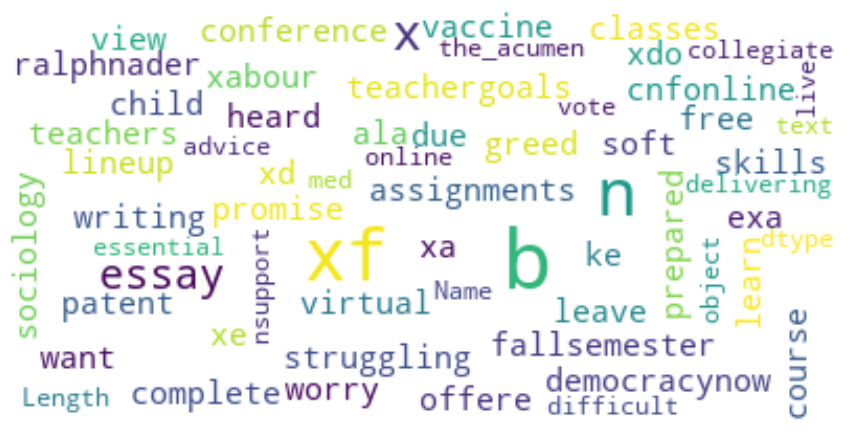

In [14]:
#wordcloud after preprocessing and removing stopwords
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['text'])

In [15]:
df.shape

(6021, 4)

In [16]:
df.isna().sum
tweet=df.copy()

In [17]:
tweet.head()

created_at                                               text  \
0  29-01-2022 18:06  b n fallsemester n sociology n essay due n exa...   
1  29-01-2022 18:01  b xf xf x xa xe x xd xf xf xf xabour teachers ...   
2  29-01-2022 18:00  b view cnfonline lineup writing classes offere...   
3  29-01-2022 17:50  b struggling complete assignments essay worry ...   
4  29-01-2022 17:38  b xf xf x xdo want learn soft skills course ke...   

         screen_name          location  
0  b'onlinewriters7'  b'United States'  
1   b'FL4YNonprofit'     b'Edmonds WA'  
2        b'newpages'       b'Michigan'  
3   b'Keyshawrites7'               b''  
4      b'teach_ours'               b''

In [18]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

created_at                                               text  \
0  29-01-2022 18:06  b n fallsemester n sociology n essay due n exa...   
1  29-01-2022 18:01  b xf xf x xa xe x xd xf xf xf xabour teachers ...   
2  29-01-2022 18:00  b view cnfonline lineup writing classes offere...   
3  29-01-2022 17:50  b struggling complete assignments essay worry ...   
4  29-01-2022 17:38  b xf xf x xdo want learn soft skills course ke...   

         screen_name          location sentiment  polarity  
0  b'onlinewriters7'  b'United States'  negative -0.041667  
1   b'FL4YNonprofit'     b'Edmonds WA'   neutral       0.0  
2        b'newpages'       b'Michigan'  positive       0.8  
3   b'Keyshawrites7'               b''  positive       0.1  
4      b'teach_ours'               b''  positive       0.1

In [19]:
tweet['sentiment'].value_counts()

neutral     3047
positive    2422
negative     552
Name: sentiment, dtype: int64

In [20]:
sentiment_df = pd.DataFrame(tweet, columns=[ "text","polarity","sentiment"])

sentiment_df.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_COMBINE pol sent.csv")


sentiment_df.head(10)

text  polarity sentiment
0  b n fallsemester n sociology n essay due n exa... -0.041667  negative
1  b xf xf x xa xe x xd xf xf xf xabour teachers ...       0.0   neutral
2  b view cnfonline lineup writing classes offere...       0.8  positive
3  b struggling complete assignments essay worry ...       0.1  positive
4  b xf xf x xdo want learn soft skills course ke...       0.1  positive
5  b every school district looking fill positions...       0.0   neutral
6  b enroll c net java python angular mvc core ph...       0.1  positive
7  b call us register saturday online classes xf ...       0.0   neutral
8  b stayour kid xe x xs coding journey today n n...       0.0   neutral
9  b toniaessay writers competent reliable n java...       0.5  positive

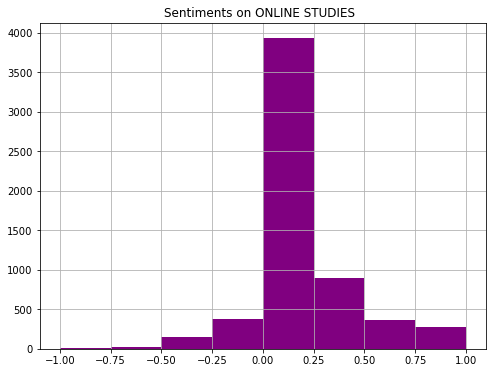

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tweet['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments on ONLINE STUDIES  ")
plt.show()

In [22]:
#feature extraction(only feature)
y=tweet['sentiment'].values
y.shape

(6021,)

In [23]:
x=tweet['text'].values
x.shape

(6021,)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(4816,)
(4816,)
(1205,)


(1205,)

neutral     3047
positive    2422
negative     552
Name: sentiment, dtype: int64


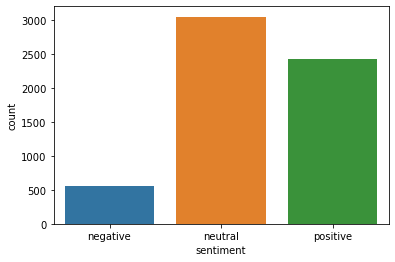

In [26]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

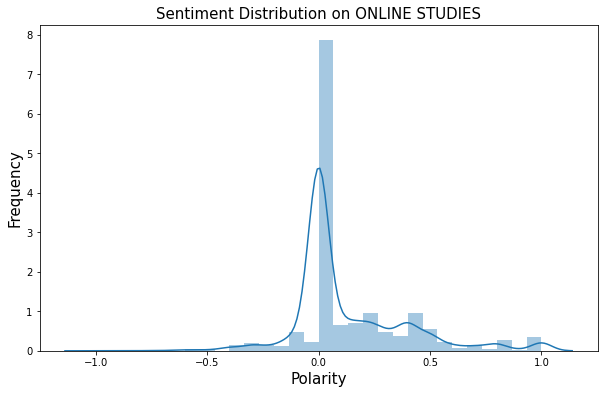

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution on ONLINE STUDIES',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

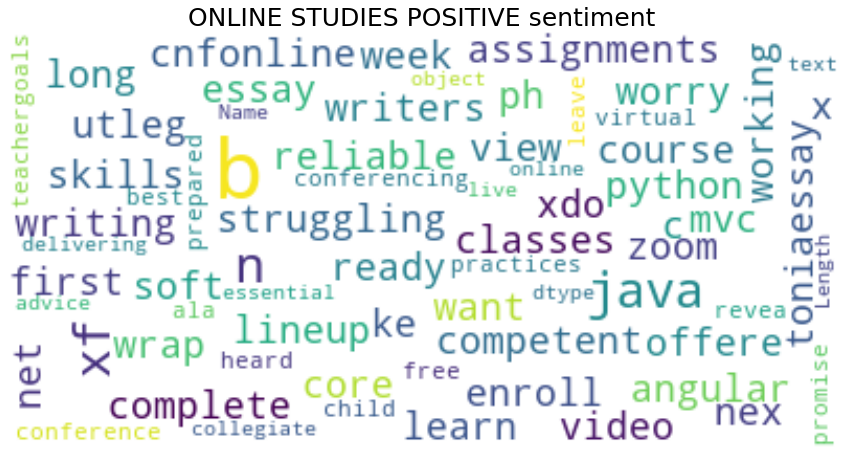

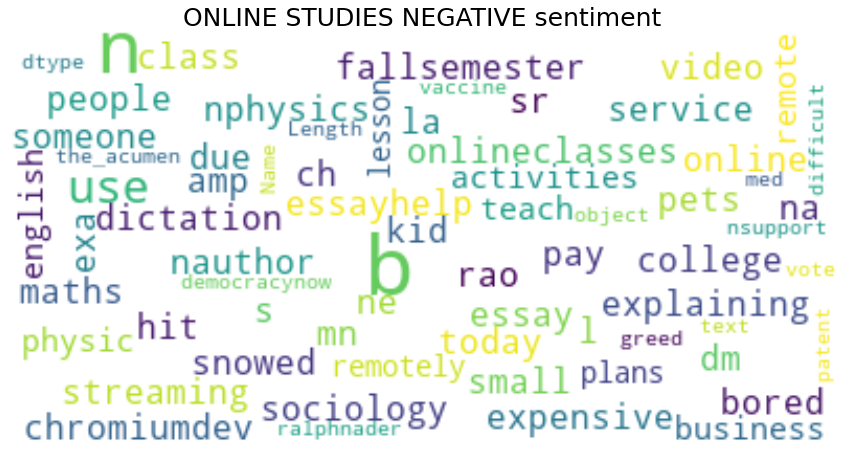

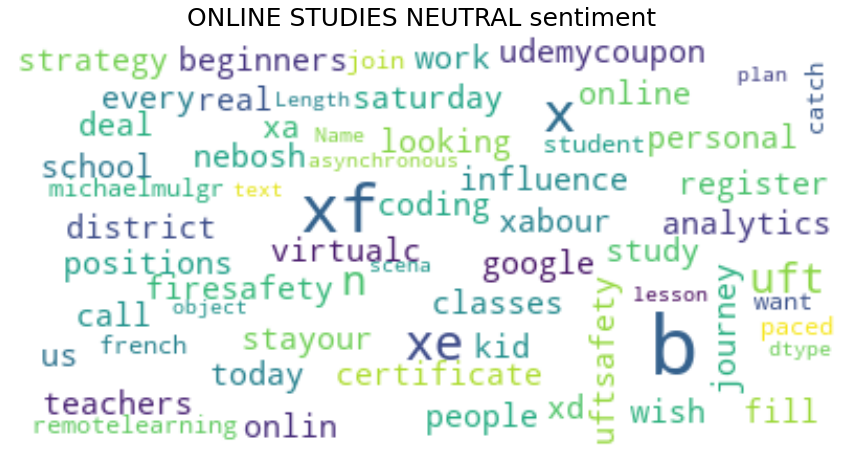

In [28]:
#wordcount with sentiment
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'ONLINE STUDIES POSITIVE sentiment ')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'ONLINE STUDIES NEGATIVE sentiment ')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'ONLINE STUDIES NEUTRAL sentiment ')

In [29]:
count = pd.DataFrame(tweet.groupby('sentiment').sum())
count

created_at  \
sentiment                                                      
negative   29-01-2022 18:0629-01-2022 14:3429-01-2022 14:...   
neutral    29-01-2022 18:0129-01-2022 16:5129-01-2022 16:...   
positive   29-01-2022 18:0029-01-2022 17:5029-01-2022 17:...   

                                                        text  \
sentiment                                                      
negative   b n fallsemester n sociology n essay due n exa...   
neutral    b xf xf x xa xe x xd xf xf xf xabour teachers ...   
positive   b view cnfonline lineup writing classes offere...   

                                                 screen_name  \
sentiment                                                      
negative   b'onlinewriters7'b'AcupuncturePaws'b'Custompap...   
neutral    b'FL4YNonprofit'b'rexacademy1'b'AmericanAdultE...   
positive   b'newpages'b'Keyshawrites7'b'teach_ours'b'abac...   

                                                    location    polarity  
sentiment                                                                 
negative   b'United States'b'Salem, MA'b'USA'b''b'Hyderab... -112.899861  
neutral    b'Edmonds WA'b'Irving, TX'b'Hialeah, FL'b'San ...    0.000000  
positive   b'Michigan'b''b''b''b''b'Utah, USA'b'United St...  891.217501

In [30]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [31]:
words

['b',
 'n',
 'fallsemester',
 'n',
 'sociology',
 'n',
 'essay',
 'due',
 'n',
 'exams',
 'n',
 'final',
 'paper',
 'n',
 'math',
 'n',
 'calculus',
 'n',
 'english',
 'n',
 'onlineclasses',
 'xe',
 'x',
 'xa',
 'b',
 'xf',
 'xf',
 'x',
 'xa',
 'xe',
 'x',
 'xd',
 'xf',
 'xf',
 'xf',
 'xabour',
 'teachers',
 'help',
 'students',
 'grow',
 'conversational',
 'language',
 'skill',
 'providing',
 'everyone',
 'chance',
 'practice',
 'dialogu',
 'xe',
 'x',
 'xa',
 'b',
 'view',
 'cnfonline',
 'lineup',
 'writing',
 'classes',
 'offered',
 'spring',
 'great',
 'mix',
 'introduction',
 'advan',
 'xe',
 'x',
 'xa',
 'b',
 'struggling',
 'complete',
 'assignments',
 'essay',
 'worry',
 'help',
 'n',
 'payessay',
 'n',
 'pay',
 'assignments',
 'xe',
 'x',
 'xa',
 'b',
 'xf',
 'xf',
 'x',
 'xdo',
 'want',
 'learn',
 'soft',
 'skills',
 'course',
 'keep',
 'trends',
 'npopular',
 'topics',
 'learn',
 'n',
 'minut',
 'xe',
 'x',
 'xa',
 'b',
 'every',
 'school',
 'district',
 'looking',
 'fill',


In [32]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head(20)

word  frequency
0                n       8346
1                x       8039
2               xe       6660
3                b       6035
4               xa       5776
5               xf       2874
6    onlineclasses       1263
7           online        765
8   onlinelearning        620
9               xd        613
10        learning        531
11              us        512
12              xb        452
13            help        437
14              xc        437
15        essaydue        393
16        essaypay        376
17   onlinecourses        374
18       education        370
19             amp        362

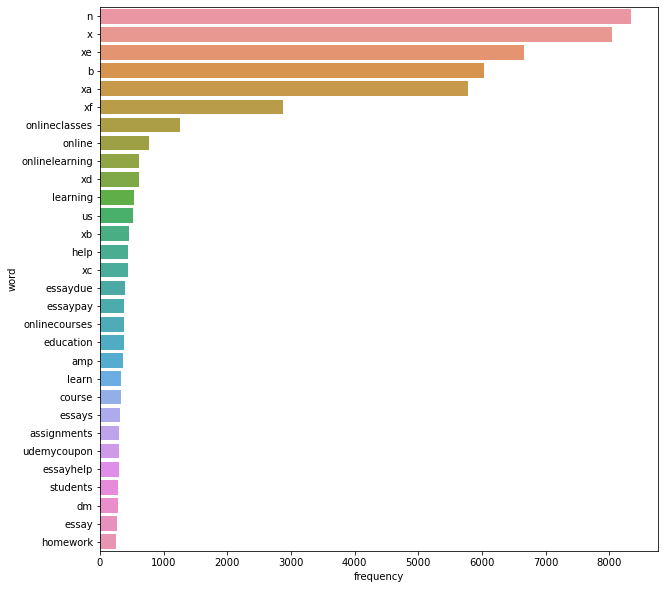

In [33]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [34]:
tweet.to_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_Final_sent_analysis.csv',index=False)

In [35]:
sentiment_df.head()

text  polarity sentiment
0  b n fallsemester n sociology n essay due n exa... -0.041667  negative
1  b xf xf x xa xe x xd xf xf xf xabour teachers ...       0.0   neutral
2  b view cnfonline lineup writing classes offere...       0.8  positive
3  b struggling complete assignments essay worry ...       0.1  positive
4  b xf xf x xdo want learn soft skills course ke...       0.1  positive

In [36]:
sentiment_df.describe()

text  polarity sentiment
count                                                6021    6021.0      6021
unique                                               4630     411.0         3
top     b hire us secure essays n paysomeone naccounts...       0.0   neutral
freq                                                   49    3047.0      3047

In [37]:
sentiment_df.groupby('sentiment').size()

sentiment
negative     552
neutral     3047
positive    2422
dtype: int64

In [38]:
print(sentiment_df.groupby('polarity').size())

polarity
-1.000000      2
-0.800000      2
-0.714286      1
-0.700000      3
-0.650000      1
            ... 
 0.833333      1
 0.850000      7
 0.850000      1
 0.900000     12
 1.000000    138
Length: 411, dtype: int64


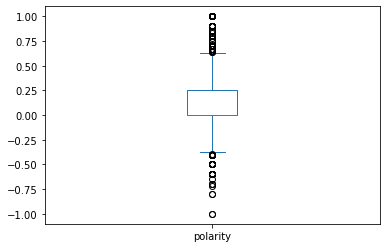

In [39]:
import matplotlib.pyplot as plt
sentiment_df.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

In [40]:
clo=['sentiment','polarity','text']
dataset2=sentiment_df.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

sentiment  polarity                                               text
0  negative -0.041667  b n fallsemester n sociology n essay due n exa...
1   neutral       0.0  b xf xf x xa xe x xd xf xf xf xabour teachers ...
2  positive       0.8  b view cnfonline lineup writing classes offere...
3  positive       0.1  b struggling complete assignments essay worry ...
4  positive       0.1  b xf xf x xdo want learn soft skills course ke...
5   neutral       0.0  b every school district looking fill positions...
6  positive       0.1  b enroll c net java python angular mvc core ph...
7   neutral       0.0  b call us register saturday online classes xf ...
8   neutral       0.0  b stayour kid xe x xs coding journey today n n...
9  positive       0.5  b toniaessay writers competent reliable n java...

In [41]:
dataset2.describe()#dataset2.hist()
#plt.show()

sentiment  polarity                                               text
count       6021    6021.0                                               6021
unique         3     411.0                                               4630
top      neutral       0.0  b hire us secure essays n paysomeone naccounts...
freq        3047    3047.0                                                 49

In [42]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'text'})

In [43]:
df1.head()

text
0  b available n research papers n someone write ...
1  b conversion optimization mastery udemycoupon ...
2  b dm us top grades n springsemester n homework...
3  b whatsapp ndm willard n n essay essaypay essa...
4  b well xe x xa day resume back zoom classes xf...

In [44]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [45]:
df_train.head()

text sentiment
0  b available n research papers n someone write ...  positive
1  b conversion optimization mastery udemycoupon ...   neutral
2  b dm us top grades n springsemester n homework...  positive
3  b whatsapp ndm willard n n essay essaypay essa...   neutral
4  b well xe x xa day resume back zoom classes xf...   neutral

In [46]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'text'})

In [47]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [48]:
df_test.head()

text sentiment
0  b xf xd x xe xf xd x xbf xf xd x xb xf xd x x ...  positive
1  b xe x xt forget xe x xre hand today answer ed...   neutral
2  b master_class excellency top focus n assignme...  positive
3  b leading table talk years thedlac conference ...   neutral
4  b child isolating n nmake screen time positive...   neutral

In [49]:
import string
string.punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [50]:
#storing the puntuation free text in a new column called clean_msg
df_train['text']= df_train['text'].apply(lambda x:remove_punctuation(x))
df_test['text']= df_test['text'].apply(lambda x:remove_punctuation(x))

In [51]:
df_train.head()
#punctuations are removed from news column in train dataset

text sentiment
0  b available n research papers n someone write ...  positive
1  b conversion optimization mastery udemycoupon ...   neutral
2  b dm us top grades n springsemester n homework...  positive
3  b whatsapp ndm willard n n essay essaypay essa...   neutral
4  b well xe x xa day resume back zoom classes xf...   neutral

In [52]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [54]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [55]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['b', 'available', 'n', 'research', 'papers', 'n', 'someone', 'write', 'essay', 'n', 'someonehelppaper', 'n', 'homework', 'n', 'casestudy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'top', 'grades', 'n', 'springsemester', 'n', 'homework', 'n', 'quiz', 'n', 'onlineclasses', 'n', 'essaydue', 'n', 'paywrite', 'n', 'paperpay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mentioned', 'parent', 'advocates', 'favorite', 'schoolchoice', 'schoolchoiceweek', 'parents', 'advocacy', 'parenting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'design', 'beautiful', 'animated', 'websites', 'incredibly', 'fast', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'web', 'dev

Sentence after removing stopwords: ['b', 'occasion', 'celebrate', 'indianness', 'team', 'justtutors', 'wishes', 'happy', 'rd', 'republicday', 'n', 'n', 'republicday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cma', 'aspirants', 'learn', 'best', 'professors', 'siddhii', 'nprofessionalss', 'enquire', 'register', 'contact', 'us', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wake', 'good', 'morning', 'baby', 'n', 'ni', 'wake', 'open', 'link', 'join', 'class', 'fast', 'n', 'n', 'goodnight', 'n', 'covid', 'n', 'onlineclasses']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'commitment', 'excellence', 'dedication', 'towards', 'success', 'makes', 'every', 'program', 'fruitful', 'top', 'notch', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'join', 'won

Sentence after removing stopwords: ['b', 'best', 'analytics', 'certification', 'online', 'amp', 'automation', 'courses', 'n', 'n', 'datascientist', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wrap', 'national', 'school', 'choice', 'week', 'please', 'know', 'sevenstar', 'always', 'available', 'meet', 'family', 'xe', 'x', 'xs', 'uniq', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'repeating', 'online', 'assessments', 'proceed', 'without', 'score', 'another', 'kind', 'headache', 'n', 'nlike', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'register', 'best', 'interior', 'design', 'online', 'course', 'xf', 'xf', 'x', 'xba', 'nbenefit', 'tips', 'tricks', 'home', 'decora', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'highly', 'profitable', 'skills', 'learn', 'n', 'n', 'learning', 'education', 'learn', 'school', 'motivation', 'english', 'love', 'study', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sign', 'newsletter', 'stay', 

Sentence after removing stopwords: ['b', 'join', 'free', 'foundational', 'economics', 'course', 'jumpstayour', 'understanding', 'economics', 'n', 'n', 'economics', 'freecourse', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'powerful', 'thinking', 'exercises', 'tools', 'help', 'learners', 'learn', 'rayjimenez', 'learning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'graphology', 'free', 'online', 'course', 'signature', 'analysis', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'transform', 'career', 'online', 'bsc', 'program', 'able', 'analyze', 'problem', 'amp', 'define', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'interested', 'learning', 'basics', 'working', 'spreadsheets', 'using', 'microsoft', 'excel', 'register', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'professional', 'help', 'handling', 'academic', 'work', 'reach', 'us', 'get', 'di', 'xe', 'x', 'xa']
Sentence after r

Sentence after removing stopwords: ['b', 'best', 'expewriters', 'handle', 'custom', 'essays', 'research', 'papers', 'npay', 'n', 'psychology', 'n', 'essay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'getting', 'ready', 'kickoff', 'dle', 'templates', 'creation', 'sub', 'workgroup', 'team', 'suny', 'instructionaldesign', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'free', 'online', 'platform', 'offline', 'business', 'n', 'neocov', 'wuhan', 'looksgoodonyou', 'biggboss', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tutorkelvin', 'nget', 'excellent', 'grades', 'n', 'algebra', 'n', 'math', 'n', 'calculus', 'n', 'economics', 'n', 'statistics', 'n', 'accounting', 'n', 'nursing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'expeto', 'connect', 'online', 'n', 'nsign', 'free', 'engage', 'coaches', 'consultants', 'mentors', 'ther', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hounslow', 'council', 

Sentence after removing stopwords: ['b', 'huberwood', 'new', 'course', 'investigates', 'specifically', 'mgo', 'wall', 'floor', 'ceiling', 'applications', 'type', 'iii', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'flipped', 'classroom', 'highly', 'effective', 'teaching', 'method', 'students', 'learning', 'online', 'providing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'post', 'brief', 'summary', 'education', 'system', 'philippines', 'appeared', 'first', 'cudy', 'technologies', 'blog', 'n', 'nread', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'plagiarism', 'free', 'papers', 'nfor', 'quality', 'results', 'dm', 'us', 'today', 'n', 'english', 'n', 'msaccess', 'n', 'environmentalstudies', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after

Sentence after removing stopwords: ['b', 'electrician', 'trainees', 'check', 'getwired', 'continuation', 'lighting', 'branch', 'circuits', 'amp', 'introduction', 'special', 'p', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'best', 'free', 'online', 'learning', 'resources', 'entrepreneurs', 'n', 'moocs', 'edtech', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'year', 'new', 'sale', 'n', 'nclick', 'take', 'advantage', 'great', 'offer', 'n', 'n', 'esl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kind', 'words', 'kind', 'trainees', 'hope', 'see', 'future', 'events', 'n']
Sentence after removing stopwords: ['b', 'securing', 'top', 'grades', 'top', 'priority', 'nwe', 'guarantee', 'quality', 'work', 'original', 'content', 'n', 'business', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'strategies', 'help', 'elementary', 'students', 'feel', 'calm', 'distance', 'learning', 'edutopia']
Sentence after removing stopwords:

Sentence after removing stopwords: ['b', 'check', 'product', 'xf', 'xf', 'x', 'xd', 'free', 'course', 'staa', 'business', 'business', 'ideas', 'success', 'xf', 'xf', 'x', 'xd', 'nby', 'myopenacademy', 'nshop', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'byju', 'xe', 'x', 'xs', 'leases', 'office', 'space', 'mumbai', 'xe', 'x', 'xs', 'andheri', 'rs', 'crore', 'annual', 'rent', 'economic', 'times', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'dna', 'amp', 'genetic', 'genealogy', 'certificate', 'register', 'course', 'certificate', 'n', 'dna', 'genetic', 'genealogist', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'guarantee', 'secure', 'top', 'grades', 'need', 'onlineclasses', 'ndm', 'xf', 'xf', 'x', 'xa', 'onlineprotutors', 'n', 'essaypay', 'n', 'online', 'cl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'virtualstudents', 'blended', 'two', 'great', 'online', 'edtech', 'tools', 'today', 'learned', 'food', 'chains', 'answering',

Sentence after removing stopwords: ['b', 'make', 'online', 'studies', 'success', 'great', 'tips', 'online', 'students', 'academics', 'xc', 'xa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'join', 'live', 'show', 'playing', 'n', 'n', 'teachingenglish', 'livestream', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'best', 'online', 'courses', 'elearning', 'mooc', 'onlinecourse', 'onlinelearning', 'moocs', 'onlinecourses']
Sentence after removing stopwords: ['b', 'assignments', 'bothering', 'nwe', 'guarantee', 'quality', 'work', 'original', 'content', 'n', 'programming', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'th', 'batch', 'life', 'coach', 'certification', 'successfully', 'completed', 'n', 'ncongratulations', 'nrathod', 'tanvi', 'n', 'lifeskills', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'download', 'free', 'copy', 'book', 'click', 'buy', 'add', 'email', 'detail', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'compl

Sentence after removing stopwords: ['b', 'aakash', 'joins', 'byju', 'xe', 'x', 'xs', 'universe', 'deal', 'worth', 'nearly', 'billion', 'n', 'n', 'amazonacademy', 'onlinelearning']
Sentence after removing stopwords: ['b', 'offer', 'best', 'always', 'n', 'onlineclasses', 'n', 'assignments', 'n', 'essaypay', 'n', 'essaydue', 'n', 'dissertation', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'assured', 'academic', 'work', 'nguaranteed', 'excellent', 'grades', 'timely', 'delivery', 'n', 'python', 'n', 'onlineclasses', 'n', 'math', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'quantity', 'surveying', 'templates', 'effective', 'cost', 'management', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enroll', 'digital', 'marketing', 'live', 'training', 'batch', 'starts', 'feb', 'hurry', 'limited', 'seats']
Sentence after removing stopwords: ['b', 'worried', 'online', 'course', 'things', 'xe', 'x', 'xll', 'get', 'easy', 'highered',

Sentence after removing stopwords: ['b', 'today', 'writing', 'tips', 'n', 'n', 'get', 'started', 'soon', 'n', 'nexperience', 'popular', 'exclusive', 'video', 'course', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'late', 'nukeneducation', 'build', 'ready', 'xf', 'xf', 'x', 'x', 'n', 'nwe', 'date', 'nuken', 'feature', 'set', 'also', 'new', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'take', 'online', 'class', 'affordable', 'rates', 'secure', 'n', 'math', 'n', 'calculus', 'n', 'econometrics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kindly', 'reach', 'us', 'best', 'writing', 'services', 'n', 'nursing', 'n', 'javascript', 'n', 'biology', 'n', 'paper', 'write', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'practices', 'supercharge', 'online', 'course', 'personalized', 'learning', 'record', 'live', 'sessions', 'equity', 'amp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'day', 'left', '

Sentence after removing stopwords: ['b', 'want', 'create', 'great', 'online', 'course', 'must', 'able', 'define', 'audience', 'one', 'person', 'n', 'nyou', 'need', 'k', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'news', 'emotional', 'intelligence', 'developed', 'coached', 'n', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enjoy', 'learning', 'sciences', 'anywhere', 'anytime', 'comfoof', 'mobile', 'device', 'nvisit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'philippines', 'best', 'place', 'study', 'culinary', 'arts', 'asia', 'n', 'nread', 'full', 'article', 'best', 'universit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'converting', 'whole', 'self', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'assam', 'town', 'university', 'records', 'placements', 'high', 'salary', 'rs', 'lpa', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'great', 'stat

Sentence after removing stopwords: ['b', 'social', 'entrepreneurship', 'course', 'empower', 'open', 'world', 'universitystartups', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xceducation', 'powerful', 'weapon', 'use', 'change', 'world', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'bb', 'king', 'n', 'n']
Sentence after removing stopwords: ['b', 'proud', 'lauramariasinisalo', 'took', 'stage', 'cambrilearnedu', 'open', 'day', 'event', 'last', 'night', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'russian', 'alphabet', 'quick', 'learn', 'course', 'free', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'demo', 'bangalore', 'school', 'vedic', 'math', 'quick', 'math', 'nnava', 'vision', 'providing', 'academics', 'amp', 'non', 'academics', 'classes', 'nfo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'let', 'restrictions', 'stop', 'learning', 'join', 'online', 'training', 'programs', 'nstay', 

Sentence after removing stopwords: ['b', 'get', 'access', 'course', 'xe', 'x', 'xchow', 'give', 'living', 'room', 'makeover', 'xe', 'x', 'xd', 'skillshare', 'completely', 'free', 'weeks', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'staff', 'alexandra', 'hills', 'state', 'high', 'school', 'thoroughly', 'enjoyed', 'geography', 'activity', 'nuiteq', 'snowflake', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'big', 'list', 'predictions', 'pretty', 'spot', 'onlinelearning', 'vr', 'personalization', 'big', 'topics']
Sentence after removing stopwords: ['b', 'complete', 'guide', 'managing', 'projects', 'excelling', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'purple', 'academy', 'provides', 'open', 'access', 'free', 'online', 'cybersecurity', 'courses', 'n', 'n', 'online', 'infosec', 'courses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learning', 'time', 'covid', 'online', 'education', 'got', 'big', 'amaz

Sentence after removing stopwords: ['b', 'educator', 'free', 'access', 'app', 'create', 'different', 'grids', 'xe', 'x', 'xa', 'xe', 'x', 'xaclassrooms', 'xe', 'x', 'xa', 'xe', 'x', 'xaand', 'topics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'come', 'learn', 'use', 'free', 'audio', 'production', 'software', 'audacity', 'mix', 'edit', 'audio', 'show', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ableton', 'live', 'beyond', 'music', 'production', 'masterclass', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'special', 'degree', 'milegi', 'online', 'classes', 'valo', 'ko', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'n', 'n', 'onlinelearning']
Sentence after removing stopwords: ['b', 'golden', 'age', 'teachers', 'coming', 'back', 'says', 'byju', 'raveendran', 'techsparks', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'great', 'learning', 'edtech', 'firm', 'great', 'learning', 'cloc

Sentence after removing stopwords: ['b', 'need', 'help', 'essay', 'nguaranteed', 'excellent', 'grades', 'timely', 'delivery', 'n', 'n', 'onlineclasses', 'n', 'mspowerpoint', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happy', 'national', 'school', 'choice', 'week', 'colorado', 'many', 'school', 'options', 'explore', 'check', 'resources', 'today', 'enr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'complete', 'digital', 'marketing', 'strategy', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'paired', 'bridget', 'b', 'baker', 'engaging', 'text', 'ngss', 'instruction', 'images', 'animals', 'winter', 'help', 'student', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'beautiful', 'thing', 'learning', 'nobody', 'take', 'away', 'choose', 'bruzoo', 'nfor', 'info', 'n', 'bruzoo', 'nvis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'introduction', 'tai', 'chi', 'n', 'nth', 'amp', 'th', 'amp', 'st', 

Sentence after removing stopwords: ['b', 'new', 'lesson', 'plan', 'know', 'electric', 'cars', 'around', 'around', 'years', 'change', 'future', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'super', 'fun', 'article', 'regarding', 'fluidity', 'dynamics', 'young', 'metamorphic', 'culture', 'language', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'free', 'webinar', 'hosted', 'amarrgaragedoor', 'february', 'nd', 'pm', 'et', 'pm', 'pt', 'featuring', 'design', 'aluminum', 'full', 'view', 'sec', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'new', 'teaching', 'ideas', 'take', 'per', 'course', 'promo', 'code', 'newjan', 'visit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'startups', 'india', 'indian', 'startups', 'raise', 'billion', 'quarter', 'first', 'time', 'reposays', 'economic', 'ti', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'btw', 'covered', 'research', 'effective', 'onlinelearning', 'particularly', 'work', 'x

Sentence after removing stopwords: ['b', 'xe', 'x', 'xm', 'almost', 'ok', 'onlinelearning', 'deal', 'daily', 'event', 'schooltraffic']
Sentence after removing stopwords: ['b', 'thankyou', 'uptechrepofor', 'featuring', 'doctornarine', 'amp', 'inspaceedu', 'interested', 'exploring', 'inspace', 'let', 'connect', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'available', 'onlineteaching', 'transformational', 'educator', 'dr', 'bruce', 'johnson', 'learn', 'xe', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'easy', 'online', 'course', 'ideas', 'sell', 'via', 'youtube', 'n', 'courses', 'elearning', 'feedback', 'ideas', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nmtp', 'believes', 'content', 'departmental', 'content', 'must', 'integrated', 'meaningful', 'provide', 'meaningful', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'students', 'parents', 'able', 'track', 'progress', 'lessons', 'easy', 'view', 'dashboard', 'tsa', 'learn', 'xe

Sentence after removing stopwords: ['b', 'data', 'analyst', 'career', 'path', 'codecademy', 'completed', 'last', 'couple', 'days', 'learned', 'tidy', 'data', 'eda', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'industries', 'dynamic', 'fashion', 'continuous', 'education', 'key', 'thrive', 'n', 'nread', 'great', 'interview', 'con', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'go', 'far', 'get', 'career', 'nenroll', 'rao', 'interactive', 'classes', 'today', 'study', 'yo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'top', 'ux', 'ui', 'design', 'courses', 'mumbai', 'n', 'mumbai', 'onlineclasses']
Sentence after removing stopwords: ['b', 'many', 'businesses', 'looking', 'applicants', 'cad', 'skills', 'take', 'advantage', 'solasfet', 'amp', 'ecollegeirl', 'free', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xc', 'xcsk', 'xc', 'xbcdaronlines', 'xc', 'xbnavistiyor', 'nothing', 'important', 'health', 'life', 'put', 'risk', 'xe', 'x', 'xa']

Sentence after removing stopwords: ['b', 'fortunate', 'growing', 'number', 'clients', 'profit', 'sector', 'love', 'see', 'creative', 'ways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'product', 'xf', 'xf', 'x', 'xd', 'free', 'course', 'draw', 'illustration', 'using', 'pen', 'tool', 'illustrator', 'xf', 'xf', 'x', 'xd', 'nby', 'myopenacade', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'examples', 'psychologically', 'safe', 'environments', 'candid', 'growth', 'focused', 'feedback', 'xe', 'x', 'x', 'time', 'w', 'g', 'team', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'professional', 'help', 'handling', 'academic', 'work', 'reach', 'us', 'get', 'di', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tutorkelvin', 'nneed', 'excellent', 'grades', 'academic', 'papers', 'got', 'n', 'onlineclasses', 'n', 'essaydue', 'n', 'essaypay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tips', 'giving', 'great', 'onlin

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xac', 'message', 'put', 'answer', 'comments', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'asl', 'made', 'simple', 'amp', 'easy', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'x', 'xa', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'concerted', 'effort', 'potus', 'n', 'nwhere', 'team', 'brilliant', 'virologists', 'keeping', 'us', 'informed', 'daily', 'n', 'nwhy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'free', 'accounting', 'online', 'courses', 'n', 'n', 'resources', 'n', 'resources', 'freebie', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ss', 'teamed', 'xe', 'x', 'xcbuild', 'snowman', 'race', 'xe', 'x', 'xd', 'today', 'ss', 'also', 'enjoyed', 'little', 'crypto', 'hack', 'playblooket', 'p', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learnowaves', 'wishes', 'happy', 'indian', 'republic', 'day', 'n', 'learnowaves', 'republicdayindia', 'happyrepublicday', 'india', 'xe'

Sentence after removing stopwords: ['b', 'forget', 'old', 'school', 'methods', 'embrace', 'online', 'learning', 'n', 'cancelled', 'classes', 'n', 'stuck', 'traffic', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'develop', 'conversation', 'listening', 'skills', 'collection', 'ready', 'made', 'lessons', 'esl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watch', 'walkthrough', 'video', 'see', 'coresciences', 'action', 'gcsescience', 'sciencepracticals', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'professionally', 'done', 'essay', 'assignments', 'homework', 'school', 'work', 'kindly', 'dm', 'us', 'deliver', 'ti', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'expect', 'day', 'techsparks', 'india', 'xe', 'x', 'xs', 'large', 'startup', 'tech', 'conference', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'best', 'tutors', 'take', 'n', 'essays', 'n', 'paperpay', 'n', 'casestudy', 'n', 'homeworkdue', 'n',

Sentence after removing stopwords: ['b', 'best', 'contentmarketing', 'online', 'courses', 'marketers', 'n', 'n', 'smallbiz', 'startups', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'excellent', 'grades', 'n', 'discountedprice', 'n', 'essaydue', 'n', 'project', 'n', 'macroeconomics', 'n', 'termpaper', 'n', 'thesis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'zoom', 'fatigue', 'real', 'make', 'sure', 'take', 'care', 'endless', 'online', 'sessions', 'give', 'eyes', 'brai', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'meet', 'th', 'grader', 'jurre', 'xf', 'xf', 'x', 'xb', 'n', 'nafter', 'reading', 'malala', 'magic', 'pencil', 'jurre', 'shared', 'wishes', 'world', 'xf', 'xf', 'xc', 'xe', 'ar', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'struggling', 'assignment', 'nuse', 'professional', 'writing', 'service', 'n', 'msexcel', 'n', 'statistics', 'n', 'technology', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 

Sentence after removing stopwords: ['b', 'students', 'suffering', 'way', 'much', 'attending', 'classes', 'online', 'enough', 'prepare', 'offl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'u', 'students', 'access', 'free', 'microsoft', 'office', 'includes', 'microsoft', 'word', 'powerpoint', 'excel', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'assured', 'academic', 'work', 'nuse', 'professional', 'writing', 'service', 'n', 'calculus', 'n', 'onlineclasses', 'n', 'technology', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'best', 'nios', 'center', 'lucknow', 'n', 'n', 'iileducationcenter', 'iillucknow', 'nios', 'besteducation', 'educationcenter', 'learning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'selling', 'amazon', 'comp

Sentence after removing stopwords: ['b', 'love', 'xe', 'xd', 'xa', 'xef', 'xb', 'xf', 'students', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xfcome', 'alive', 'choice', 'flexibility', 'xe', 'xc', 'xd', 'xef', 'xb', 'xf', 'interests', 'xf', 'xf', 'xc', 'xf', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learning', 'thing', 'mind', 'never', 'exhausts', 'never', 'fears', 'never', 'regrets', 'leonardo', 'da', 'vinci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hateful', 'speech', 'name', 'religion', 'also', 'kind', 'terrorism', 'ninternal', 'disputes', 'always', 'benefits', 'enemy', 'nhapp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'power', 'stocks', 'xe', 'x', 'x', 'zero', 'hero', 'courses', 'free', 'download', 'udemy', 'udemycourse', 'udemyfree', 'udemycoupon', 'onlineco

Sentence after removing stopwords: ['b', 'check', 'course', 'via', 'thinkific', 'filling', 'creative', 'well', 'starts', 'st', 'march', 'sign', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learn', 'use', 'free', 'open', 'source', 'front', 'end', 'framework', 'developing', 'html', 'css', 'javascript', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'together', 'learn', 'together', 'grow', 'xf', 'xf', 'x', 'xa', 'n', 'njoin', 'best', 'second', 'life', 'free', 'amp', 'welcome', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'incredible', 'result', 'christian', 'aneke', 'successfully', 'completed', 'city', 'amp', 'guilds', 'level', 'nvq', 'diploma', 'adu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'faith', 'hearts', 'independence', '

Sentence after removing stopwords: ['b', 'ubuntu', 'linux', 'virtualbox', 'quick', 'setup', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'proud', 'share', 'top', 'spot', 'online', 'bachelor', 'degree', 'program', 'nation', 'xc', 'xa', 'uf', 'xc', 'xa', 'xf', 'xf', 'x', 'xbb', 'xf', 'xf', 'xa', 'x', 'xc', 'xa', 'goerau', 'xc', 'xa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'assignments', 'nwe', 'deliver', 'best', 'services', 'n', 'biology', 'n', 'onlineclasses', 'n', 'programming', 'n', 'history', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mentorwolf', 'assist', 'loved', 'one', 'struggling', 'stress', 'management', 'enrol', 'get', 'customized', 'st', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removi

Sentence after removing stopwords: ['b', 'old', 'man', 'oil', 'pastel', 'paper', 'n', 'abhibiswas', 'avijit', 'artistontwitter', 'artist', 'artsofashes', 'artoflegends', 'artph', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'delighted', 'working', 'rhonda', 'scharf', 'deliver', 'one', 'popular', 'courses', 'february', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'making', 'schools', 'xc', 'xatrans', 'kids', 'friendly', 'new', 'indian', 'express', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'facebook', 'ads', 'copywriting', 'amp', 'facebook', 'ads', 'real', 'estate', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'masterclass', 'excellency', 'top', 'focus', 'n', 'assignment', 'du

Sentence after removing stopwords: ['b', 'online', 'master', 'screenwriting', 'class', 'first', 'pages', 'begins', 'march', 'th', 'please', 'register', 'early', 'seating', 'limit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'hire', 'expeto', 'help', 'secure', 'quality', 'grades', 'thesis', 'coursework', 'onlineclasses', 'daysofcode', 'mylab', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'byjus', 'health', 'insurance', 'policy', 'byju', 'rolls', 'enhanced', 'insurance', 'policy', 'employees', 'economic', 'times', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'size', 'fit', 'comes', 'education', 'andrewrcamp', 'education', 'advocate', 'breaks', 'school', 'cho', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'best', 'online', 'courses', 'elearning', 'mooc', 'onlinecourse', 'onlinelearning', 'moocs', 'onlinecourses']
Sentence after removing stopwords: ['b', 'assignment', 'essay', 'due', 'week', 'hmu', 'top', 'grade', 'services

Sentence after removing stopwords: ['b', 'spring', 'intake', 'enrol', 'benefit', 'early', 'bird', 'discount', 'n']
Sentence after removing stopwords: ['b', 'like', 'many', 'advances', 'history', 'mankind', 'instructional', 'design', 'product', 'war', 'specific', 'ca', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'securing', 'top', 'grades', 'top', 'priority', 'nguaranteed', 'excellent', 'grades', 'timely', 'delivery', 'n', 'msexcel', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'easy', 'lucky', 'many', 'dedicated', 'students', 'online', 'past', 'weeks', 'hour', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fun', 'easy', 'watch', 'engaging', 'animated', 'videos', 'rather', 'reading', 'boring', 'textbook', 'explaining', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'let', 'us', 'handle', 'academic', 'work', 'hit', 'top', 'quality', 'work', 'n', 'essays', 'essaywriting', 'n', 'essayhelp', 'homework', 'xe', 'x', 'xa']

Sentence after removing stopwords: ['b', 'gave', 'little', 'quickly', 'onlineteachingfails', 'zoommeetings', 'onlinelearning']
Sentence after removing stopwords: ['b', 'seeking', 'help', 'scoring', 'good', 'economics', 'exams', 'n', 'n', 'students', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'demand', 'web', 'developers', 'rising', 'many', 'industries', 'staa', 'successful', 'career', 'web', 'development', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'secondleif', 'helpful', 'thank', 'much', 'secondleif', 'n', 'mieexpe', 'teamsmania', 'microsoftedu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'virtual', 'aactivity', 'held', 'grades', 'th', 'st', 'jan', 'fun', 'filled', 'activities', 'witnessed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'xad', 'x', 'xef', 'xb', 'xf', 'explore', 'exciting', 'world', 'amazing', 'information', 'amp', 'enhance', 'generalknowledge', 'n', 'n', 'xf', 'xf', 'x', 'x', 'kindly', 'visit', 'tuk

Sentence after removing stopwords: ['b', 'always', 'nice', 'keep', 'developing', 'n', 'n', 'pets', 'adventures', 'onlinelearning', 'dailygratitude', 'wychavon', 'evesham', 'pershore', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'shortcut', 'place', 'worth', 'going', 'n', 'graduation', 'exellence', 'onlineclasses', 'wwenxt']
Sentence after removing stopwords: ['b', 'welcome', 'keynote', 'speaker', 'maha', 'bali', 'balimaha', 'learn', 'us', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wants', 'learn', 'pompeii', 'taking', 'class', 'wanted', 'share', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', 'x', 'proud', 'graduates', 'xf', 'xf', 'x', 'xf', 'n', 'nyou', 'speak', 'member', 'team', 'today', 'pm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xef', 'xb', 'xfcan', 'believe', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'nthe', 'lightroom', 'cc', 'made', 'easy', 'taught', 'pro', 'photographer', 'myopenacademy', 'n

Sentence after removing stopwords: ['b', 'thanks', 'musicconnection', 'write', 'know', 'teacher', 'grades', 'could', 'use', 'guest', 'instructor', 'fo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'onlineclasses', 'replace', 'offline', 'curriculum', 'nd', 'february', 'cottonuniversity', 'read', 'full', 'story', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'amazing', 'offer', 'help', 'child', 'learn', 'affordably', 'nvisit', 'stalearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wish', 'happy', 'republic', 'day', 'millioncenters', 'n', 'n', 'tuition', 'education', 'tutor', 'learning', 'tutoring', 'english', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happy', 'republic', 'day', 'xf', 'xf', 'x', 'xae', 'xf', 'xf', 'x', 'xb

Sentence after removing stopwords: ['b', 'know', 'best', 'practices', 'nonprofit', 'email', 'marketing', 'need', 'follow', 'drive', 'action', 'k', 'ed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stay', 'safe', 'stay', 'healthy', 'republic', 'day', 'sending', 'warm', 'greetings', 'day', 'n', 'nhappy', 'republic', 'day', 'n', 'n', 'nvisit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'day', 'amsterdam', 'xc', 'xa', 'ntoday', 'twenty', 'third', 'rd', 'day', 'january', 'ndoes', 'anyone', 'still', 'handwrite', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mrskristenpaul', 'would', 'much', 'rather', 'remotelearning', 'remoteoptionnow', 'due', 'covid', 'safetyfirst', 'attendance', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'access', 'exceptional', 'education', 'anywhere', 'anytime', 'isdc', 'learning', 'nbe', 'paof', 'dynamic', 'digital', 'learning', 'communit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'know', 'goodhabitz', 'iso', 'certified', 'organisation', 'got', 'new', 'updated', 'certificate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'working', 'team', 'e', 'g', 'work', 'colleges', 'important', 'members', 'work', 'together', 'complete', 'goals', 'crea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'really', 'lucky', 'working', 'talented', 'team', 'uolonlineed', 'together', 'found', 'way', 'handle', 'difficult', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'post', 'different', 'type', 'studying', 'preferences', 'appeared', 'first', 'cudy', 'technologies', 'blog', 'n', 'nread', 'full', 'article', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'byju', 'incuspaze', 'lease', 'seats', 'byju', 'ahmedabad', 'amp', 'lucknow', 'real', 'estate', 'news', 'et', 'realestate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'k', 'schools', 'access', 'adequate', 'networ

Sentence after removing stopwords: ['b', 'let', 'us', 'handle', 'academic', 'work', 'affordable', 'rates', 'hit', 'top', 'quality', 'work', 'n', 'essays', 'essaywriting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'payu', 'launches', 'unique', 'tokenisation', 'solution', 'payu', 'token', 'hub', 'major', 'card', 'networks', 'amp', 'banks', 'business', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'digitalisation', 'schooling', 'balancing', 'young', 'people', 'xe', 'x', 'xs', 'education', 'wellbeing', 'n', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'attending', 'school', 'east', 'coast', 'living', 'west', 'coast', 'really', 'joke', 'class', 'time', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'really', 'felt', 'little', 'k

Sentence after removing stopwords: ['b', 'enroll', 'today', 'go', 'gradesuccess', 'tutoring', 'grade', 'success', 'personal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sweedu', 'schoolerpsoftware', 'offers', 'feature', 'filled', 'online', 'live', 'class', 'module', 'help', 'make', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'may', 'remotelearning', 'xe', 'x', 'xre', 'still', 'building', 'anticipation', 'lord', 'flies', 'novelstudy', 'apparently', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'essential', 'platform', 'choose', 'host', 'course', 'provides', 'tools', 'able', 'sell', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'ensure', 'business', 'video', 'professional', 'reaches', 'right', 'audience', 'njoin', 'erfskillnet', 'cbmediaie', 'feb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'best', 'education', 'xf', 'xf', 'x', 'xc', 'njoin', 'taxwealth', 'n', 'n', 'taxwealth', 'co

Sentence after removing stopwords: ['b', 'reading', 'takes', 'adventures', 'places', 'near', 'far', 'n', 'nwhat', 'read', 'today', 'n', 'n', 'kumon', 'kumonbahrain', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'exact', 'match', 'domain', 'available', 'acquisition', 'n', 'n', 'digitalservicesact', 'servicetweet', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'raring', 'read', 'brings', 'stories', 'alive', 'comfoof', 'home', 'via', 'zoom', 'n', 'nthis', 'online', 'programme', 'features', 'interact', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'honoured', 'present', 'associate', 'partner', 'year', 'vong', 'sdg', 'championship', 'pluskul', 'modern', 'guruku', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'professional', 'help', 'handling', 'academic', 'work', 'reach', 'us', 'get', 'di', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'space', 'render', 'classic', 'edition', 'create', 'live', 'audio', 'rooms', 'onlinec

In [56]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['b', 'teachmintapp', 'hey', 'xe', 'x', 'xre', 'unable', 'xe', 'x', 'xedit', 'xe', 'x', 'x', 'digital', 'pamphlets', 'getting', 'highlight', 'xe', 'x', 'xsomething', 'went', 'wrong', 'xe', 'x', 'x', 'cl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'npaywrite', 'n', 'homeworkslave', 'n', 'xe', 'xc', 'xcalculus', 'n', 'essaydue', 'n', 'xe', 'xc', 'xmath', 'n', 'onlineclasses', 'n', 'xe', 'xc', 'xessay', 'due', 'n', 'xe', 'xc', 'xpaper', 'pay', 'n', 'xe', 'xc', 'xfinance', 'n', 'xe', 'xc', 'xeconomic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'number', 'public', 'schools', 'recorded', 'disruptions', 'temporary', 'closures', 'pivots', 'back', 'remote', 'learni', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kangaroo', 'crew', 'alphabet', 'matching', 'game', 'nonline', 'learning', 'n']
Sentence after removing stopwords: ['b', 'akshay', 'kumar', 'collective', 'artists', 'backed', 'socialswagworld', 

Sentence after removing stopwords: ['b', 'artificial', 'intelligence', 'future', 'work', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learn', 'late', 'onlineeducation', 'changing', 'china', 'u', 'edtech', 'expejuliette', 'li', 'nborn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'post', 'lockdown', 'amp', 'remote', 'learning', 'post', 'lockdown', 'onlinelearning']
Sentence after removing stopwords: ['b', 'get', 'hard', 'grow', 'expanding', 'competition', 'changing', 'expectations', 'grow', 'schools', 'courage', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'late', 'e', 'learning', 'news', 'resources', 'updated', 'daily', 'elearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'masterclass', 'c', 'programming', 'amp', 'unity', 'game', 'development', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'onlineclasses', 'woefully', 'inadequate', 'n', 'te

Sentence after removing stopwords: ['b', 'ace', 'career', 'power', 'artificial', 'intelligence', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'superminds', 'future', 'artificial', 'intelligence', 'ai', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hit', 'dm', 'n', 'pay', 'someone', 'nphysics', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmaths', 'n', 'essaydue', 'nchem', 'n', 'assignments', 'n', 'assignment', 'due', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nep', 'implemented', 'tamil', 'nadu', 'says', 'cm', 'stalin', 'late', 'news', 'india', 'hindustan', 'times', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'long', 'hours', 'continuous', 'online', 'class', 'xf', 'xf', 'xa', 'xaf', 'xf', 'xf', 'x', 'x', 'n', 'n', 'online', 'onlinelearning', 'onlineexams', 'daysofcode', 'onlinecourses']
Sentence after removing stopwords: ['b', 'hbcus', 'found', 'thing', 'missing'

Sentence after removing stopwords: ['b', 'hbcus', 'found', 'thing', 'missing', 'onlinelearning', 'community', 'highered', 'students', 'nccu', 'found', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'invest', 'professional', 'goal', 'iinc', 'nspend', 'less', 'money', 'learning', 'plan', 'take', 'multiple', 'courses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'started', 'n', 'onlineeducation', 'learning', 'nthe', 'topic', 'online', 'course', 'either', 'subject', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'late', 'episode', 'wiwtk', 'podcast', 'schoolchoice', 'pioneer', 'dr', 'howard', 'full', 'discusses', 'past', 'present', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'reliable', 'finance', 'assignment', 'help', 'service', 'stop', 'worrying', 'plagiarism', 'due', 'date', 'ncontact', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'schools', 'remain', 'closed', 'th', 'february', 'onlineclasses', 'continue', 'pe

Sentence after removing stopwords: ['b', 'game', 'n', 'homeschool', 'elearning', 'teaching', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'advanced', 'artificial', 'intelligence', 'app', 'creation', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'things', 'xe', 'x', 'xt', 'talk', 'enough', 'onlinelearning', 'remotework', 'less', 'time', 'based', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'discover', 'secret', 'hacks', 'three', 'affiliate', 'marketer', 'brand', 'new', 'training', 'money', 'grub', 'n', 'digitalmarketing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'snowed', 'bored', 'onlineclasses', 'people', 'amp', 'pets', 'sale', 'ends', 'dogs', 'dogsoftwitter', 'caturday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cost', 'accounting', 'artificial', 'intelligence', 'tools', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cbschicago

Sentence after removing stopwords: ['b', 'exclusive', 'byju', 'takes', 'series', 'f', 'round', 'mn', 'bn', 'valuation', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'hmu', 'n', 'onlineclasses', 'n', 'essaydue', 'n', 'literature', 'n', 'nursing', 'n', 'mathematics', 'n', 'economics', 'n', 'psychology', 'n', 'assignment', 'due', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pay', 'someone', 'nphysics', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmaths', 'n', 'essaydue', 'nchem', 'n', 'assignments', 'n', 'assignment', 'due', 'neconomics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'parents', 'urge', 'education', 'minister', 'hold', 'board', 'exams', 'hybrid', 'mode', 'jammu', 'kashmir', 'late', 'news', 'tourism', 'breaking', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'npaywrite', 'n', 'homeworkslave', 'n', 'xe', 'xc', 'xcalculus', 'n', 'essaydue', 'n', 'xe', 'xc', 'xmath', 'n', 

Sentence after removing stopwords: ['b', 'parents', 'urge', 'education', 'minister', 'hold', 'board', 'exams', 'hybrid', 'mode', 'jammu', 'kashmir', 'late', 'news', 'tourism', 'breaking', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'could', 'use', 'dictation', 'activities', 'remote', 'physical', 'classroom', 'esl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xef', 'xb', 'xfcan', 'believe', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'nmake', 'mega', 'dude', 'action', 'shooter', 'game', 'unity', 'pixel', 'aby', 'myopenacademy', 'n', 'xf', 'xf', 'x', 'x', 'shop', 'ran', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kangaroo', 'crew', 'alphabet', 'matching', 'game', 'nonline', 'learning', 'n']
Sentence after removing stopwords: ['b', 'still', 'lessons', 'learned', 'pandemic', 'ebb', 'flow', 'emergency', 'remote', 'instruction', 'v', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hmu', 'n', 'onlineclasses', 'n', 'essaydue', 'n', 

Sentence after removing stopwords: ['b', 'artificial', 'intelligence', 'future', 'work', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'seccardona', 'child', 'die', 'get', 'sick', 'economy', 'school', 'staff', 'allow', 'remotelearning']
Sentence after removing stopwords: ['b', 'fun', 'learning', 'onlineclasses', 'fail', 'understand', 'logic', 'places', 'open', 'schools', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hmu', 'n', 'onlineclasses', 'n', 'essaydue', 'n', 'literature', 'n', 'nursing', 'n', 'mathematics', 'n', 'economics', 'n', 'psychology', 'n', 'assignment', 'due', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'online', 'class', 'today', 'nauthor', 'mn', 'rao', 'sr', 'maths', 'lecturer', 'ntopic', 'jee', 'mains', 'late', 'news', 'n', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'work', 'hard', 'deliver', 'desired', 'grade', 'nuse', 'professional', 'writing

Sentence after removing stopwords: ['b', 'xe', 'x', 'xcsometimes', 'people', 'assume', 'participate', 'blind', 'real', 'issue', 'materials', 'either', 'xe', 'x', 'xa']


In [57]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['b', 'conversion', 'optimization', 'mastery', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'whatsapp', 'ndm', 'willard', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue', 'essays', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'well', 'xe', 'x', 'xa', 'day', 'resume', 'back', 'zoom', 'classes', 'xf', 'xf', 'x', 'xc', 'n', 'nwhy', 'feel', 'like', 'reliving', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'struggling', 'assignment', 'nfor', 'quality', 'results', 'dm', 'us', 'today', 'n', 'geography', 'n', 'codingprojects', 'n', 'java', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'understanding', 'gamification', 'help', 'improve', 'online', 'learning', 'n', 'n', 'onlinelearning', 'elearning', 'edtech', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'choose', 'name', 'online', 'course', 'sells

Sentence after removing stopwords: ['b', 'education', 'ministry', 'notifies', 'four', 'year', 'integrated', 'teacher', 'education', 'programme', 'times', 'india', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'essays', 'assignments', 'handled', 'experts', 'n', 'pay', 'someone', 'n', 'essayhelp', 'n', 'english', 'n', 'essaypay', 'n', 'maths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'assignment', 'n', 'biochem', 'n', 'essaypay', 'n', 'essaydue', 'n', 'assignmenthelp', 'n', 'paysomeone', 'n', 'essayhelp', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learn', 'hvac', 'online', 'n', 'n', 'onlinelearning', 'onlinecourses', 'onlinelearningcourse']
Sentence after removing stopwords: ['b', 'techtools', 'presentation', 'drchristianelia', 'educationaltechnology', 'class', 'showcased', 'google', 'classroom', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'autocad', 'training', 'allahabad', 'n', 'xf', 'xf'

Sentence after removing stopwords: ['b', 'improve', 'virtualclassroom', 'training', 'lightbulbjo', 'three', 'liveonlinelearning', 'experts', 'contri', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'youtube', 'thumbnail', 'masterclass', 'ultimate', 'guide', 'thumbnails', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'product', 'xf', 'xf', 'x', 'xd', 'learn', 'self', 'hypnosis', 'fulfill', 'goals', 'dreams', 'desires', 'xf', 'xf', 'x', 'xd', 'nby', 'myopenacademy', 'nshop', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'quickbooks', 'desktop', 'profit', 'organizations', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ad', 'xe', 'x', 'xs', 'hacker', 'growth', 'hacking', 'certification', 'marketers', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'done', 'course', 'content', 'time', 'write', 'killer', '

Sentence after removing stopwords: ['b', 'virtual', 'teaching', 'stay', 'educators', 'must', 'take', 'control', 'engage', 'students', 'enable', 'interactive', 'collaboration', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wave', 'accounting', 'onlineclasses', 'onlinecourses', 'freeonlinecourses', 'onlinetutorials']
Sentence after removing stopwords: ['b', 'look', 'legit', 'affordable', 'writers', 'nexcel', 'n', 'algebra', 'n', 'onlineclasses', 'n', 'geography', 'n', 'codingprojects', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hmu', 'help', 'coursework', 'classes', 'n', 'pearson', 'n', 'aleks', 'n', 'blackboard', 'n', 'onlineclasses', 'n', 'exams', 'n', 'quiz', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'futuristic', 'digital', 'marketing', 'course', 'student', 'edition', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ultimate', 'guide', 'youtube', 'channel', 'amp', 'youtube', 'maste

Sentence after removing stopwords: ['b', 'hire', 'essay', 'prodigy', 'quality', 'essays', 'hmu', 'n', 'essay', 'n', 'essaydue', 'n', 'essayhelp', 'n', 'essaypay', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whatsapp', 'ndm', 'willard', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue', 'essays', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'drueiin', 'victoryessays', 'dm', 'willard', 'nwhatsapp', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'student', 'works', 'doodle', 'works', 'students', 'level', 'online', 'program', 'n', 'n', 'teacher', 'artshare', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'namaste', 'grateful', 'moment', 'parenting', 'parenthood', 'ever', 'since', 'way', 'life', 'quarantine', 'wfh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'time', 'management', 'mastery', 'boost', 'productivity', 'save', 'ti

Sentence after removing stopwords: ['b', 'hear', 'imagine', 'envision', 'online', 'learning', 'metaverse', 'attending', 'scale', 'model', 'un', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'domain', 'sale', 'n', 'n', 'teslabot', 'optimus', 'domainnameforsale', 'domain', 'domainsforsale', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'us', 'plufo', 'celebrating', 'lala', 'lajpat', 'rai', 'birth', 'anniversary', 'today', 'honored', 'grateful', 'abl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'edumaticaio', 'may', 'suspended', 'emergency', 'n', 'n', 'edumaticaio', 'n', 'giveaway', 'competition', 'republicday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'essays', 'assignments', 'handled', 'experts', 'npay', 'us', 'n', 'physics', 'n', 'english', 'n', 'essaypay', 'n', 'maths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'currently', 'platform', 'host', 'online', 'courses', 'works', 'isolation', 'integrate', 'service

Sentence after removing stopwords: ['b', 'peter', 'burrell', 'associate', 'professor', 'uni', 'cincinnati', 'business', 'attorney', 'faced', 'two', 'fold', 'dilem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'exploring', 'future', 'education', 'expo', 'dubai', 'n', 'n', 'expodubai', 'hertfordcollege', 'uniofoxford', 'n', 'n', 'brewit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'assignment', 'n', 'biochem', 'n', 'essaypay', 'n', 'essaydue', 'n', 'assignmenthelp', 'n', 'paysomeone', 'n', 'essayhelp', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jump', 'applicants', 'engineering', 'seats', 'maharashtra', 'year', 'mumbai', 'news', 'times', 'india', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hi', 'need', 'help', 'homework', 'assignments', 'dm', 'instructions', 'guaranteed', 'grade', 'n', 'essays', 'n', 'essayhelp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coachleebax', 'pay', 'exp

Sentence after removing stopwords: ['b', 'hey', 'n', 'nare', 'looking', 'fund', 'management', 'n', 'nare', 'looking', 'algo', 'trading', 'n', 'nfor', 'details', 'call', 'us', 'xf', 'xf', 'x', 'xe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lifelonglearning', 'way', 'forward', 'education', 'sector', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'hire', 'life', 'coach', 'n', 'na', 'life', 'coach', 'help', 'create', 'plan', 'facilitate', 'process', 'achieving', 'goals', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'n', 'essays', 'n', 'essayhelp', 'n', 'essaypay', 'n', 'essaydue', 'n', 'essay', 'n', 'essaywrite', 'n', 'assignmentpay', 'n', 'assignment', 'n', 'assignments', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'professionals', 'ace', 'assignments', 'nexcel', 'n', 'biology', 'n', 'coursemodules', 'n', 'sociology', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['b', 'lms', 'powerhouse', 'knowledge', 'organizations', 'features', 'n', 'n', 'n', 'lms', 'elearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'virtual', 'travel', 'architecture', 'lovers', 'tour', 'architectural', 'masterpieces', 'online']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xaf', 'know', 'kids', 'learn', 'home', 'maybe', 'instead', 'traumatising', 'let', 'learn', 'home', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'onlinelearning', 'education', 'students', 'behavioral', 'science']
Sentence after removing stopwords: ['b', 'offer', 'online', 'class', 'homework', 'assignment', 'exam', 'expehelp', 'n', 'essaypay', 'n', 'onlineclasses', 'n', 'coursework', 'n', 'essaydue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remember', 'basics', 'globe', 'tropic', 'cancer', 'tropic', 'capricorn', 'n', 'nanswer', 'simple', 'questions', 'youtube', 'xe', 'x', 'xa']
Sentence after removing stopword

Sentence after removing stopwords: ['b', 'pay', 'expeto', 'assignment', 'n', 'daysofcode', 'n', 'assignments', 'n', 'calculus', 'n', 'homework', 'n', 'homeworkhelp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'blackstone', 'amit', 'jain', 'jumps', 'ship', 'rival', 'carlyle', 'india', 'co', 'head', 'pe', 'business', 'standard', 'news', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'md', 'windows', 'microsoft', 'practice', 'exams', 'updated', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cuny', 'president', 'cuny', 'spring', 'online', 'sign', 'petition', 'via', 'change', 'cuny', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ultimate', 'text', 'video', 'creation', 'course', 'edition', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'improve', 'gpa', 'summer', 'n', 'history', 'n', 'pay', 'someone', 'nphysics', 'n', 'essayhelp', 'nenglish', 'n', 'e

Sentence after removing stopwords: ['b', 'let', 'us', 'handle', 'assignments', 'xf', 'xf', 'x', 'x', 'n', 'n', 'javascript', 'n', 'css', 'n', 'java', 'n', 'coderedforhumanity', 'n', 'science', 'journals', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'put', 'dancing', 'shoes', 'shiamak', 'january', 'jam', 'camp', 'n', 'dance', 'styles', 'hip', 'hop', 'jazz', 'funk', 'bollywood', 'amp', 'rock', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'space', 'render', 'transform', 'podcast', 'videos', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'read', 'customer', 'case', 'study', 'merlinentsnews', 'highlights', 'used', 'gamified', 'learning', 'app', 'gamebrai', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'feeling', 'part', 'n', 'pianoteaching', 'pianolessons', 'artist', 'n', 'composers', 'trulymusical', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'edumaticaio', 'may', 'suspended', 'emerg

Sentence after removing stopwords: ['b', 'oficient', 'n', 'fall', 'classes', 'n', 'essayhelp', 'n', 'english', 'n', 'essaypay', 'n', 'essaydue', 'n', 'history', 'n', 'nursing', 'n', 'assignmentdue', 'n', 'economics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'carve', 'create', 'connect', 'career', 'team', 'interval', 'n', 'nteaminterval', 'n', 'n', 'onlineeducation', 'onlineeducationplatform', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'aicte', 'approved', 'online', 'mba', 'mca', 'introduced', 'bsar', 'crescent', 'institute']
Sentence after removing stopwords: ['b', 'whatsapp', 'gt', 'ncatalog', 'name', 'fancy', 'glamorous', 'women', 'jumpsuits', 'n', 'style', 'beauty', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'let', 'us', 'help', 'n', 'fallsemester', 'n', 'math', 'pay', 'n', 'english', 'report', 'n', 'essays', 'n', 'onlineclasses', 'n', 'biochemistry', 'n', 'economics', 'n', 'calculus', 'n', 'physics']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['b', 'corporate', 'finance', 'capital', 'budgeting', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xacurious', 'know', 'happening', 'ecom', 'headquarters', 'week', 'n', 'n', 'xe', 'xc', 'x', 'head', 'linkedin', 'page', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'essayandassign', 'nhire', 'essay', 'prodigy', 'quality', 'essays', 'hmu', 'n', 'essay', 'n', 'essaydue', 'n', 'essayhelp', 'n', 'essaypay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'earn', 'money', 'monthly', 'bills', 'need', 'training', 'please', 'message', 'training', 'n', 'n', 'onlinelearning', 'training']
Sentence after removing stopwords: ['b', 'dm', 'amp', 'make', 'order', 'today', 'n', 'n', 'xe', 'xc', 'x', 'springclass', 'n', 'xe', 'xc', 'x', 'essaywriting', 'n', 'xe', 'xc', 'x', 'paperwrite', 'n', 'xe', 'xc', 'x', 'homeworkpay', 'n', 'xe', 'xc', 'x', 'onlineclasses', 'n', 'xe', 'xc',

Sentence after removing stopwords: ['b', 'hmu', 'help', 'coursework', 'classes', 'n', 'pearson', 'n', 'aleks', 'n', 'blackboard', 'n', 'onlineclasses', 'n', 'exams', 'n', 'quiz', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'teach', 'think', 'teach', 'apply', 'learn', 'solve', 'problems', 'n', 'nread', 'mor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'illustrated', 'story', 'alison', 'jay', 'students', 'learn', 'bees', 'need', 'bees', 'imp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'admission', 'open', 'session', 'session', 'nfor', 'neet', 'iit', 'jee', 'n', 'yvsinstitute', 'scholarship', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'leave', 'stone', 'unturned', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'n', 'onlineclass', 'n', 'researchpaper', 'n', 'essaypay', 'n', 'essaydue', 'n', 'onlineclasses', 'n', 'coursework', 'n', 'project', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', '

Sentence after removing stopwords: ['b', 'gulf', 'academic', 'help', 'ndm', 'onlinewriters', 'nwhatsapp', 'xc', 'xa', 'xc', 'xa', 'xe', 'x', 'x', 'n', 'n', 'essays', 'homeworkslave', 'homeworkhelp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'byju', 'xe', 'x', 'xs', 'unacademy', 'household', 'names', 'edtech', 'sector', 'geared', 'growth', 'says', 'mos', 'rajkumar', 'singh', 'xe', 'x', 'x', 'theprint', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'meraki', 'education', 'advantage', 'centralized', 'platform', 'provides', 'quality', 'blended', 'learning', 'experience', 'hi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'speakezee', 'create', 'share', 'voice', 'stories', 'expire', 'every', 'days', 'esl', 'efl', 'elt', 'tesol', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'adobe', 'bridge', 'basics', 'onlineclasses', 'onlinecourses', 'freeonlinecourses', 'onlinetutorials']
Sentence after removing stopwords: ['b', 'need', 'help', 'online

Sentence after removing stopwords: ['b', 'academic', 'writing', 'services', 'nwe', 'help', 'n', 'articles', 'n', 'filmreviews', 'n', 'researchpapers', 'n', 'essays', 'n', 'dissertations', 'n', 'bibliography', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wordoftheday', 'chacra', 'one', 'word', 'two', 'different', 'meanings', 'n', 'nlearn', 'blog', 'xf', 'xf', 'xa', 'x', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'essay', 'prodigy', 'quality', 'essays', 'hmu', 'n', 'essay', 'n', 'essaydue', 'n', 'essayhelp', 'n', 'essaypay', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trans', 'script', 'barbra', 'daly', 'brbdaly', 'xf', 'xf', 'xe', 'xb', 'n', 'n', 'onlinelearning', 'collegelife', 'student', 'wearamask', 'comics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'crack', 'information', 'technology', 'time', 'ultimate', 'quiz', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing s

Sentence after removing stopwords: ['b', 'essayandassign', 'ndm', 'amp', 'make', 'order', 'today', 'n', 'n', 'xe', 'xc', 'x', 'springclass', 'n', 'xe', 'xc', 'x', 'essaywriting', 'n', 'xe', 'xc', 'x', 'paperwrite', 'n', 'xe', 'xc', 'x', 'homeworkpay', 'n', 'xe', 'xc', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'corporate', 'group', 'health', 'covers', 'rise', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'trsharish', 'sir', 'covid', 'may', 'go', 'peak', 'stage', 'try', 'conduct', 'line', 'education', 'telangana', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'deliver', 'quality', 'grade', 'n', 'math', 'n', 'algebra', 'n', 'calculus', 'n', 'statistics', 'n', 'biology', 'n', 'nursing', 'n', 'accounting', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'help', 'n', 'essaypay', 'n', 'onlineclasses', 'n', 'coursework', 'n', 'project', 'n', 'essaydue', 'n', 'paywrite', 'n

Sentence after removing stopwords: ['b', 'regional', 'planning', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'essayandassign', 'nfor', 'assignments', 'essay', 'types', 'help', 'dm', 'today', 'n', 'essayhelp', 'n', 'english', 'n', 'essaypay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'busy', 'yarn', 'n', 'module', 'n', 'onlinelearning', 'n', 'onlineclass', 'n', 'video', 'n', 'kathsg']
Sentence after removing stopwords: ['b', 'cluster', 'leadership', 'development', 'program', 'cldp', 'jan', 'session', 'n', 'nkey', 'takeaway', 'n', 'onlineclasses', 'must', 'ensure', 'n', 'xf', 'xf', 'xe', 'xafpsychological', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'zoom', 'remotelearning', 'days', 'hybrid', 'classrooms', 'check', 'zoom', 'masterclass', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indiatoday', 'twitter', 'check', 'tips', 'byju', 'cat', 'exam', 'expert', 'education', 'xe', 'x', 'xa'

Sentence after removing stopwords: ['b', 'animation', 'film', 'making', 'plotagon', 'edition', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ever', 'wondered', 'edtech', 'help', 'increase', 'engagement', 'n', 'nin', 'video', 'ronanmcnicholl', 'talks', 'empower', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jump', 'stayour', 'career', 'booming', 'cloud', 'computing', 'industry', 'online', 'post', 'graduate', 'certificate', 'programme', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'students', 'thier', 'peak', 'xf', 'xf', 'x', 'x', 'n', 'onlineclasses', 'googleclassrom']
Sentence after removing stopwords: ['b', 'edtech', 'funding', 'boom', 'hides', 'gaps', 'offered', 'n', 'n', 'amazonacademy', 'onlinelearning']
Sentence after removing stopwords: ['b', 'elearning', 'onlinelearning', 'going', 'go', 'away', 'impact', 'every', 'sector', 'upskill', 'going', 'tredn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b',

Sentence after removing stopwords: ['b', 'visit', 'link', 'n', 'n', 'ritasookrit', 'hybridlearning', 'globalmanagementcompany', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hmu', 'help', 'coursework', 'classes', 'n', 'pearson', 'n', 'aleks', 'n', 'blackboard', 'n', 'onlineclasses', 'n', 'exams', 'n', 'quiz', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'onlineclasses', 'xe', 'x', 'xt', 'make', 'learning', 'losses', 'schoolclosure', 'xc', 'xa', 'n']
Sentence after removing stopwords: ['b', 'simple', 'fix', 'put', 'path', 'profitability', 'n', 'hustle', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'students', 'presently', 'class', 'v', 'vi', 'vii', 'viii', 'ix', 'x', 'amp', 'xi', 'ntest', 'date', 'th', 'th', 'th', 'th', 'th', 'th', 'th', 'amp', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'national', 'education', 'day', 'digitally', 'empowered', 'teachers', 'unlock', 'india', 'xe', 'x', 'xs', 'potential', 'n', 'n

Sentence after removing stopwords: ['b', 'remotelearning', 'covid', 'nlessons', 'today', 'principles', 'tomorrow', 'via', 'wbgeducation']
Sentence after removing stopwords: ['b', 'hi', 'need', 'help', 'homework', 'assignments', 'dm', 'instructions', 'guaranteed', 'grade', 'n', 'essays', 'n', 'essayhelp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'reliable', 'assignment', 'essay', 'help', 'services', 'affordable', 'rates', 'n', 'essaypay', 'n', 'homework', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pay', 'expeto', 'assignment', 'n', 'daysofcode', 'n', 'assignments', 'n', 'calculus', 'n', 'homework', 'n', 'homeworkhelp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'chennai', 'north', 'district', 'yuci', 'conducting', 'online', 'career', 'guidance', 'webinar', 'sunday', 'pm', 'onw', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'edumaticaio', 'may', 'suspended', 'emergency', 'n', 'giveaway', 'competitio

Sentence after removing stopwords: ['b', 'edumaticaio', 'may', 'suspended', 'emergency', 'n', 'giveaway', 'competition', 'republicday', 'celebration', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uk', 'training', 'company', 'let', 'us', 'review', 'policy', 'documents', 'training', 'education', 'onlinelearning', 'n', 'n']
Sentence after removing stopwords: ['b', 'need', 'help', 'assignments', 'nfor', 'quality', 'results', 'dm', 'us', 'today', 'n', 'business', 'n', 'computer', 'n', 'computerscience', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'register', 'onlineclasses', 'homework', 'assignment', 'exam', 'expehelp', 'next', 'semester', 'n', 'n', 'xe', 'x', 'xanursing', 'n', 'xe', 'x', 'xaphysics', 'n', 'xe', 'x', 'xach', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'let', 'xe', 'x', 'xs', 'learn', 'family', 'makdawhaschool', 'fthaalby', 'onlinelearning', 'learning', 'education', 'learn', 'school', 'xe', 'x', 'xa']
Sentence after removing stopword

Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'even', 'happening', 'vaccines', 'kids', 'atlantic', 'prek', 'edtechchat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'qualified', 'writers', 'handle', 'n', 'essays', 'n', 'researchpapers', 'n', 'hw', 'n', 'n', 'assignments', 'n', 'papers', 'n', 'tests', 'n', 'coding', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'facts', 'batteries', 'may', 'amaze', 'xf', 'xf', 'x', 'xae', 'xf', 'xf', 'x', 'xaedo', 'read', 'fact', 'electrochemical', 'life', 'leave', 'comment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'online', 'mba', 'designed', 'specifically', 'prepare', 'students', 'solve', 'problems', 'innovatively', 'globally', 'sustainably', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gain', 'understanding', 'coaching', 'process', 'essential', 'coaching', 'skills', 'training', 'course', 'february', 'n', 'nbo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm',

Sentence after removing stopwords: ['b', 'tell', 'practice', 'spanish', 'daily', 'life', 'n', 'learnspanish', 'practice', 'onlinelearning']
Sentence after removing stopwords: ['b', 'askanshul', 'stopayng', 'salaryspensionsconventsnunsfadrsbrodrsm', 'hindudalitaxpayrsmony', 'noreligionineducatn', 'using', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'xbtax', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'big', 'startups', 'valuation', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'cuentos', 'de', 'las', 'dinastias', 'ming', 'qing', 'spn', 'stories', 'ming', 'qing', 'dynasties', 'hikikomori', 'neet', 'china', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'spring', 'registration', 'open', 'info', 'gotoschool', 'onlineeducation', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'join', 'fetc', 'meet', 'author', 'booth', 'expo', 'hall', 'get', 'signed', 'copy', 'nd', 'book', 'xe', 'x', 'xa']
Sentence after removing stopword

Sentence after removing stopwords: ['b', 'neet', 'result', 'topper', 'tanmay', 'gupta', 'tops', 'air', 'inspired', 'family', 'doctor', 'education', 'news', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'weekend', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'n', 'n', 'onestopshop', 'bumblebee', 'logistics', 'transportation', 'transportationservices', 'academy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'group', 'coaching', 'starts', 'one', 'week', 'n', 'nlearn', 'n', 'workfromhome', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'edumaticaio', 'may', 'suspended', 'emergency', 'n', 'giveaway', 'competition', 'republicday', 'celebration', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'n', 'onlineclasses', 'n', 'winterclasses', 'nastrology', 'n', 'essaydue', 'nmaths', 'nsociology', 'njava', 'script', 'nanatomy', 'naccounting', 'n', 'essay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mastering', 'aof', 'selling

Sentence after removing stopwords: ['b', 'want', 'build', 'profitable', 'business', 'stawith', 'twitter', 'n', 'business', 'onlinelearning', 'startup', 'copywriting', 'digitalmarketing']
Sentence after removing stopwords: ['b', 'pay', 'expeto', 'assignment', 'n', 'daysofcode', 'n', 'assignments', 'n', 'calculus', 'n', 'homework', 'n', 'homeworkhelp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'assign', 'specific', 'modalities', 'like', 'simulations', 'adaptive', 'practice', 'students', 'expand', 'lea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'varshaegaikwad', 'demanding', 'last', 'month', 'one', 'listing', 'us', 'cancelboardexams', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'weekendread', 'families', 'across', 'country', 'lack', 'technology', 'serve', 'students', 'remotelearning', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'world', 'student', 'xe', 'x', 'xs', 'day', 'dual', 'teacher', 'model', 'redefine', 'online',

Sentence after removing stopwords: ['b', 'environment', 'ethics', 'basic', 'course', 'onlineclasses', 'onlinecourses', 'freeonlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'think', 'correct', 'answer', 'n', 'ntell', 'us', 'comments', 'n', 'n', 'artificialintelligence', 'datascience', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'nassignment', 'n', 'onlineclasses', 'nessays', 'n', 'researchpapers', 'neconomics', 'nenglish', 'nbusinesses', 'n', 'econometrics', 'nsoc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'academics', 'rethink', 'way', 'assign', 'homework', 'college', 'university', 'homework', 'onlinelearning', 'professor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'delhi', 'schools', 'shut', 'tomorrow', 'till', 'orders', 'education', 'today', 'news', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'solutionessay', 'nbest', 'grades', 'time', 'delivery', 'plagiarism', 'n'

Sentence after removing stopwords: ['b', 'six', 'ways', 'build', 'instructional', 'immediacy', 'online', 'learning', 'education', 'onlinelearning']
Sentence after removing stopwords: ['b', 'onlinelearning', 'toolbox', 'xf', 'xf', 'x', 'xa', 'n', 'improve', 'verbal', 'communication', 'skills', 'never', 'seen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'external', 'evaluators', 'paof', 'cbse', 'term', 'exams', 'cities', 'news', 'indian', 'express', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'online', 'classes', 'gave', 'jorgie', 'flexibility', 'fully', 'pursue', 'passion', 'dance', 'without', 'sacrificing', 'academic', 'rigor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'comptia', 'certification', 'practice', 'exams', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'corporate', 'finance', 'shoterm', 'financing', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removi

Sentence after removing stopwords: ['b', 'xe', 'x', 'xci', 'xe', 'x', 'xt', 'think', 'could', 'take', 'program', 'home', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'karen', 'watchorn', 'onlinelearning', 'via', 'contactnorth', 'n', 'nr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'editorial', 'remotelearning', 'last', 'resort', 'education', 'schools']
Sentence after removing stopwords: ['b', 'would', 'like', 'update', 'knowledge', 'teaching', 'training', 'assessment', 'quality', 'assurance', 'lots', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bb', 'lead', 'generation', 'via', 'personalised', 'sales', 'videos', 'amp', 'linkedin', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'someone', 'handle', 'fallclasses', 'fallsemester', 'n', 'onlineclasses', 'n', 'canvas', 'n', 'essayhelp', 'n', 'assignments', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'exclusive', 'byju', 'xe', 'x', 'xs', 'pilots', 'hybrid', 

Sentence after removing stopwords: ['b', 'hire', 'us', 'nassignment', 'n', 'onlineclasses', 'nessays', 'n', 'researchpapers', 'neconomics', 'nenglish', 'nchemistry', 'n', 'business', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'crash', 'course', 'civil', 'engineering', 'autocad', 'pa', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'help', 'n', 'essaypay', 'n', 'onlineclasses', 'n', 'coursework', 'n', 'project', 'n', 'essaydue', 'n', 'paywrite', 'n', 'english', 'n', 'paperpay', 'n', 'essay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'future', 'edtech', 'automation', 'n', 'n', 'remotelearning', 'homeschooling', 'education', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'outsourcing', 'mastery', 'onlineclasses', 'onlinecourses', 'freeonlinecourses', 'onlinetutorials']
Sentence after removing stopwords: ['b', 'hmu', 'help', 'coursework', 'classes', 'n', 'pearson', 'n', 'aleks', 'n', 'blackboar

Sentence after removing stopwords: ['b', 'edumaticaio', 'may', 'suspended', 'emergency', 'n', 'giveaway', 'competition', 'contestale', 'republicday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'folks', 'asking', 'xe', 'x', 'xt', 'apply', 'elsewhere', 'transfer', 'hold', 'spot', 'sign', 'applyi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'see', 'instagram', 'video', 'edtechenergy', 'edtech', 'tutorials', 'teachers', 'teachertwitter', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'microsoft', 'powerpoint', 'course', 'zero', 'hero', 'ms', 'powerpoint', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'funding', 'galore', 'bn', 'mn', 'raised', 'indian', 'startups', 'week', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'uk', 'training', 'company', 'let', 'us', 'review', 'policy', 'documents', 'training', 'education', 'onlinelearning', 'n', 'n']
Sentence after removing stopwo

Sentence after removing stopwords: ['b', 'cpd', 'accredited', 'autism', 'spectrum', 'onlinelearning', 'shocourse', 'aimed', 'professionals', 'encounter', 'different', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'facebook', 'marketing', 'course', 'ilmicity', 'n', 'facebook', 'onlinebusiness', 'facebookmarketing', 'n', 'ilmicity', 'onlineclasses']
Sentence after removing stopwords: ['b', 'valentine', 'day', 'gift', 'yet', 'select', 'egift', 'card', 'denomination', 'need', 'shop', 'simply', 'click', 'link', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'listened', 'amp', 'kimgarst', 'n', 'nbravo', 'mitchjackson', 'n', 'ni', 'jumping', 'n', 'nespecially', 'remotelearning']
Sentence after removing stopwords: ['b', 'agenda', 'semestre', 'est', 'xc', 'xa', 'aberta', 'make', 'appointment', 'let', 'talk', 'n', 'englishclass', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'register', 'demo', 'dellboomi']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['b', 'indexusa', 'launches', 'ixacademy', 'onlinelearning', 'platform', 'manufacturers', 'businesstraining']
Sentence after removing stopwords: ['b', 'hire', 'essay', 'prodigy', 'quality', 'essays', 'hmu', 'n', 'essay', 'n', 'essaydue', 'n', 'essayhelp', 'n', 'essaypay', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rise', 'online', 'learning', 'byju', 'became', 'india', 'big', 'edtech', 'company', 'cnn', 'video', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'today', 'marks', 'international', 'day', 'education', 'education', 'heaof', 'mission', 'share', 'knowledge', 'ou', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'heartily', 'invite', 'official', 'launch', 'nptel', 'portal', 'redesigned', 'nptel', 'website', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'charts', 'show', 'global', 'growth', 'online', 'learning', 'onlineedu', 'on

Sentence after removing stopwords: ['b', 'pay', 'expeto', 'assignment', 'n', 'daysofcode', 'n', 'assignments', 'n', 'calculus', 'n', 'homework', 'n', 'homeworkhelp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'onlineclasses', 'affordable', 'price', 'n', 'paper', 'pay', 'n', 'case', 'study', 'n', 'python', 'n', 'homework', 'n', 'onlineclass', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whiteboard', 'video', 'creation', 'videoscribe', 'edition', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'machine', 'learning', 'beginner', 'onlineclasses', 'onlinecourses', 'freeonlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'global', 'compassion', 'amp', 'arts', 'buy', 'begin', 'video', 'based', 'course', 'whenever', 'like', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'speakezee', 'create', 'share', 'voice', 'stories', 'expire', 'every', 'days', 'esl', 'efl', 'elt', 'tesol', 

Sentence after removing stopwords: ['b', 'online', 'learning', 'enables', 'personalised', 'learning', 'experience', 'n', 'n', 'iwschool', 'onlinelearning', 'onlineeducation', 'learning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'n', 'essays', 'n', 'assignments', 'n', 'homework', 'n', 'onlineclasses', 'n', 'discussionpost', 'n', 'fallclasses', 'n', 'datascience', 'coding', 'java', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'freelancing', 'ways', 'make', 'money', 'home', 'freelance', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'crash', 'course', 'civil', 'engineering', 'autocad', 'pa', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remotelearning', 'option', 'highered', 'education', 'anymore', 'necessity', 'let', 'use', 'ar', 'vr', 'xr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'logo', 'design', 'simplification', 'minimalism', 'techniques', 'onl

Sentence after removing stopwords: ['b', 'ou', 'learn', 'gain', 'knowledge', 'join', 'immediately', 'selenium', 'java', 'training', 'n', 'nenroll', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'without', 'pedagogical', 'suppoin', 'product', 'pressure', 'placed', 'teachers', 'innovate', 'generate', 'desired', 'outc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mi', 'tolgo', 'jeans', 'xe', 'x', 'xm', 'taking', 'jeans', 'clothes', 'italian', 'learnitalian', 'italiano', 'imparareitaliano', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'registration', 'closes', 'tuesday', 'buildingcapacity', 'leadership', 'structural', 'equity', 'w', 'erika', 'seth', 'davies', 'create', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hi', 'ipevo', 'attending', 'fetc', 'celebrate', 'offering', 'discount', 'selected', 'products', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'benefits', 'students', 'taking', 'regular', 'breaks', 'online', 'learnin

Sentence after removing stopwords: ['b', 'grad', 'spotlight', 'christina', 'lozano', 'flew', 'uw', 'diagnostic', 'imaging', 'program', 'finished', 'bachelor', 'xe', 'x', 'xs', 'degree', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ezmoney', 'onlinelearning', 'money', 'bitcoin', 'bitciyat', 'xc', 'xbr', 'xc', 'xbmc', 'xc', 'xbs', 'xc', 'xbn', 'xc', 'xbnyan', 'xc', 'xbnda', 'squidcraftgames', 'felizmartesatodos', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'caroline', 'bielanska', 'chairs', 'year', 'couof', 'protection', 'virtual', 'conference', 'joined', 'panel', 'leading', 'experts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'toxic', 'trait', 'someone', 'posts', 'site', 'job', 'focused', 'helping', 'people', 'teach', 'online', 'ask', 'wh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'help', 'n', 'essaypay', 'n', 'onlineclasses', 'n', 'coursework', 'n', 'project', 'n', 'essaydue', 'n', 'paywrite', 'n', 'engli

Sentence after removing stopwords: ['b', 'framevr', 'virbelahq', 'featured', 'one', 'cultofpedagogy', 'six', 'edtech', 'tools', 'must', 'try', 'coul', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'homework', 'dm', 'us', 'nfor', 'quality', 'results', 'dm', 'us', 'today', 'n', 'msword', 'n', 'onlineclasses', 'n', 'english', 'n', 'ecology', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcteach', 'teaching', 'empowerment', 'culturally', 'open', 'minded', 'human', 'beings', 'eager', 'reach', 'diverse', 'students', 'xe', 'x', 'xd', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'got', 'colleagues', 'n', 'onlineclasses', 'n', 'maths', 'n', 'algebra', 'n', 'calculus', 'n', 'geometry', 'n', 'accounting', 'n', 'statistics', 'n', 'english', 'n', 'essays', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'help', 'n', 'summer', 'class', 'n', 'researchpaper', 'n', 'math', 'pay', 'n', 'english', 'report', 'n', 'essays', 'n', 'bi

Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', 'x', 'one', 'week', 'left', 'apply', 'onto', 'postgraduate', 'programmes', 'spring', 'start', 'learn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'radiographers', 'online', 'cpd', 'book', 'next', 'iofb', 'review', 'course', 'amp', 'learn', 'establish', 'programme', 'amp', 'protocols', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'practical', 'javascript', 'amp', 'es', 'mastery', 'projects', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'data', 'analyst', 'career', 'path', 'codecademy', 'completed', 'last', 'couple', 'days', 'learned', 'manipulate', 'multipl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'never', 'existed', 'zoom', 'could', 'blown', 'n', 'n', 'zoom', 'n', 'onlineclasses']
Sentence after removing stopwords: ['b', 'cybint', 'bootcamp', 'accelerated', 'career', 'training', 'program', 'seeking', 'become', 'cybersecurity',

Sentence after removing stopwords: ['b', 'delhi', 'police', 'launches', 'e', 'learning', 'portal', 'educate', 'school', 'dropouts', 'telegraph', 'india', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'enroll', 'today', 'go', 'gradesuccess', 'tutoring', 'grade', 'personal', 'test', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'anshubatra', 'nidhisatra', 'lajjasanghavi', 'toicitiesnews', 'openmumschools', 'people', 'like', 'always', 'keep', 'tro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'video', 'production', 'onlineclasses', 'onlinecourses', 'freeonlinecourses', 'onlinetutorials']
Sentence after removing stopwords: ['b', 'learn', 'certifications', 'local', 'chapters', 'subjects', 'watching', 'nptel', 'workshop', 'youtube', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'meetspro', 'subscription', 'web', 'amp', 'android', 'chat', 'calls', 'conferences', 'money', 'transfer', 'business', 'listings', 'xe', 'x', '

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xajoin', 'leadership', 'training', 'jan', 'pm', 'mst', 'xf', 'xf', 'xe', 'xbone', 'note', 'time', 'xf', 'xf', 'xe', 'xb', 'nsecretary', 'training', 'leena', 'alex', 'amp', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'things', 'qr', 'codes', 'school', 'xe', 'x', 'x', 'esl', 'efl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wondering', 'set', 'student', 'workspace', 'home', 'check', 'tips', 'creating', 'productive', 'organi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'agree', 'online', 'remotelearning', 'lifeskills', 'education', 'sel', 'iachieve']
Sentence after removing stopwords: ['b', 'essay', 'writing', 'services', 'xe', 'x', 'xbc', 'xef', 'xb', 'xf', 'n', 'n', 'englishteacher', 'professordeingles', 'tipoftheday', 'dicadodia', 'aulasdeingles', 'professor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whiteboard', 'video', 'creation', 'videoscribe', 'edition', '

Sentence after removing stopwords: ['b', 'corporate', 'finance', 'leverage', 'amp', 'break', 'even', 'analysis', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xef', 'xb', 'xfcan', 'believe', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'nhow', 'create', 'wordpress', 'membership', 'site', 'zippycourses', 'myopenacademy', 'n', 'xf', 'xf', 'x', 'x', 'shop', 'rang', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'outschool', 'class', 'code', 'keeplearning', 'discounts', 'nchapmccrwm', 'nchapmtc', 'nchapmtvev', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'edumaticaio', 'may', 'suspended', 'emergency', 'n', 'giveaway', 'competition', 'republicday', 'celebration', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'academic', 'custom', 'writing', 'nassignment', 'n', 'onlineclasses', 'nessays', 'n', 'researchpapers', 'neconomics', 'nenglish', 'nchemistry', 'n', 'business', 'xe', 'x', 'xa']
Sentence after 

Sentence after removing stopwords: ['b', 'need', 'help', 'onlineclasses', 'essay', 'homework', 'assignments', 'n', 'xf', 'xf', 'xa', 'xb', 'xf', 'xf', 'xa', 'xb', 'n', 'txsu', 'txsu', 'txsu', 'txsu', 'txsu', 'uh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'essays', 'assignments', 'onlineclasses', 'homework', 'schoolprojects', 'biology', 'termpapers', 'nemail', 'professionalwrite', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'improve', 'video', 'editing', 'skills', 'adobe', 'premiere', 'pro', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'currently', 'platform', 'host', 'online', 'courses', 'works', 'isolation', 'integrate', 'services', 'di', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'microsoft', 'azure', 'developer', 'az', 'practice', 'exams', 'january', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'parents', 'xe', 'x', 'xaanyone', 'else', 'feeling', 'covid', 'yo', 

Sentence after removing stopwords: ['b', 'teacher', 'want', 'challenge', 'nmy', 'yo', 'nope', 'want', 'challenge', 'logs', 'nme', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'join', 'us', 'learn', 'onlineeducation', 'evolving', 'china', 'us', 'benefit', 'edtech', 'expeju', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'assistance', 'n', 'springclasses', 'n', 'onlineclasses', 'n', 'statistics', 'n', 'literature', 'n', 'nursing', 'n', 'medicine', 'n', 'history', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xlet', 'get', 'thinking', 'caps', 'figure', 'one', 'think', 'answer', 'riddle', 'xf', 'xf', 'xa', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xshare', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'radiographers', 'online', 'cpd', 'book', 'next', 'iofb', 'review', 'course', 'amp', 'learn', 'establish', 'programme', 'amp', 'protocols', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'running', 'time', 'stu

Sentence after removing stopwords: ['b', 'reliance', 'invest', 'mn', 'ai', 'based', 'education', 'platform', 'embibe', 'digianalysys', 'n', 'embibe', 'onlinelearning']
Sentence after removing stopwords: ['b', 'get', 'essay', 'assignment', 'done', 'experts', 'nenglish', 'nsociology', 'npsychology', 'nliterature', 'review', 'npowerpoint', 'presentatio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'big', 'difference', 'established', 'virtualschools', 'temporary', 'ones', 'hear', 'ohio', 'virtual', 'academy', 'liai', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ie', 'thinc', 'session', 'today', 'national', 'education', 'policy', 'india', 'news', 'indian', 'express', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'big', 'question', 'online', 'mba', 'degrees', 'employers', 'respect', 'employer', 'views', 'changing', 'research', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'n', 'english', 

Sentence after removing stopwords: ['b', 'helped', 'grow', 'n', 'nmap', 'iq', 'want', 'help', 'grow', 'n', 'n', 'laesthetics', 'aestheticpractitioner', 'aesthetics', 'fillers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'struggling', 'homework', 'nfor', 'quality', 'results', 'dm', 'us', 'today', 'n', 'mspowerpoint', 'n', 'algebra', 'n', 'math', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dtongsports', 'let', 'go', 'viral', 'onlinelearning', 'shoppingonline', 'businessgrowth', 'ecommercetips']
Sentence after removing stopwords: ['b', 'whatsapp', 'n', 'essays', 'n', 'onlineclasses', 'n', 'assignments', 'n', 'economics', 'n', 'essaypay', 'n', 'essaydue', 'n', 'javascript', 'n', 'maths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whatsapp', 'n', 'essays', 'n', 'onlineclasses', 'n', 'assignments', 'n', 'economics', 'n', 'essaypay', 'n', 'essaydue', 'n', 'javascript', 'n', 'maths', 'xe', 'x', 'xa']
Sentence after removing st

Sentence after removing stopwords: ['b', 'classes', 'stressing', 'dm', 'take', 'entire', 'course', 'work', 'rest', 'semester', 'including', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'classroomcloud', 'provides', 'even', 'tools', 'help', 'teams', 'manage', 'supposchool', 'devices', 'check', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hope', 'virus', 'comes', 'control', 'soon', 'n', 'nfull', 'story', 'gt', 'gt', 'cycling', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'choose', 'name', 'online', 'course', 'sells', 'via', 'youtube', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'struggling', 'homework', 'nexcel', 'n', 'healthcare', 'n', 'computer', 'n', 'mspowerpoint', 'n', 'onlineclasses', 'n', 'math', 'n', 'capstoneprojects', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', 'x', 'extended', 'gibs', 'online', 'registration', 'deadline', 'monday', 'find', 'career', 'enhancing', 'cours'

In [58]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [59]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_unigrampositive.csv",mode='w',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_unigramnegative.csv",mode='w',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_unigramneutral.csv",mode='w',index=False,header=False)

In [60]:
df_positive.shape

(5115, 2)

In [61]:
df_negative.shape

(1670, 2)

In [62]:
df_neutral.shape

(5453, 2)

In [63]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_unigram_combine.csv",mode='a',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_unigram_combine.csv",mode='a',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_unigram_combine.csv",mode='a',index=False,header=False)

In [64]:
df3=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_unigram_combine.csv",header=None,names=["unigram","repetation"])
#np.random.seed(0))
df3.head()

unigram  repetation
0       x        2596
1      xe        2127
2      xa        1936
3       b        1934
4       n        1920

In [65]:
df3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_unigram_combine.csv",index=False)

In [66]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [67]:
df3.shape

(12238, 2)

In [68]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [69]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

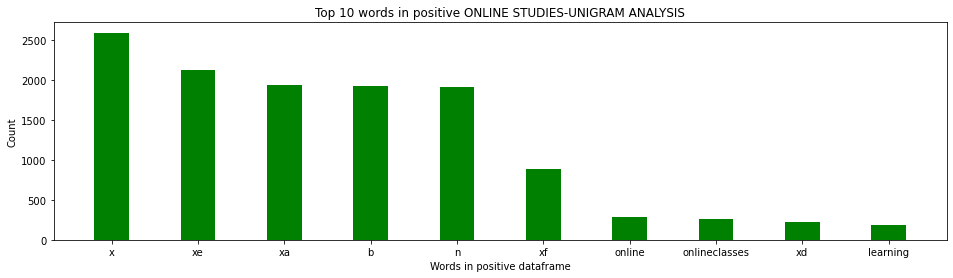

In [70]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive ONLINE STUDIES-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

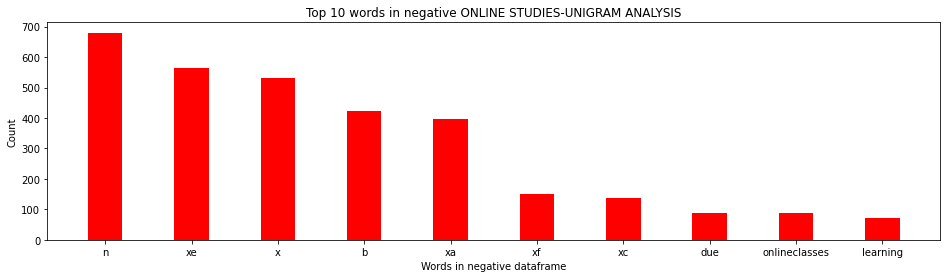

In [71]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative ONLINE STUDIES-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

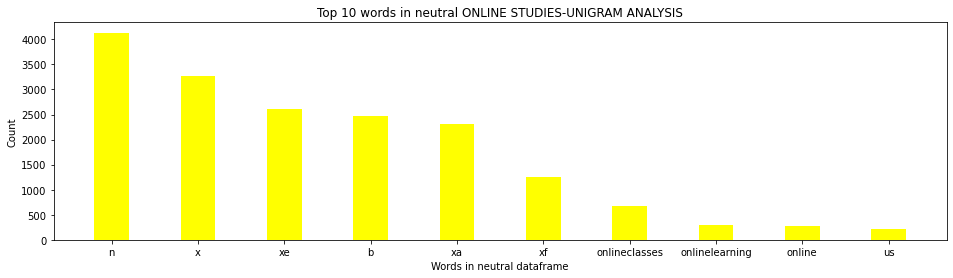

In [72]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral ONLINE STUDIES-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [73]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [74]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['b', 'available', 'n', 'research', 'papers', 'n', 'someone', 'write', 'essay', 'n', 'someonehelppaper', 'n', 'homework', 'n', 'casestudy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'top', 'grades', 'n', 'springsemester', 'n', 'homework', 'n', 'quiz', 'n', 'onlineclasses', 'n', 'essaydue', 'n', 'paywrite', 'n', 'paperpay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mentioned', 'parent', 'advocates', 'favorite', 'schoolchoice', 'schoolchoiceweek', 'parents', 'advocacy', 'parenting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'design', 'beautiful', 'animated', 'websites', 'incredibly', 'fast', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'web', 'dev

Sentence after removing stopwords: ['b', 'best', 'demand', 'career', 'paths', 'businessanalysts', 'know', 'visit', 'xe', 'x', 'x']
Sentence after removing stopwords: ['b', 'occasion', 'celebrate', 'indianness', 'team', 'justtutors', 'wishes', 'happy', 'rd', 'republicday', 'n', 'n', 'republicday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cma', 'aspirants', 'learn', 'best', 'professors', 'siddhii', 'nprofessionalss', 'enquire', 'register', 'contact', 'us', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wake', 'good', 'morning', 'baby', 'n', 'ni', 'wake', 'open', 'link', 'join', 'class', 'fast', 'n', 'n', 'goodnight', 'n', 'covid', 'n', 'onlineclasses']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'commitment', 'excellence', 'dedication', 'towards', 'succes

Sentence after removing stopwords: ['b', 'xf', 'xf', 'xd', 'xdexcited', 'share', 'rock', 'meaningful', 'realtime', 'professionaldevelopment', 'lcvirtualschool', 'mscbledsoe', 'xf', 'xf', 'xc', 'xf', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stayour', 'web', 'development', 'visualization', 'journey', 'learning', 'experts', 'top', 'quality', 'depth', 'tea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'microlearnun', 'new', 'normal', 'judith', 'bayliss', 'n', 'n', 'newnormal', 'microlearning', 'blendedlearning', 'remotelearning']
Sentence after removing stopwords: ['b', 'complete', 'homework', 'assignment', 'send', 'way', 'deadline', 'n', 'assignmenthelp', 'essaypay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'read', 'learn', 'ajentanews', 'assisted', 'dandgcollege', 'become', 'college', 'without', 'walls', 'great', 'project', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'highly', 'reliable', 'dm', 'need', 'urgent', 'help', 'n', 

Sentence after removing stopwords: ['b', 'virtual', 'education', 'highly', 'qualified', 'tutors', 'nlive', 'lectures', 'mock', 'tests', 'study', 'materials', 'n', 'nhere', 'multitut', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'leaving', 'cehl', 'maths', 'financial', 'maths', 'revision', 'questions', 'full', 'tutorial', 'video', 'hope', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'push', 'employees', 'learn', 'products', 'via', 'precise', 'training', 'program', 'learn', 'click', 'xe', 'x', 'xb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pre', 'budget', 'byte', 'minal', 'anand', 'ceo', 'amp', 'co', 'founder', 'guruq', 'n', 'dlmagazine', 'n', 'minalanand', 'n', 'nread', 'full', 'article', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learners', 'get', 'positive', 'career', 'growth', 'upgrad', 'quarterly', 'nps', 'results', 'business', 'standard', 'news', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'instagram', 'phot

Sentence after removing stopwords: ['b', 'ultimate', 'wordpress', 'quiz', 'beginners', 'advanced', 'users', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'assignments', 'bothering', 'nuse', 'professional', 'writing', 'service', 'n', 'technology', 'n', 'onlineclasses', 'n', 'calculus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'click', 'link', 'take', 'outschool', 'classes', 'free', 'sure', 'visit', 'link', 'twitter', 'bio', 'fun', 'popul', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'el', 'templo', 'del', 'cielo', 'es', 'el', 'mayor', 'templo', 'de', 'su', 'clase', 'en', 'toda', 'la', 'republica', 'popular', 'de', 'china', 'spn', 'temple', 'heaven', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happy', 'monday', 'friends', 'make', 'week', 'incredible', 'n', 'n', 'learningthroughplay', 'learnthroughplay', 'quoteoftheday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'otd', 'supreme', 'couruling', 'roe',

Sentence after removing stopwords: ['b', 'e', 'learning', 'lessons', 'low', 'challenges', 'adult', 'education', 'n', 'nread', 'article', 'xf', 'xf', 'x', 'x', 'n']
Sentence after removing stopwords: ['b', 'overwhelmed', 'many', 'assignments', 'probably', 'need', 'expehelp', 'n', 'essayhelp', 'n', 'literature', 'n', 'essaypay', 'n', 'psychology', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'excited', 'close', 'national', 'schoolchoicewk', 'episodes', 'parent', 'exchange', 'joseph', 'klein', 'col', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'free', 'demo', 'classes', 'book', 'one', 'right', 'child', 'n', 'n']
Sentence after removing stopwords: ['b', 'stalearning', 'little', 'every', 'day', 'unlock', 'potential', 'set', 'success', 'future', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'important', 'thing', 'succeed', 'business', 'consistency', 'n', 'nevenn', 'online', 'business', 'n', 'nmost', 'people', 'bother', 'e', 'xe', 'x', 'xa']
Sen

Sentence after removing stopwords: ['b', 'tips', 'successfully', 'implement', 'edtech', 'n', 'ensure', 'buy', 'n', 'identify', 'tools', 'product', 'options', 'n', 'shar', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'popular', 'slang', 'phrases', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'x', 'xb', 'kickstayour', 'weekend', 'xf', 'xf', 'xa', 'xad', 'xe', 'xd', 'xa', 'xef', 'xb', 'xf', 'xe', 'x', 'x', 'n', 'n', 'aemumbai', 'spanishlessons', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'hand', 'due', 'assignments', 'nwe', 'deliver', 'best', 'services', 'n', 'sociology', 'n', 'onlineclasses', 'n', 'calculus', 'n', 'physics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'samantuday', 'please', 'sir', 'open', 'immediately', 'fair', 'cases', 'still', 'around', 'tak', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'create', 'marketing', 'calendar', 'busy', 'entrepreneurs', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sen

Sentence after removing stopwords: ['b', 'remember', 'take', 'photos', 'safely', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'x', 'n', 'n', 'onestopshop', 'bumblebee', 'logistics', 'transportation', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thank', 'lindyhockenbary', 'great', 'session', 'onlinelearning', 'picking', 'name', 'book', 'drawing', 'loo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'launch', 'creative', 'career', 'skillshare', 'get', 'month', 'free', 'trial', 'link', 'learn', 'creativity', 'busine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'kid', 'get', 'distracted', 'studying', 'online', 'classes', 'n', 'n', 'xf', 'xf', 'x', 'xthen', 'stumble', 'upon', 'right', 'platfo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'live', 'video', 'marketing', 'mastery', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'writers', 'competent', 'reliable', 'n', 

Sentence after removing stopwords: ['b', 'xe', 'x', 'xca', 'high', 'speed', 'network', 'critical', 'students', 'engage', 'virtualreality', 'xe', 'x', 'xs', 'one', 'thing', 'website', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'helping', 'choose', 'best', 'courses', 'choice', 'mentors', 'elevate', 'skills', 'us', 'n', 'nvisit', 'website', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trivia', 'chambers', 'heart', 'n', 'ncomment', 'answer', 'xe', 'x', 'xa', 'let', 'us', 'see', 'right', 'n', 'n', 'trivia', 'puzzle', 'heart', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'design', 'beautiful', 'animated', 'websites', 'incredibly', 'fast', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'product', 'xf', 'xf', 'x', 'xd', 'amazon', 'fast', 'lane', 'fast', 'way', 'succeed', 'amazon', 'fba', 'xf', 'xf', 'x', 'xd', 'nby', 'myopenacademy', 'nshop', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', '

Sentence after removing stopwords: ['b', 'reach', 'goals', 'skillshare', 'get', 'month', 'free', 'trial', 'link', 'learn', 'creativity', 'businesses', 'techn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'educational', 'technology', 'get', 'teachers', 'enthusiastic', 'using', 'onlinelearning']
Sentence after removing stopwords: ['b', 'students', 'shift', 'away', 'old', 'lesson', 'textbook', 'style', 'thanks', 'digital', 'age', 'technology', 'allows', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learning', 'language', 'opens', 'doors', 'cultures', 'job', 'opportunities', 'communication', 'whole', 'especially', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'elanpaulson', 'teaching', 'learning', 'consultant', 'provides', 'advice', 'faculty', 'supporting', 'collaborative', 'group', 'writin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'agile', 'training', 'course', 'several', 'companies', 'trainers', 'select', 'choose', 'xe',

Sentence after removing stopwords: ['b', 'hire', 'best', 'experts', 'help', 'secure', 'xe', 'x', 'xs', 'fall', 'n', 'essays', 'n', 'economics', 'n', 'finance', 'n', 'accounting', 'n', 'exams', 'n', 'midterms', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'school', 'admission', 'free', 'admission', 'girls', 'nhurry', 'admission', 'open', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'write', 'good', 'email', 'technics', 'clever', 'communication', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kolhapur', 'schools', 'stasprucing', 'premises', 'primary', 'classes', 'nashik', 'news', 'times', 'india', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'thank', 'enough', 'fabulous', 'online', 'programs', 'offer', 'safe', 'access', 'everyone', 'matter', 'l', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'commonsense', 'best', 'tools', 'reviewed', 'educators', 'gt', 'gt', 'edtech

Sentence after removing stopwords: ['b', 'excellent', 'wednesdaywisdom', 'quote', 'swami', 'vivekananda', 'happy', 'wednesday', 'n', 'n', 'hua', 'onlineeducation', 'hindustudies', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'writers', 'competent', 'reliable', 'n', 'javascript', 'n', 'css', 'n', 'java', 'n', 'collegefootball', 'n', 'coursework', 'n', 'developer', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enjoy', 'organizing', 'delivering', 'documents', 'communicating', 'clients', 'take', 'pain', 'accounting', 'clerk', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'pte', 'pearson', 'test', 'english', 'academic', 'n', 'xf', 'xf', 'x', 'xa', 'register', 'free', 'demo', 'class', 'nfor', 'query', 'ncall', 'xe', 'x', 'xe', 'xef', 'xb', 'xf', 'nema', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learn', 'basics', 'using', 'jquery', 'javascript', 'library', 'built', 'make', 'easy', 'write', 'javascript',

Sentence after removing stopwords: ['b', 'face', 'problem', 'online', 'classes', 'n', 'ndon', 'worry', 'n', 'nwe', 'give', 'best', 'service', 'online', 'mode', 'without', 'faci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'precious', 'little', 'oceans', 'explored', 'currently', 'estimated', 'species', 'exi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'faculty', 'find', 'caught', 'middle', 'high', 'administrative', 'student', 'expectations', 'alamancecc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'establish', 'professional', 'reputation', 'membership', 'international', 'society', 'six', 'sigma', 'professionals', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'make', 'money', 'future', 'india', 'first', 'hybrid', 'lea

Sentence after removing stopwords: ['b', 'take', 'online', 'class', 'affordable', 'rates', 'secure', 'n', 'math', 'n', 'calculus', 'n', 'econometrics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'weekend', 'xf', 'xf', 'x', 'xb', 'big', 'shout', 'many', 'online', 'postgrad', 'industrylearners', 'ul', 'busy', 'working', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bt', 'unicorns', 'justify', 'high', 'valuations', 'businesstoday', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'dedicated', 'students', 'methods', 'results', 'make', 'program', 'best', 'one', 'cracking', 'competitive', 'examinations', 'n', 'ne', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'learn', 'new', 'skills', 'free', 'check', 'online', 'course', 'use', 'linkedin', 'learning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'beginning', 'midigiworld', 'subscribers', 'becoming', 'chessmasters', 'begins', 'taniasachdev', 'making'

Sentence after removing stopwords: ['b', 'introduction', 'tai', 'chi', 'n', 'nth', 'amp', 'th', 'amp', 'st', 'amp', 'nd', 'may', 'pm', 'pm', 'n', 'ncourse', 'delivered', 'live', 'online', 'via', 'z', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'parents', 'get', 'free', 'downloadable', 'online', 'learning', 'toolkit', 'set', 'kids', 'success', 'make', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'introducing', 'intriguing', 'free', 'courses', 'month', 'february', 'view', 'courses', 'please', 'visit', 'website', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'phil', 'murphy', 'new', 'jersey', 'needs', 'virtual', 'option', 'virtual', 'hybrid', 'sign', 'petition']
Sentence after removing stopwords: ['b', 'three', 'kids', 'still', 'face', 'face', 'school', 'covid', 'school', 'refuses', 'tell', 'us', 'many', 'cases', 'ther', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'e

Sentence after removing stopwords: ['b', 'one', 'great', 'benefits', 'instructional', 'design', 'makes', 'learning', 'efficient', 'optimizes', 'str', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enrol', 'onto', 'one', 'courses', 'supported', 'online', 'tutors', 'happy', 'help', 'throu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'digital', 'transformation', 'education', 'power', 'bridge', 'gaps', 'happy', 'international', 'day', 'education', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'join', 'skillshare', 'watch', 'class', 'file', 'formats', 'use', 'jpg', 'png', 'tiff', 'pdf', 'eps', 'svg', 'free', 'mont', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'irish', 'records', 'certificate', 'interested', 'researching', 'irish', '

Sentence after removing stopwords: ['b', 'schools', 'good', 'place', 'home', 'expe', 'vishal', 'indla', 'interview', 'indian', 'express', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'reviving', 'india', 'xe', 'x', 'xs', 'knowledge', 'systems', 'modern', 'indian', 'education', 'xc', 'xasociety', 'financial', 'express', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xm', 'almost', 'ok', 'onlinelearning', 'deal', 'daily', 'event', 'schooltraffic']
Sentence after removing stopwords: ['b', 'thankyou', 'uptechrepofor', 'featuring', 'doctornarine', 'amp', 'inspaceedu', 'interested', 'exploring', 'inspace', 'let', 'connect', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'available', 'onlineteaching', 'transformational', 'educator', 'dr', 'bruce', 'johnson', 'learn', 'xe', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'easy', 'online', 'course', 'ideas', 'sell', 'via', 'youtube', 'n', 'courses', 'elearning', 'feedback', 'ide

Sentence after removing stopwords: ['b', 'good', 'day', 'amsterdam', 'xc', 'xa', 'ntoday', 'twenty', 'seventh', 'th', 'day', 'january', 'nas', 'kids', 'national', 'geographic', 'showed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'best', 'rates', 'essays', 'onlineclasses', 'springsemester', 'amiraessays', 'dm', 'info', 'nthe', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'interested', 'virtual', 'learning', 'check', 'programs', 'offer', 'online', 'undergraduate', 'graduate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'assignments', 'reasonable', 'rates', 'nwe', 'guarantee', 'quality', 'work', 'original', 'content', 'n', 'logistics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xa', 'dulux', 'academy', 'live', 'update', 'xf', 'xf', 'xa', 'xa', 'n', 'nlive', 'workshops', 'week', 'cover', 'frequently', 'asked', 'questions', 'water', 'borne', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'any

Sentence after removing stopwords: ['b', 'byju', 'rolls', 'new', 'employee', 'policies', 'period', 'leave', 'child', 'care', 'leave', 'education', 'times', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'legit', 'writing', 'team', 'nguaranteed', 'excellent', 'grades', 'timely', 'delivery', 'n', 'environmentalstudies', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xm', 'excited', 'presenting', 'dlac', 'join', 'hear', 'school', 'leaders', 'researchers', 'cte', 'experts', 'talk', 'abou', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'python', 'course', 'basic', 'advanced', 'onlineclasses', 'onlinecourses', 'freeonlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tutor', 'help', 'topic', 'trouble', 'n', 'nread', 'f

Sentence after removing stopwords: ['b', 'digital', 'marketing', 'live', 'training', 'batch', 'starts', 'feb', 'hurry', 'limited', 'seats']
Sentence after removing stopwords: ['b', 'welcome', 'join', 'webinar', 'explore', 'fire', 'alarm', 'systems', 'solutions', 'technologies', 'xf', 'xf', 'x', 'x', 'nthe', 'link', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'competitor', 'analysis', 'masterclass', 'phenomenal', 'edition', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sure', 'gon', 'na', 'make', 'pm', 'kindly', 'dm', 'quality', 'suppois', 'guaranteed', 'n', 'essaydue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'reflect', 'amp', 'reset', 'make', 'new', 'year', 'resolutions', 'work', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'hand', 'due', 'assignments', 'nwe', 'deliver', 'best', 'services', 'n', 'mspowerpoint', 'n', 'proposals', 'n', 'msword', 'xe', 'x', 'xa

Sentence after removing stopwords: ['b', 'whole', 'remote', 'virtual', 'school', 'district', 'created', 'students', 'families', 'want', 'need', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'smafuture', 'university', 'retooling', 'post', 'pandemic', 'future', 'based', 'significantly', 'onlinelearning', 'xe', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'help', 'push', 'online', 'school', 'offers', 'elementary', 'courses', 'also', 'programs', 'helps', 'digital', 'skills', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'many', 'combinations', 'ways', 'deliver', 'learning', 'online', 'trying', 'compare', 'different', 'models', 'like', 'comparing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'education', 'brings', 'real', 'empowerment', 'nget', 'training', 'us', 'online', 'offline', 'mode', 'n', 'ndownload', 'mobile', 'app', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happy', 'republic', 'day', 'xf', 'xf', 'x', 'xae

Sentence after removing stopwords: ['b', 'c', 'v', 'honoured', 'first', 'bharat', 'ratna', 'government', 'india', 'n', 'n']
Sentence after removing stopwords: ['b', 'essential', 'advice', 'get', 'delivering', 'live', 'online', 'help', 'right', 'deal', 'transitio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcthere', 'elevator', 'success', 'take', 'stairs', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'zig', 'ziglar', 'n', 'n']
Sentence after removing stopwords: ['b', 'welcome', 'back', 'spri', 'n', 'canvas', 'n', 'pearson', 'n', 'aleks', 'n', 'blackboard', 'n', 'onlineclasses', 'n', 'exams', 'quiz', 'n', 'homework', 'n', 'essayhelp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'contact', 'us', 'get', 'school', 'connected', 'free', 'octotel', 'fibre', 

Sentence after removing stopwords: ['b', 'set', 'success', 'onlinelearning', 'oaklandu', 'xe', 'xc', 'x', 'xef', 'xb', 'xf', 'lists', 'need', 'staon', 'right', 'foo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'available', 'n', 'research', 'papers', 'n', 'someone', 'write', 'essay', 'n', 'someonehelppaper', 'n', 'homework', 'n', 'casestudy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'write', 'first', 'next', 'book', 'free', 'online', 'event', 'writers', 'via', 'losapala', 'writing', 'onlineclasses']
Sentence after removing stopwords: ['b', 'tutors', 'tutorgigs', 'teach', 'students', 'best', 'abilities', 'n', 'nbe', 'paof', 'growing', 'online', 'teaching', 'platform', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'digital', 'marketing', 'business', 'online', 'free', 'social', 'media', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'day', 'amsterdam', 'xc', 'xa', 'ntoday', 'twenty', 'eighth', 'th', 'day', 'jan

Sentence after removing stopwords: ['b', 'good', 'way', 'online', 'learning', 'via', 'edumorfosis', 'onlinelearning', 'elearning', 'education', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'school', 'prospectus', 'full', 'informative', 'content', 'help', 'pupils', 'amp', 'parents', 'make', 'informed', 'decision', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'demo', 'davanagere', 'science', 'club', 'quick', 'math', 'nnava', 'vision', 'providing', 'academics', 'amp', 'non', 'academics', 'classes', 'nfor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cat', 'live', 'updates', 'slot', 'exam', 'concludes', 'paper', 'analysis', 'percentile', 'calculator', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'getting', 'family', 'tutor', 'group', 'onboard', 'important', 'onlinelearning', 'extended', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'writers', 'competent', 'reliable', 'n', 'javascript', 'n', 'css', 'n', 'j

Sentence after removing stopwords: ['b', 'running', 'ads', 'complicated', 'good', 'content', 'end', 'goal', 'mind', 'get', 'results', 'without', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cat', 'many', 'mock', 'tests', 'good', 'enough', 'experts', 'say', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'live', 'invest', 'n', 'bitcoin', 'btc', 'education', 'blockchain', 'invest', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indian', 'startups', 'raise', 'billion', 'quarter', 'first', 'time', 'reposays', 'news', 'et', 'cio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'upskilling', 'crucial', 'amp', 'accessible', 'nlearn', 'industry', 'experts', 'n', 'get', 'placement', 'suppo', 'x', 'support', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'easy', 'n', 'onlineclass', 'onlineclasses', 'onlinelearning', 'spring', 'collegefootball', 'collegebasketball', 'collegelife', 'xe', 'x', 'xa']
Sentence after removin

Sentence after removing stopwords: ['b', 'visit', 'website', 'follow', 'easy', 'steps', 'get', 'admitted', 'jt', 'aviation', 'college', 'xe', 'xc', 'x', 'xf', 'xf', 'xe', 'x', 'xf', 'xf', 'xc', 'xf', 'xf', 'xf', 'x', 'xa', 'xe', 'x', 'xd', 'xf', 'xf', 'xe', 'x', 'n', 'xe', 'xc', 'x', 'log', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'based', 'information', 'moe', 'website', 'n', 'nread', 'countries', 'provide', 'free', 'textbooks', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'customer', 'satisfaction', 'ultimate', 'priority', 'nguaranteed', 'excellent', 'grades', 'timely', 'delivery', 'n', 'algebra', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'assured', 'assignment', 'nwe', 'deliver', 'best', 'services', 'n', 'chemistry', 'n', 'onlineclasses', 'n', 'sociology', 'n', 'psychology', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mrsschwanekamp', 'flipgrid', 'flipgrid', 'definitely', 'one', 'best', 'apps', 'kind', 'learnig', 'pr

Sentence after removing stopwords: ['b', 'mexico', 'area', 'km', 'xc', 'xb', 'makes', 'fourteenth', 'large', 'country', 'world', 'third', 'larges', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'iim', 'bangalore', 'witnesses', 'record', 'summer', 'placement', 'season', 'economic', 'times', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'beautiful', 'thing', 'learning', 'nobody', 'take', 'away', 'choose', 'bruzoo', 'n', 'n', 'n', 'n', 'bruzoo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', 'xad', 'signing', 'go', 'ahead', 'guess', 'might', 'surprised', 'much', 'understand', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'x', 'tomorrow', 'po', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'partnered', 'googleuk', 'offer', 'free', 'flexible', 'onlinelearning', 'jobseekers', 'uk', 'n', 'ngoogle', 'career', 'ce', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'right', 'preparation', 'dr

Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'writers', 'competent', 'reliable', 'n', 'javascript', 'n', 'css', 'n', 'java', 'n', 'collegefootball', 'n', 'coursework', 'n', 'developer', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pandemic', 'gloom', 'subsides', 'fresh', 'campus', 'graduates', 'demand', 'business', 'news', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'adobe', 'live', 'basics', 'onlineclasses', 'onlinecourses', 'freeonlinecourses', 'onlinetutorials']
Sentence after removing stopwords: ['b', 'masterclass', 'excellency', 'top', 'focus', 'n', 'assignment', 'due', 'n', 'biology', 'npsychology', 'n', 'onlineclasses', 'nresearch', 'paper', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'online', 'master', 'screenwrit

Sentence after removing stopwords: ['b', 'talking', 'someone', 'knowing', 'suppois', 'important', 'n', 'n', 'bellletstalk', 'n', 'n']
Sentence after removing stopwords: ['b', 'online', 'bba', 'programme', 'offered', 'manav', 'rachna', 'centre', 'distance', 'online', 'education', 'produces', 'competent', 'profession', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'egyptian', 'arabic', 'absolute', 'beginner', 'workshop', 'egyptology', 'egyptian', 'arabic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'way', 'learning', 'n', 'nread', 'full', 'article', 'online', 'education', 'good', 'way', 'learning', 'n', 'xe', 'x', 'xb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'hire', 'expeto', 'help', 'secure', 'quality', 'grades', 'thesis', 'coursework', 'onlineclasses', 'daysofcode', 'ai', 'uk', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enrolment', 'deadline', 'fast', 'approaching', 'enrolled', 'cornell', 'epm', 'yet', 'n', 'xe

Sentence after removing stopwords: ['b', 'look', 'legit', 'affordable', 'writers', 'nguaranteed', 'excellent', 'grades', 'timely', 'delivery', 'n', 'logistics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learners', 'get', 'positive', 'career', 'growth', 'upgrad', 'quarterly', 'nps', 'results', 'business', 'standard', 'news', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'product', 'xf', 'xf', 'x', 'xd', 'free', 'course', 'fundamentals', 'activity', 'based', 'sales', 'xf', 'xf', 'x', 'xd', 'nby', 'myopenacademy', 'nshop', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'post', 'brief', 'summary', 'education', 'system', 'philippines', 'appeared', 'first', 'cudy', 'technologies', 'blog', 'n', 'nread', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cool', 'webex', 'education', 'connector', 'blackboard', 'making', 'easy', 'turn', 'device', 'virtual', 'cl', 'xe', 'x', 'xa']
Sentence after r

Sentence after removing stopwords: ['b', 'enrol', 'onto', 'free', 'essential', 'work', 'skills', 'course', 'tips', 'team', 'leading', 'n']
Sentence after removing stopwords: ['b', 'let', 'us', 'handle', 'academic', 'work', 'affordable', 'rates', 'hit', 'top', 'quality', 'work', 'n', 'n', 'essays', 'essaywriting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'byju', 'jobs', 'byju', 'rolls', 'additions', 'employee', 'leave', 'policy', 'economic', 'times', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'educate', 'kids', 'save', 'child', 'xc', 'xalabour', 'penury', 'new', 'indian', 'express', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'golden', 'age', 'teachers', 'coming', 'back', 'says', 'byju', 'raveendran', 'techsparks', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'get', 'ready', 'ielts', 'fantastic', 'understanding', 'ielts', 'onlinecourses', 'click', 'stayour', 'free', 'da

Sentence after removing stopwords: ['b', 'schoolchoiceweek', 'great', 'time', 'remember', 'onlinelearning', 'personalized', 'rigorous', 'successful', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'best', 'online', 'courses', 'elearning', 'mooc', 'onlinecourse', 'onlinelearning', 'moocs', 'onlinecourses']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xac', 'expand', 'genetics', 'knowledge', 'new', 'online', 'microlessons', 'upgraded', 'minicourses', 'whether', 'fe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'initiate', 'opportunities', 'always', 'challenge', 'learn', 'something', 'new', 'learn', 'coding', 'literacy', 'bo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'complete', 'unreal', 'engine', 'megacourse', 'beginner', 'expe', 'udemy', 'udemycourse', 'udemyfree', 'udemycoupon', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'excellent', 'grades', 'guaranteed', 'affordable', 'prices', 'pay', 'n', 'stat

Sentence after removing stopwords: ['b', 'starting', 'year', 'strong', 'n', 'nwe', 'released', 'new', 'online', 'learning', 'platform', 'focused', 'heavily', 'improving', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'come', 'learn', 'fundamentals', 'computer', 'programming', 'popular', 'language', 'python', 'free', 'virtual', 'class', 'si', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'best', 'rates', 'essays', 'onlineclasses', 'springsemester', 'keairaessays', 'dm', 'info', 'nthe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'great', 'resource', 'learning', 'using', 'microsoft', 'teams', 'education']
Sentence after removing stopwords: ['b', 'great', 'new', 'update', 'teams', 'numbers', 'order', 'xe', 'x', 'xchands', 'xe', 'x', 'xd', 'assist', 'moderator', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'assignments', 'nguaranteed', 'excellent', 'grades', 'timely', 'delivery', 'n', 'math

Sentence after removing stopwords: ['b', 'tips', 'help', 'child', 'focus', 'schoolwork', 'create', 'daily', 'schedule', 'n', 'nread', 'full', 'article', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'episode', 'managingaround', 'critical', 'teaching', 'learning', 'situations', 'highereducation', 'developme', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'increase', 'sales', 'top', 'practical', 'selling', 'technique', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cbse', 'board', 'exam', 'date', 'sheet', 'live', 'term', 'time', 'table', 'class', 'th', 'cbse', 'news', 'cbse', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'attending', 'fetc', 'miss', 'happy', 'hour', 'hang', 'netsync', 'awscloud', 'january', 'th', 'pm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'congratulations', 'nia', 'success', 'n', 'n', 'n', 'n', 'n', 'motivation', 'goals', 'inspiration', 'life', 'progress', 'hardw

Sentence after removing stopwords: ['b', 'free', 'balloon', 'ride', 'image', 'lesson', 'get', 'free', 'sample', 'lesson', 'esl', 'efl', 'elt', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'starting', 'chinese', 'new', 'year', 'lovely', 'treats', 'n', 'n', 'cny', 'kids', 'onlineclass', 'bahasamalaysia', 'phonics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'supporting', 'struggling', 'readers', 'education', 'week', 'via', 'googlenews', 'prek', 'edtechchat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'favorite', 'class', 'subject', 'taught', 'tsa', 'n', 'ntell', 'us', 'answers', 'comments', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'matter', 'nno', 'matter', 'nno', 'matter', 'nit', 'mindset', 'leads', 'successful', 'n', 'n', 'n', 'n', 'nykaa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'self', 'esteem', 'ever', 'gets', 'high', 'go', 'watch', 'recorded', 'lectures', 'xf', 'xf', 'xa', 'xa', 'mot

Sentence after removing stopwords: ['b', 'design', 'best', 'class', 'business', 'business', 'mooc', 'elearning', 'onlinecourses', 'onlinelearning', 'moocs']
Sentence after removing stopwords: ['b', 'twelve', 'weeks', 'new', 'career', 'paralegal', 'studies', 'certificate', 'program', 'feb', 'may', 'develop', 'skills', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'xef', 'xb', 'xf', 'xe', 'x', 'xci', 'attempting', 'position', 'one', 'effective', 'humanitarian', 'actors', 'xe', 'x', 'xd', 'n', 'nhave', 'set', 'myh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stand', 'crowd', 'earn', 'world', 'class', 'qualification', 'prince', 'xc', 'xae', 'open', 'doors', 'successful', 'car', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b'

Sentence after removing stopwords: ['b', 'dm', 'help', 'assignments', 'nuse', 'professional', 'writing', 'service', 'n', 'msword', 'n', 'onlineclasses', 'n', 'business', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'first', 'need', 'know', 'conduct', 'first', 'lesson', 'n', 'nread', 'full', 'article', 'prepare', 'first', 'less', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'bachelor', 'xe', 'x', 'xs', 'master', 'xe', 'x', 'xs', 'degrees', 'best', 'colleges', 'e', 'learning', 'platform', 'edufex', 'study', 'material', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'high', 'quality', 'timely', 'work', 'n', 'springclasses', 'n', 'summerclasses', 'n', 'daysofcode', 'n', 'excel', 'n', 'project', 'n', 'math', 'n', 'essay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'huge', 'congratulations', 'microsoft', 'education', 'unicef', 'teams', 'user', 'growth', 'since', 'june', 'dedication', 'xe', 'x', 'xa']
Sentence after removing st

In [75]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['b', 'teachmintapp', 'hey', 'xe', 'x', 'xre', 'unable', 'xe', 'x', 'xedit', 'xe', 'x', 'x', 'digital', 'pamphlets', 'getting', 'highlight', 'xe', 'x', 'xsomething', 'went', 'wrong', 'xe', 'x', 'x', 'cl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'npaywrite', 'n', 'homeworkslave', 'n', 'xe', 'xc', 'xcalculus', 'n', 'essaydue', 'n', 'xe', 'xc', 'xmath', 'n', 'onlineclasses', 'n', 'xe', 'xc', 'xessay', 'due', 'n', 'xe', 'xc', 'xpaper', 'pay', 'n', 'xe', 'xc', 'xfinance', 'n', 'xe', 'xc', 'xeconomic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'number', 'public', 'schools', 'recorded', 'disruptions', 'temporary', 'closures', 'pivots', 'back', 'remote', 'learni', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kangaroo', 'crew', 'alphabet', 'matching', 'game', 'nonline', 'learning', 'n']
Sentence after removing stopwords: ['b', 'akshay', 'kumar', 'collective', 'artists', 'backed', 'socialswagworld', 

Sentence after removing stopwords: ['b', 'learn', 'understand', 'improve', 'children', 'xe', 'x', 'xs', 'mental', 'health', 'wellbeing', 'join', 'xc', 'xaflexible', 'xc', 'xaonline', 'developmental', 'psyc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hit', 'dm', 'n', 'pay', 'someone', 'nphysics', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmaths', 'n', 'essaydue', 'nchem', 'n', 'assignments', 'n', 'assignment', 'due', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'go', 'give', 'n', 'give', 'n', 'na', 'poor', 'mentality', 'attracts', 'lack', 'would', 'mind', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'english', 'grammar', 'bundle', 'ncheck', 'ever', 'need', 'long', 'schools', 'stay', 'open', 'xf', 'xf', 'x', 'xb', 'pdf', 'powe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'handle', 'n', 'pay', 'someone', 'nphysics', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmaths', 'n', 'essaydue', 'nchem', 'n', 'assignments', 'n', 'as

Sentence after removing stopwords: ['b', 'meet', 'year', 'old', 'k', 'vidya', 'travels', 'kilometres', 'everyday', 'attend', 'onlineclasses', 'network', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'children', 'behaviors', 'bad', 'remote', 'learning', 'compared', 'learning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kangaroo', 'crew', 'alphabet', 'matching', 'game', 'nonline', 'learning', 'n']
Sentence after removing stopwords: ['b', 'hit', 'dm', 'n', 'pay', 'someone', 'nphysics', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmaths', 'n', 'essaydue', 'nchem', 'n', 'assignments', 'n', 'assignment', 'due', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xm', 'help', 'drop', 'xe', 'xd', 'xa', 'xef', 'xb', 'xf', 'comments', 'school', 'transitioning', 'back', 'remote', 'learning', 'drop', 'xf', 'xf', 'x', 'xbb', 'yo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'grade', 'teacher', 'learningwithkl', 'shares', 'learned', 're

Sentence after removing stopwords: ['b', 'outrageous', 'especially', 'targeted', 'minorities', 'xe', 'x', 'xm', 'sure', 'xe', 'x', 'xt', 'target', 'families', 'upper', 'manhattan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'npaywrite', 'n', 'homeworkslave', 'n', 'xe', 'xc', 'xcalculus', 'n', 'essaydue', 'n', 'xe', 'xc', 'xmath', 'n', 'onlineclasses', 'n', 'xe', 'xc', 'xessay', 'due', 'n', 'xe', 'xc', 'xpaper', 'pay', 'n', 'xe', 'xc', 'xfinance', 'n', 'xe', 'xc', 'xeconomic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'compliance', 'edtech', 'xe', 'x', 'xcare', 'torn', 'conventional', 'technological', 'approaches', 'xe', 'x', 'xd', 'n', 'n']
Sentence after removing stopwords: ['b', 'check', 'late', 'e', 'learning', 'news', 'resources', 'updated', 'daily', 'elearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trouble', 'accessing', 'classes', 'zoom', 'links', 'working', 'help', 'xe', 'x', 'xa']
Sentence after removing stopwor

Sentence after removing stopwords: ['b', 'flicc', 'categories', 'intentional', 'nmisinformation', 'n', 'fake', 'experts', 'n', 'logical', 'fallacies', 'n', 'impossible', 'expectations', 'n', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ace', 'career', 'power', 'artificial', 'intelligence', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'improve', 'n', 'payonlineclass', 'n', 'payresearchpaper', 'n', 'essaypay', 'n', 'pay', 'n', 'essay', 'due', 'n', 'onlineclasses', 'n', 'coursework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vocabulary', 'builder', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xe', 'xc', 'xwhim', 'xf', 'xf', 'x', 'xa', 'sudden', 'desire', 'idea', 'whims', 'rock', 'stars', 'hard', 'satisfy', 'n', 'n', 'xe', 'xc', 'xdeter', 'xf', 'xf', 'x', 'xto', 'pr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xre', 'aspiring', 'newly', 'appointed', 'manager', 'read', 'late', 'blog', 'f

Sentence after removing stopwords: ['b', 'heard', 'new', 'webinar', 'series', 'late', 'register', 'join', 'get', 'details', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remote', 'school', 'meltdowns', 'research', 'gives', 'window', 'student', 'well', 'pandemic']
Sentence after removing stopwords: ['b', 'check', 'late', 'e', 'learning', 'news', 'resources', 'updated', 'daily', 'elearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'npaywrite', 'n', 'homeworkslave', 'n', 'xe', 'xc', 'xcalculus', 'n', 'essaydue', 'n', 'xe', 'xc', 'xmath', 'n', 'onlineclasses', 'n', 'xe', 'xc', 'xessay', 'due', 'n', 'xe', 'xc', 'xpaper', 'pay', 'n', 'xe', 'xc', 'xfinance', 'n', 'xe', 'xc', 'xeconomic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'topcast', 'ep', 'underscoring', 'dr', 'shawna', 'dark', 'point', 'importance', 'faculty', 'perspective', 'academic', 'technol', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'honor', 'conversati

Sentence after removing stopwords: ['b', 'kangaroo', 'crew', 'alphabet', 'matching', 'game', 'nonline', 'learning', 'n']
Sentence after removing stopwords: ['b', 'get', 'courses', 'throughout', 'january', 'code', 'necjanuary', 'checkout', 'choose', 'wide', 'range', 'le', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'essays', 'due', 'tonight', 'dm', 'us', 'help', 'n', 'essayhelp', 'nenglish', 'nmath', 'nessay', 'due', 'nhistory', 'nassignments', 'nnu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'onlineclasses', 'sucks', 'xf', 'xf', 'xa', 'xb', 'n', 'onlinelearning', 'nteacher', 'using', 'youtube', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xa', 'xa']
Sentence after removing stopwords: ['b', 'incuspaze', 'plans', 'expand', 'across', 'small', 'cities', 'economic', 'times', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'today', 'celebrationoflifeday', 'grateful', 'every', 'breath', 'take', 'appr

Sentence after removing stopwords: ['b', 'late', 'episode', 'wiwtk', 'kevin', 'speaks', 'schoolchoice', 'pioneer', 'howardlfuller', 'discuss', 'past', 'presen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'online', 'help', 'homework', 'exams', 'due', 'n', 'biology', 'n', 'essay', 'pay', 'n', 'maths', 'exam', 'n', 'stats', 'nfinals', 'n', 'essay', 'due', 'n', 'chemistry', 'ex', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remote', 'learning', 'n', 'n', 'n', 'onlinelearning', 'education', 'elearning', 'learning', 'onlineclasses', 'distancelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'boost', 'xf', 'xf', 'xa', 'x', 'online', 'biz', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'xf', 'xbb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'secret', 'hacks', 'xf', 'xf', 'x', 'xb', 'money', 'grub', 'onlinemarketing', 'onlineclass', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'son', 'finished', 'science', 'test

Sentence after removing stopwords: ['b', 'xe', 'x', 'xve', 'put', 'together', 'tips', 'improving', 'connection', 'trainer', 'amp', 'learner', 'check', 'late', 'blog', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xef', 'xb', 'xfcan', 'believe', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'nhtml', 'game', 'scratch', 'step', 'step', 'learning', 'javascript', 'myopenacademy', 'n', 'xf', 'xf', 'x', 'x', 'shop', 'range', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trivia', 'time', 'true', 'false', 'octopuses', 'three', 'hearts', 'nine', 'brains', 'blue', 'blood', 'n', 'nto', 'discover', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'forth', 'series', 'small', 'end', 'table', 'build', 'practice', 'joinery', 'requirement', 'levels', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'feels', 'sad', 'even', 'request', 'kids', 'maintain', 'social', 'distance', 'wear', 'masks', 'go', 'online', 'schooling', 'ha', 'xe', 'x', 'xa']
Sentence

In [76]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['b', 'conversion', 'optimization', 'mastery', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'whatsapp', 'ndm', 'willard', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue', 'essays', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'well', 'xe', 'x', 'xa', 'day', 'resume', 'back', 'zoom', 'classes', 'xf', 'xf', 'x', 'xc', 'n', 'nwhy', 'feel', 'like', 'reliving', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'struggling', 'assignment', 'nfor', 'quality', 'results', 'dm', 'us', 'today', 'n', 'geography', 'n', 'codingprojects', 'n', 'java', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'understanding', 'gamification', 'help', 'improve', 'online', 'learning', 'n', 'n', 'onlinelearning', 'elearning', 'edtech', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'choose', 'name', 'online', 'course', 'sells

Sentence after removing stopwords: ['b', 'visit', 'help', 'assignments', 'n', 'n', 'university', 'fyp', 'viral', 'schoolreopen', 'school', 'uni', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'money', 'grub', 'n', 'training', 'product', 'show', 'staearning', 'money', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learn', 'steps', 'make', 'money', 'online', 'affiliate', 'marketing', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learn', 'draw', 'foundational', 'techniques', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'believe', 'customer', 'centric', 'service', 'quality', 'work', 'grades', 'n', 'research', 'paper', 'n', 'nursing', 'n', 'canvas', 'n', 'statistics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'university', 'exam', 'online', 'would', 'effect', 'malpractice', 'n', 'n', 'onlineexam', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopw

Sentence after removing stopwords: ['b', 'virtual', 'classes', 'return', 'heading', 'towards', 'another', 'year', 'promotion', 'siasat', 'career', 'guidance', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'digishock', 'learn', 'machine', 'learning', 'coding', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'assignment', 'n', 'biochem', 'n', 'essaypay', 'n', 'essaydue', 'n', 'assignmenthelp', 'n', 'paysomeone', 'n', 'essayhelp', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'believe', 'customer', 'centric', 'service', 'quality', 'work', 'grades', 'n', 'research', 'paper', 'n', 'nursing', 'n', 'canvas', 'n', 'statistics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maths', 'mandakini', 'mam', 'skviv', 'n', 'onlinelearning', 'n', 'tlm', 'n', 'mathematician', 'n', 'direducation', 'n', 'delhigvtteacher', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'someo

Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xef', 'xb', 'xfcan', 'believe', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'npure', 'php', 'elearning', 'bundle', 'myopenacademy', 'n', 'xf', 'xf', 'x', 'x', 'shop', 'range', 'xe', 'xf', 'xa', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hi', 'need', 'help', 'homework', 'assignments', 'dm', 'instructions', 'guaranteed', 'grade', 'n', 'essays', 'n', 'essayhelp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'product', 'xf', 'xf', 'x', 'xd', 'twitter', 'marketing', 'beginner', 'twitter', 'blueprint', 'xf', 'xf', 'x', 'xd', 'nby', 'myopenacademy', 'nshop', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'willard', 'nwhatsapp', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue', 'essays', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'aws', 'identity', 'access', 'management', 'iam', 'foundat

Sentence after removing stopwords: ['b', 'contribution', 'n', 'musicoftheworld', 'learntoplayguitar', 'ukulele', 'onlinelearning', 'elearning', 'worldmusicians', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xef', 'xb', 'xfcan', 'believe', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'ndomain', 'marketing', 'beginner', 'domain', 'flipping', 'blueprint', 'myopenacademy', 'n', 'xf', 'xf', 'x', 'x', 'shop', 'range', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hmu', 'need', 'help', 'n', 'onlineclasses', 'n', 'literature', 'n', 'nursing', 'n', 'biology', 'n', 'chemistry', 'n', 'law', 'n', 'homework', 'n', 'essay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'offer', 'legit', 'amp', 'quality', 'academic', 'solutions', 'nkindly', 'dm', 'place', 'order', 'n', 'essaypay', 'n', 'econometrics', 'n', 'javascript', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'essay', 'prodigy', 'quality', 'essays', 'hmu', 'n', 'essay', 'n', 'essa

Sentence after removing stopwords: ['b', 'edumaticaio', 'may', 'suspended', 'emergency', 'n', 'n', 'edumaticaio', 'n', 'giveaway', 'competition', 'republicday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'essays', 'assignments', 'handled', 'experts', 'npay', 'us', 'n', 'physics', 'n', 'english', 'n', 'essaypay', 'n', 'maths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'currently', 'platform', 'host', 'online', 'courses', 'works', 'isolation', 'integrate', 'services', 'di', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cbse', 'staregistration', 'students', 'classes', 'dec', 'details', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'assignment', 'n', 'onlineclasses', 'nessays', 'n', 'researchpapers', 'ncommunication', 'n', 'javascript', 'nenglish', 'n', 'business', 'n', 'python', 'nsociology', 'nv', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ultimate', 'introduction', 'adobe', 'photoshop', 'c

Sentence after removing stopwords: ['b', 'continuing', 'stages', 'addie', 'model', 'instructional', 'design', 'post', 'share', 'last', 'three', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'peter', 'burrell', 'associate', 'professor', 'uni', 'cincinnati', 'business', 'attorney', 'faced', 'two', 'fold', 'dilem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'exploring', 'future', 'education', 'expo', 'dubai', 'n', 'n', 'expodubai', 'hertfordcollege', 'uniofoxford', 'n', 'n', 'brewit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'assignment', 'n', 'biochem', 'n', 'essaypay', 'n', 'essaydue', 'n', 'assignmenthelp', 'n', 'paysomeone', 'n', 'essayhelp', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jump', 'applicants', 'engineering', 'seats', 'maharashtra', 'year', 'mumbai', 'news', 'times', 'india', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hi', 'need', 'help', 'homework', 'assignments', '

Sentence after removing stopwords: ['b', 'geography', 'amp', 'environmental', 'science', 'sustainability', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'help', 'n', 'essaypay', 'n', 'onlineclasses', 'n', 'coursework', 'n', 'project', 'n', 'essaydue', 'n', 'paywrite', 'n', 'english', 'n', 'paperpay', 'n', 'essay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'companies', 'pays', 'period', 'leaves', 'employees', 'hindi', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'spine', 'flexibility', 'course', 'backbends', 'level', 'iv', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'corp', 'finance', 'financing', 'commons', 'stock', 'amp', 'preferred', 'stock', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'virtual', 'teaching', 'stay', 'educators', 'must', 'take', 'control', 'engage', 'students', 'enable', '

Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'halal', 'butch', 'neighborhood', 'food', 'restaurants', 'english', 'esl', 'efl', 'ingl', 'xc', 'xas', 'xec', 'x', 'x', 'xec', 'x', 'xb', 'xd', 'xb', 'xd', 'xbd', 'xd', 'xb', 'xd', 'xbb', 'xd', 'xb', 'xd', 'xb', 'xd', 'x', 'xd', 'xba', 'xd', 'xb', 'xd', 'xb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'essay', 'nexcel', 'n', 'math', 'n', 'onlineclasses', 'n', 'technology', 'n', 'economics', 'n', 'computerscience', 'n', 'mathhelp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'instagram', 'masterclass', 'instagram', 'marketing', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'back', 'xe', 'x', 'xt', 'want', 'miss', 'ever', 'strengthening', 'emotional', 'intelligence', 'critical', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lms', 'powerhouse', 'knowledge', 'organizations', 'features', 'n', 'n', 'n', 'lms', 'elearning', 'xe', 'x', 

Sentence after removing stopwords: ['b', 'ultimate', 'text', 'video', 'creation', 'course', 'edition', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'improve', 'gpa', 'summer', 'n', 'history', 'n', 'pay', 'someone', 'nphysics', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmaths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learn', 'use', 'following', 'strategy', 'academic', 'preparedness', 'onlineteaching', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whether', 'xe', 'x', 'xre', 'teaching', 'online', 'courses', 'classroom', 'need', 'well', 'written', 'diversity', 'inclusion', 'stateme', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'corporate', 'finance', 'dividend', 'policy', 'onlineclasses', 'onlinecourses', 'freeonlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'assignment', 'n', 'biochem', 'n', 'essaypay', 'n', 'essaydue', 'n', 'assignment

Sentence after removing stopwords: ['b', 'online', 'education', 'india', 'remained', 'xe', 'x', 'xcwoefully', 'inadequate', 'xe', 'x', 'xd', 'across', 'country', 'children', 'without', 'dev', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'national', 'schoice', 'choice', 'week', 'education', 'xe', 'x', 'xt', 'sacrifice', 'flexibility', 'academic', 'rigor', 'sevenstar', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learn', 'ways', 'make', 'money', 'online', 'without', 'even', 'website', 'podcast', 'episode', 'n', 'n', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'writer', 'help', 'papers', 'dm', 'us', 'help', 'n', 'pay', 'someone', 'n', 'physics', 'n', 'essayhelp', 'n', 'english', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'dataprotectionday', 'dataprivacy', 'takeaways', 'years', 'remotelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hmu', 'help', 'coursework'

Sentence after removing stopwords: ['b', 'february', 'bring', 'immunotherapy', 'education', 'oncopharm', 'sitcancer', 'nthis', 'webinar', 'feb', 'pm', 'p', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bestseller', 'onlineeducation', 'teachingampacademics', 'udemy', 'course', 'creation', 'passive', 'income', 'unofficial', 'u', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'themoderncampus', 'podcast', 'featuring', 'wcet', 'friend', 'karenlpedersen', 'discusses', 'collaboration', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'child', 'struggling', 'retain', 'concepts', 'school', 'find', 'happening', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'students', 'presently', 'class', 'v', 'vi', 'vii', 'viii', 'ix', 'x', 'amp', 'xi', 'ntest', 'date', 'th', 'th', 'th', 'th', 'th', 'th', 'th', 'amp', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'virtual', 'teaching', 'stay', 'educators', 'must', 'take', 'control', 

Sentence after removing stopwords: ['b', 'fintech', 'solutions', 'solving', 'issues', 'democratize', 'education', 'india', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'online', 'activities', 'kids', 'smecstudio', 'mdbb', 'trending', 'business', 'travel', 'entertainment', 'gaming', 'home', 'family', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cbse', 'th', 'board', 'exams', 'private', 'candidates', 'submit', 'exam', 'forms', 'dec', 'details', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'canadian', 'college', 'offering', 'online', 'affordable', 'certificates', 'diplomas', 'visit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'james', 'clay', 'jisc', 'online', 'learning', 'online', 'learning', 'jisc', 'online', 'learn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uib', 'launching', 'massive', 'open', 'online', 'courses', 'systemdynamics', 'sustainability', 'february', 'xe', 'x', 'xa']
Sentence after 

Sentence after removing stopwords: ['b', 'learn', 'onlineeducation', 'evolving', 'benefit', 'edtech', 'china', 'us', 'edtech', 'thought', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'help', 'homework', 'nexcel', 'n', 'statistics', 'n', 'onlineclasses', 'n', 'sociology', 'n', 'psychology', 'n', 'geography', 'n', 'mathhelp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'certify', 'accredit', 'online', 'course', 'knowing', 'difference', 'via', 'youtube', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'handle', 'n', 'midterm', 'n', 'essaypay', 'n', 'onlineclasses', 'n', 'courseworks', 'n', 'projectdue', 'n', 'essaydue', 'n', 'paywrite', 'n', 'homeworkslave', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'author', 'leading', 'leadingroots', 'nature', 'inspired', 'leadership', 'lessons', 'today', 'xe', 'x', 'xs', 'world', 'dr', 'kathleen', 'allen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'interest', 'dm', 

Sentence after removing stopwords: ['b', 'recognise', 'importance', 'giving', 'knowledge', 'need', 'whilst', 'also', 'teaching', 'apply', 'everyd', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'papas', 'estilo', 'china', 'otra', 'manera', 'de', 'preparar', 'papas', 'fritas', 'con', 'un', 'toque', 'de', 'chile', 'vinagre', 'spn', 'chinese', 'style', 'potat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'adobe', 'photoshop', 'mobile', 'presets', 'basics', 'onlineclasses', 'onlinecourses', 'freeonlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'email', 'help', 'n', 'n', 'assignments', 'nresearch', 'papers', 'n', 'essaydue', 'npaper', 'pay', 'nliterature', 'narticles', 'n', 'onlineclasses', 'ndisse', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'money', 'grub', 'n', 'training', 'product', 'show', 'staearning', 'money', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'techsparks', 'india', 'xe', 'x', 'xs', 'edtec

Sentence after removing stopwords: ['b', 'check', 'product', 'xf', 'xf', 'x', 'xd', 'machine', 'learning', 'classification', 'algorithms', 'using', 'matlab', 'xf', 'xf', 'x', 'xd', 'nby', 'myopenacademy', 'nshop', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'online', 'tutor', 'wordpress', 'theme', 'teach', 'classes', 'elearning', 'education', 'coaching', 'n', 'onlinetutor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'offer', 'legit', 'amp', 'quality', 'academic', 'solutions', 'nkindly', 'dm', 'place', 'order', 'n', 'essaypay', 'n', 'econometrics', 'n', 'javascript', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'feeling', 'solo', 'piano', 'n', 'weekly', 'music', 'n', 'nsheet', 'music', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'onlineclasses', 'n', 'offline']
Sentence after removing stopwords: ['b', 'yukari', 'iguchi', 'academic', 'lead', 'hospitality', 'leisure', 'derbyunionlin

Sentence after removing stopwords: ['b', 'student', 'works', 'works', 'done', 'students', 'level', 'basic', 'program', 'aging', 'years', 'n', 'n', 'art', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'corinthians', 'life', 'changing', 'lessons', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'composing', 'gesture', 'xe', 'x', 'x', 'dance', 'improvisation', 'intensive', 'gesture', 'posture', 'fa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'carol', 'finished', 'floristry', 'training', 'kaysflowerschool', 'fridayfeeling', 'onlinelearning']
Sentence after removing stopwords: ['b', 'ultimate', 'forex', 'trading', 'beginners', 'guide', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'power', 'quora', 'z', 'earning', 'quora', 'amp', 'ads', 'hindi', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'academic', 'writing', 'nexcel'

Sentence after removing stopwords: ['b', 'indiatoday', 'twitter', 'check', 'tips', 'byju', 'cat', 'exam', 'expert', 'education', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'find', 'financialservices', 'onlinelearning', 'ucd', 'iob']
Sentence after removing stopwords: ['b', 'world', 'zoommeeting', 'amp', 'fancy', 'presentations', 'amp', 'onlinelearning', 'remember', 'nothing', 'repla', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'xe', 'x', 'xd', 'xf', 'xf', 'xf', 'xabour', 'teachers', 'help', 'students', 'grow', 'conversational', 'language', 'skill', 'providing', 'everyone', 'chance', 'practice', 'dialogu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'financial', 'analysis', 'financial', 'modeling', 'using', 'ms', 'excel', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coding', 'grade', 'national', 'xf', 'xf', 'x', 'xbb', 'n', 'nany', 'questions', 'homeschooling', 'learning', 's

Sentence after removing stopwords: ['b', 'canva', 'bookcreatorapp', 'z', 'n', 'g', 'xf', 'xf', 'xc', 'xf', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'x', 'xc', 'fav', 'xe', 'x', 'xs', 'coming', 'together', 'xe', 'xc', 'x', 'lcvleads', 'edutwitter', 'onlinelearning']
Sentence after removing stopwords: ['b', 'sanskrit', 'n', 'xe', 'xa', 'xb', 'xe', 'xa', 'x', 'xe', 'xa', 'xb', 'xe', 'xa', 'xd', 'xe', 'xa', 'x', 'xe', 'xa', 'x', 'xe', 'xa', 'xa', 'n', 'onlineclasses', 'n', 'ramayan', 'n', 'mahabharata', 'n', 'nfor', 'details', 'please', 'call', 'whatsapp', 'given', 'number']
Sentence after removing stopwords: ['b', 'build', 'file', 'sharing', 'website', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'classes', 'stressing', 'dm', 'take', 'entire', 'course', 'work', 'rest', 'semester', 'including', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remaining', 'snow', 'ice', 'caused', 'schools', 'delay', 'cancel', 'move', 'classes', 'online',

Sentence after removing stopwords: ['b', 'funding', 'acquisition', 'indian', 'startups', 'week', 'nov', 'nov', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'admissions', 'preschool', 'pg', 'ukg', 'open', 'adhyayan', 'school', 'n', 'nplease', 'call', 'know', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xae', 'xf', 'xf', 'x', 'xbbest', 'offer', 'republic', 'day', 'xf', 'xf', 'x', 'xae', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xab', 'case', 'back', 'xf', 'xf', 'x', 'xab', 'affiliatemarketing', 'onlinelearning', 'onlinebusiness', 'onlinecourse', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cbse', 'xe', 'x', 'xs', 'response', 'exam', 'question', 'gujarat', 'undermines', 'integrity', 'autonomy', 'indian', 'express', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'amazon', 'india', 'launches', 'online', 'pharmacy', 'service', 'n', 'n', 'amazonacademy', 'onlinelearning']
Sentence after removing stopwords:

Sentence after removing stopwords: ['b', 'deployments', 'business', 'amp', 'technical', 'suppoplanning', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'n', 'research', 'paper', 'n', 'book', 'review', 'n', 'argumentative', 'essay', 'n', 'chemistry', 'n', 'engineering', 'n', 'anatomy', 'n', 'history', 'n', 'biology', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'admission', 'open', 'nfrom', 'nursery', 'std', 'x', 'nfor', 'ay', 'n', 'n', 'universalschool', 'nanded', 'admissionopen', 'school', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'la', 'dinastia', 'qing', 'fue', 'fundada', 'por', 'los', 'chinos', 'han', 'spn', 'qing', 'dynasty', 'founded', 'han', 'chinese', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'videos', 'notes', 'learn', 'n', 'nmaster', 'intelligence', 'learning', 'app', 'class', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'audiobook', 'marketing', 'mastery', 'udemycoupo

Sentence after removing stopwords: ['b', 'suppomy', 'written', 'content', 'photographic', 'work', 'n', 'buymeacoffee', 'n', 'nfrom', 'travel', 'personal', 'development', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'students', 'use', 'course', 'forum', 'teaching', 'onlinelearning']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xm', 'offline', 'nam', 'worried', 'daily', 'needs', 'food', 'career', 'family', 'etc', 'n', 'nthe', 'moment', 'xe', 'x', 'xm', 'online', 'nstaworry', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'guess', 'drawing', 'people', 'draw', 'course', 'xe', 'xc', 'xf', 'xf', 'xf', 'x', 'xbc', 'n', 'nsome', 'demonstrations', 'last', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stop', 'hero', 'lead', 'heroes', 'prepare', 'leadership', 'role', 'msn', 'degree', 'nurse', 'leadership', 'n', 'nfi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'establish', 'bakery', 'production', 'employees', 'operational', '

Sentence after removing stopwords: ['b', 'teaser', 'teaser', 'teaser', 'xf', 'xf', 'xa', 'x', 'nwhat', 'object', 'weigh', 'red', 'circle', 'n', 'n', 'n', 'n', 'elearning', 'school', 'cruxlearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'register', 'today', 'dmaic', 'sixsigma', 'lean', 'quality', 'isssp', 'dfss', 'webinar', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'freshworks', 'swiggy', 'zomato', 'flipkart', 'apple', 'global', 'names', 'techsparks', 'keynote', 'roster', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'johnsonuniv', 'uses', 'ethicsgame', 'curriculum', 'enhance', 'ethics', 'leadership', 'courses', 'gives', 'students', 'gr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'know', 'science', 'name', 'family', 'elephants', 'elephantidae', 'n', 'n']
Sentence after removing stopwords: ['b', 'essayandassign', 'nhire', 'experts', 'n', 'essays', 'n', 'essayhelp', 'n', 'essaypay', 'n', 'essaydue', 'n', 'essay', 'n', 'essayw

Sentence after removing stopwords: ['b', 'hire', 'us', 'n', 'essays', 'n', 'essayhelp', 'n', 'essaypay', 'n', 'essaydue', 'n', 'essay', 'n', 'essaywrite', 'n', 'assignmentpay', 'n', 'assignment', 'n', 'assignments', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'classes', 'stressing', 'dm', 'take', 'entire', 'course', 'work', 'rest', 'semester', 'including', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lsushrevepooffers', 'demand', 'comptia', 'certification', 'programs', 'spring', 'via', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uft', 'strategy', 'work', 'uft', 'uftsafety', 'michaelmulgrew', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'paof', 'growing', 'community', 'nwe', 'offer', 'virtual', 'training', 'courses', 'enable', 'progress', 'career', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'launching', 'medxlife', 'e', 'library', 'tomorrow', 'n', 'nstay', 'tuned', 'n', 'nhappy', 'learning', 'folks', 'n', 'n', '

Sentence after removing stopwords: ['b', 'quality', 'affordability', 'timely', 'delivery', 'originality', 'ultimate', 'goal', 'order', 'services', 'today', 'n', 'essays', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'product', 'xf', 'xf', 'x', 'xd', 'learn', 'example', 'selenium', 'automated', 'web', 'testing', 'xf', 'xf', 'x', 'xd', 'nby', 'myopenacademy', 'nshop', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'essay', 'assignment', 'help', 'n', 'statistics', 'n', 'literature', 'n', 'nursing', 'n', 'biology', 'n', 'law', 'n', 'physiology', 'n', 'javascript', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'essays', 'assignments', 'onlineclasses', 'homework', 'schoolprojects', 'biology', 'termpapers', 'nemail', 'professionalwrite', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'skyrocket', 'blog', 'traffic', 'isabel', 'leong', 'onlinelearning', 'coursecreation', 'onlinecourse

Sentence after removing stopwords: ['b', 'schools', 'shut', 'till', 'feb', 'online', 'classes', 'continue', 'n', 'upelections', 'schoolsreopening', 'onlineclasses', 'math', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coming', 'force', 'immersive', 'onlinelearning', 'may', 'global', 'tech', 'companies', 'amp', 'gaming', 'platforms', 'rather', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'resource', 'teleprecepting', 'tools', 'university', 'california', 'san', 'francisco', 'school', 'nursing', 'n']
Sentence after removing stopwords: ['b', 'education', 'experts', 'kgalmac', 'amp', 'krllewellyn', 'discuss', 'impact', 'pandemic', 'amp', 'onlinelearning', 'university', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'help', 'coursework', 'assignment', 'time', 'following', 'courses', 'n', 'xe', 'xc', 'xpsychology', 'n', 'xe', 'xc', 'xenglish', 'n', 'xe', 'xc', 'xgovernme', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'n', 'onlin

Sentence after removing stopwords: ['b', 'seen', 'counterpoint', 'offering', 'check', 'blogs', 'see', 'create', 'auto', 'graded', 'harmonia', 'counterpoint', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fintech', 'edtech', 'health', 'tech', 'quotes', 'startup', 'opportunity', 'techsparks', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'highered', 'institutions', 'want', 'continue', 'close', 'digitaldivide', 'barriers', 'must', 'overcome', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nothing', 'like', 'surprise', 'lesson', 'observation', 'aka', 'classroom', 'walkthrough', 'thursday', 'afternoon', 'n', 'fe', 'teaching', 'onlineclasses']
Sentence after removing stopwords: ['b', 'take', 'online', 'class', 'pay', 'installment', 'work', 'assignments', 'nwhatsapp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'public', 'speaking', 'startups', 'cure', 'stage', 'fright', 'amp', 'anxiety', 'udemycoupon', 'onlineclasses', 'x

Sentence after removing stopwords: ['b', 'week', 'trivia', 'leave', 'answers', 'comments', 'section', 'n', 'n', 'hua', 'onlineeducation', 'hindustudies', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ntpc', 'cbt', 'exam', 'n', 'ntpcresult', 'rrbntpc', 'n', 'abhinaymaths', 'mathshistory', 'n', 'onlinelearning']
Sentence after removing stopwords: ['b', 'automate', 'job', 'search', 'loopcv', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'copywriting', 'make', 'money', 'home', 'writing', 'words', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stop', 'xf', 'xf', 'xb', 'x', 'xf', 'xf', 'xb', 'x', 'xe', 'xc', 'xb', 'xf', 'xf', 'xf', 'xbe', 'xe', 'xc', 'xb', 'xf', 'xf', 'xf', 'xbesending', 'children', 'inpersonlearning', 'inpersonschool', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'xf', 'xbd', 'xf', 'xf', 'x', 'xa', 'n', 'schools', 'make', 'arrangements', 'xe', 'x', 'xbc', '

Sentence after removing stopwords: ['b', 'consortium', 'researching', 'ways', 'improve', 'quality', 'online', 'blended', 'internships', 'xf', 'xf', 'x', 'xa', 'xe', 'x', 'xd', 'xf', 'xf', 'x', 'xbb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'click', 'link', 'temple', 'bookings', 'buy', 'educba', 'courses', 'n', 'vedicastrology', 'educba', 'learnfromhome', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'booking', 'multiple', 'services', 'use', 'code', 'zen', 'get', 'total', 'purchase', 'book', 'virtual', 'classes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'carbon', 'neutrality', 'fundamentals', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'git', 'visual', 'studio', 'code', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xci', 'xe', 'x', 'xt', 'think', 'could', 'take', 'program', 'home', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'ka

Sentence after removing stopwords: ['b', 'carbon', 'neutrality', 'fundamentals', 'onlineclasses', 'onlinecourses', 'freeonlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nycdoe', 'xe', 'x', 'xa', 'xef', 'xb', 'xfstay', 'unsafe', 'stay', 'exposed', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'covid', 'xf', 'xf', 'xa', 'xab', 'soaring', 'xf', 'xf', 'xa', 'x', 'xf', 'xf', 'xa', 'xab', 'letitrip', 'attendance', 'xf', 'xf', 'x', 'x', 'covid', 'safety', 'protectthekids', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'funding', 'galore', 'bn', 'mn', 'raised', 'indian', 'startups', 'week', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'forbes', 'india', 'edtech', 'byju', 'byju', 'innovation', 'labs', 'bridging', 'teacher', 'student', 'gap', 'ai', 'ml', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'exploring', 'virbela', 'university', 'campus', 'edition', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after rem

Sentence after removing stopwords: ['b', 'hire', 'us', 'handle', 'online', 'classes', 'affordable', 'rates', 'hmu', 'n', 'essay', 'n', 'essayhelp', 'n', 'essaywrite', 'n', 'essaypay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'willard', 'nwhatsapp', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue', 'essays', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'handle', 'onlineclasses', 'affordable', 'price', 'pay', 'someone', 'essayhelp', 'english', 'essaypay', 'mathshelp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'delhi', 'students', 'teachers', 'protest', 'national', 'education', 'policy', 'education', 'news', 'xe', 'x', 'x', 'india', 'tv', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xajoin', 'leadership', 'training', 'jan', 'pm', 'mst', 'xf', 'xf', 'xe', 'xbone', 'note', 'time', 'xf', 'xf', 'xe', 'xb', 'nsecretary', 'training', 'leena', 'alex', 'amp', 'r', 'xe', 'x', '

Sentence after removing stopwords: ['b', 'whatsapp', 'ndm', 'willard', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue', 'essays', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whatsapp', 'ndm', 'willard', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue', 'essays', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mathstutor', 'mathsteacher', 'mathematician', 'onlineclasses', 'online', 'tutor', 'n', 'nhk', 'digital', 'marketing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'week', 'wired', 'ivy', 'footnotes', 'episode', 'revisiting', 'suggestion', 'lizsanli', 'episode', 'ocean', 'onlin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dear', 'vendor', 'n', 'nrespect', 'customers', 'human', 'n', 'n', 'nft', 'n', 'nurtw', 'n', 'bbmzansi', 'n', 'thisisus', 'n', 'onlineshopping', 'n', 'onlinelearning']
Sentence after removing stopwords: ['b', 'help', 'assignment', 'nfor', 'quality', 'results', 

Sentence after removing stopwords: ['b', 'dm', 'amp', 'make', 'order', 'today', 'n', 'n', 'xe', 'xc', 'x', 'springclass', 'n', 'xe', 'xc', 'x', 'essaywriting', 'n', 'xe', 'xc', 'x', 'paperwrite', 'n', 'xe', 'xc', 'x', 'homeworkpay', 'n', 'xe', 'xc', 'x', 'onlineclasses', 'n', 'xe', 'xc', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'world', 'student', 'xe', 'x', 'xs', 'day', 'dual', 'teacher', 'model', 'redefine', 'online', 'education', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'time', 'cloud', 'classroom', 'discover', 'keys', 'creating', 'virtual', 'workstations', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'someone', 'handle', 'fallclasses', 'fallsemester', 'n', 'onlineclasses', 'n', 'canvas', 'n', 'essayhelp', 'n', 'assignments', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'youtube', 'thumbnail', 'masterclass', 'ultimate', 'guide', 'thumbnails', 'onlineclasses', 'xe', 'x', 'xa']
Sentence aft

Sentence after removing stopwords: ['b', 'feeling', 'low', 'life', 'remember', 'n', 'n', 'believe', 'n', 'n', 'learning', 'coach', 'nvinod', 'kumar', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'approved', 'lamda', 'examination', 'centre', 'teach', 'lamda', 'courses', 'students', 'across', 'world', 'check', 'onl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'connectivity', 'students', 'day', 'time', 'anywhere', 'case', 'study', 'teaches', 'school', 'leadership', 'hyperion', 'xe', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'quickbooks', 'enterprise', 'two', 'businesses', 'amp', 'personal', 'one', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'advantages', 'online', 'learning', 'n', 'onlineeducation', 'onlineclass', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'classes', 'stressing', 'dm', 'take', 'entire', 'course', 'work', 'rest', 'semester', 'including', 'f', 'xe', 'x', 'xa']
Sentence after 

Sentence after removing stopwords: ['b', 'usedgov', 'definitely', 'appreciate', 'importance', 'person', 'learning', 'kinds', 'students', 'would', 'avoid', 'g', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'understand', 'needs', 'proper', 'planning', 'strategy', 'define', 'brand', 'world', 'n', 'nto', 'harvest', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xef', 'xb', 'xfcan', 'believe', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'ndesigning', 'website', 'photoshop', 'illustrator', 'amp', 'gimp', 'myopenacademy', 'n', 'xf', 'xf', 'x', 'x', 'shop', 'range', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'facebook', 'ads', 'crash', 'course', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'provides', 'even', 'tools', 'help', 'teams', 'manage', 'supposchool', 'devices', 'check', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'online', 'learning', 'enables', 'personalised', 'learning', 'experi

Sentence after removing stopwords: ['b', 'wondering', 'cge', 'events', 'nclick', 'linktree', 'bio', 'event', 'information', 'n', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'roboauthor', 'content', 'writing', 'automation', 'pa', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bn', 'pe', 'vcs', 'put', 'x', 'oct', 'times', 'india', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'nmdca', 'teacher', 'gabe', 'jaramillo', 'recognizes', 'benefits', 'onlinelearning', 'students', 'online', 'teachers', 'ca', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'academic', 'writing', 'services', 'nwe', 'help', 'n', 'articles', 'n', 'filmreviews', 'n', 'researchpapers', 'n', 'essays', 'n', 'dissertations', 'n', 'bibliography', 'xe'

Sentence after removing stopwords: ['b', 'dm', 'timely', 'quality', 'services', 'n', 'assignments', 'n', 'paperpay', 'n', 'statistics', 'n', 'casestudy', 'n', 'onlineclasses', 'n', 'pythondeveloper', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'crash', 'course', 'civil', 'engineering', 'autocad', 'pa', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xe', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xe', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xe', 'xf', 'xd', 'x', 'xab', 'xf', 'xd', 'x', 'xad', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xae', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xd', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xc', 'xf', 'xd', 'x', 'xe', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xab', 'xf', 'xd', 'x', 'x

Sentence after removing stopwords: ['b', 'hmu', 'help', 'coursework', 'classes', 'n', 'pearson', 'n', 'aleks', 'n', 'blackboard', 'n', 'onlineclasses', 'n', 'exams', 'n', 'quiz', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'blast', 'learning', 'networking', 'fetc', 'xf', 'xf', 'xe', 'x', 'virtualteacher', 'fetc', 'fetc', 'onlinelearning']
Sentence after removing stopwords: ['b', 'one', 'short', 'number', 'moves', 'checkmate', 'xf', 'xf', 'xa', 'x', 'let', 'us', 'know', 'comment', 'section', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'amount', 'writing', 'reduced', 'monitoring', 'handwriting', 'onlineclasses', 'onlineeducation', 'kolkata', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'online', 'casino', 'operations', 'inside', 'look', 'course', 'starts', 'june', 'learn', 'functions', 'casino', 'xe', 'x', 'xs', 'departments', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watch', 'lekhapal', 'maths', 'vinaysir', 'spec

Sentence after removing stopwords: ['b', 'hit', 'us', 'need', 'help', 'n', 'n', 'canvas', 'n', 'pearson', 'n', 'aleks', 'n', 'blackboard', 'n', 'onlineclasses', 'n', 'exams', 'quiz', 'n', 'homework', 'n', 'essayhelp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vc', 'backed', 'ed', 'tech', 'start', 'teachmint', 'announces', 'esop', 'buyback', 'programme', 'vccircle', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'domain', 'sale', 'n', 'n', 'meta', 'metaversegames', 'metaverse', 'domains', 'domainnames', 'domainsforsale', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'discussion', 'questions', 'xf', 'xf', 'xa', 'xb', 'xf', 'xf', 'xf', 'xbe', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xf', 'xbe', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'onlineclasses']
Sentence after removing stopwords: ['b', 'ultimate', 'content', 'marketing', 'quiz', 'edition', 'onlineclasses', 'onlineco

Sentence after removing stopwords: ['b', 'build', 'online', 'training', 'course', 'weeks', 'via', 'youtube', 'courses', 'elearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'edumaticaio', 'may', 'suspended', 'emergency', 'n', 'giveaway', 'competition', 'contestale', 'republicday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'era', 'remotelearning', 'well', 'person', 'learning', 'stay', 'school', 'looks', 'upgrade', 'edtech', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'way', 'trying', 'make', 'online', 'learning', 'interactive', 'stimulating', 'point', 'breakout', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'productivity', 'powers', 'unleashed', 'edition', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'read', 'one', 'professor', 'takeaways', 'robeubell', 'book', 'staying', 'online', 'recommendations', 'digital', 'fut', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 

Sentence after removing stopwords: ['b', 'onlinelearning', 'onlineexams', 'education', 'studentlife', 'mentalhealth', 'mentalhealthmatters', 'anxietydisorders', 'support', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'willard', 'nwhatsapp', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue', 'essays', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'digishock', 'learn', 'machine', 'learning', 'coding', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'money', 'grub', 'n', 'training', 'product', 'show', 'staearning', 'money', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pay', 'us', 'write', 'assignments', 'nexcel', 'n', 'java', 'n', 'algebra', 'n', 'java', 'n', 'onlineclasses', 'n', 'java', 'n', 'philosophy', 'n', 'essayhelp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'meet', 'mrinal', 'kutteri', 'neet', 'entrance', 'exam', 'topper', 'scored', 'n', 'n', 'byjus', '

Sentence after removing stopwords: ['b', 'learn', 'tutrrd', 'download', 'app', 'xf', 'xf', 'x', 'xb', 'n', 'n', 'tutrrd', 'learnwithtutrrd', 'onlinecoaching', 'onlinelearningplatform', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'money', 'make', 'month', 'earned', 'rweek', 'even', 'bring', 'bring', 'people', 'rkind', 'business', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'order', 'help', 'child', 'open', 'tell', 'day', 'try', 'asking', 'questions', 'begin', 'xe', 'x', 'xcwhat', 'xe', 'x', 'xd', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'n', 'english', 'n', 'mathematics', 'n', 'onlineclasses', 'n', 'psychology', 'n', 'assignments', 'n', 'calculus', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'socialmedia', 'could', 'transform', 'school', 'experience', 'coronavirus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'honor', 'national', 'school', 'choice', 'week', 'contact', 'sevenstar', 

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xajoin', 'leadership', 'training', 'jan', 'pm', 'mst', 'xf', 'xf', 'xe', 'xbone', 'note', 'time', 'xf', 'xf', 'xe', 'xb', 'n', 'xf', 'xf', 'xe', 'xa', 'sergeant', 'arms', 'training', 'sessio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'xc', 'xa', 'life', 'evolving', 'ndon', 'stay', 'situations', 'helping', 'xf', 'xf', 'xc', 'xbb', 'grow', 'mentally', 'spiritually', 'amp', 'emotiona', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'open', 'online', 'admissions', 'visit', 'website', 'details', 'xe', 'xc', 'x', 'xf', 'xf', 'xe', 'x', 'xf', 'xf', 'xc', 'xf', 'xf', 'xf', 'x', 'xa', 'xe', 'x', 'xd', 'xf', 'xf', 'xe', 'x', 'n', 'xe', 'xc', 'x', 'log', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'education', 'ministry', 'notifies', 'four', 'year', 'integrated', 'teacher', 'education', 'programme', 'times', 'india', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learn', 'setup',

Sentence after removing stopwords: ['b', 'dishaan', 'singh', 'instagram', 'xe', 'x', 'xcwe', 'parents', 'want', 'child', 'engaged', 'self', 'paced', 'learning', 'environment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'classes', 'stressing', 'dm', 'take', 'entire', 'course', 'work', 'rest', 'semester', 'including', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'immediate', 'steps', 'transform', 'meetings', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'hmu', 'n', 'onlineclasses', 'n', 'essaydue', 'n', 'literature', 'n', 'nursing', 'n', 'mathematics', 'n', 'economics', 'n', 'psychology', 'n', 'assignment', 'n', 'homeworkout', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'roboauthor', 'content', 'writing', 'automation', 'pa', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'willard', 'nwhatsapp', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue'

Sentence after removing stopwords: ['b', 'learn', 'photoshop', 'levels', 'onlineclasses', 'onlinecourses', 'freeonlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'features', 'sfu', 'return', 'campus', 'soon', 'n', 'nread', 'members', 'sfu', 'community', 'say', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whatsapp', 'n', 'essays', 'n', 'onlineclasses', 'n', 'assignments', 'n', 'economics', 'n', 'essaypay', 'n', 'essaydue', 'n', 'javascript', 'n', 'maths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maharashtra', 'ssc', 'hsc', 'exams', 'likely', 'offline', 'mode', 'february', 'march', 'pune', 'news', 'times', 'india', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lean', 'six', 'sigma', 'motorcycle', 'industry', 'n', 'dmaic', 'sixsigma', 'lean', 'quality', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'amazon', 'web', 'services', 'u', 'judge', 'declines', 'dismiss', 'amazon', 'allegations', 'trump', 'interfered'

Sentence after removing stopwords: ['b', 'every', 'school', 'district', 'looking', 'fill', 'positions', 'let', 'rex', 'academy', 'become', 'source', 'qualified', 'cs', 'teachers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'de', 'clutter', 'skincare', 'join', 'n', 'nbeauty', 'school', 'announcement', 'nsee', 'pm', 'tonight', 'meta', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'chatbot', 'based', 'course', 'essential', 'skills', 'school', 'students', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'sell', 'online', 'courses', 'using', 'sizzle', 'story', 'via', 'youtube', 'courses', 'elearning', 'feedback', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'teachable', 'university', 'xc', 'xa', 'onlinelearning']
Sentence after removing stopwords: ['b', 'want', 'learn', 'use', 'internet', 'find', 'apply', 'jobs', 'check', 'online', 'course', 'learn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help',

Sentence after removing stopwords: ['b', 'drawing', 'business', 'communication', 'onlineclasses', 'onlinecourses', 'freeonlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'taking', 'india', 'stack', 'next', 'stage', 'hindu', 'businessline', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'parent', 'exchange', 'colorado', 'connectionsacad', 'student', 'team', 'usa', 'figure', 'skater', 'joseph', 'klein', 'nwatch', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'building', 'interactiveclass', 'essential', 'n', 'n', 'xe', 'xc', 'xa', 'connect', 'level', 'n', 'xe', 'xc', 'xa', 'capture', 'curiosity', 'n', 'xe', 'xc', 'xa', 'com', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'admission', 'open', 'nfree', 'admission', 'girls', 'nenglish', 'medium', 'cbse', 'pattern', 'nhurry', 'admission', 'open', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'know', 'learninganddevelopment', 'trends', 'big', 'ne

Sentence after removing stopwords: ['b', 'hire', 'us', 'n', 'onlineclasses', 'n', 'winterclasses', 'nastrology', 'n', 'essaydue', 'nmaths', 'nsociology', 'njava', 'script', 'nanatomy', 'naccounting', 'n', 'essay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'aicte', 'launches', 'faculty', 'development', 'programme', 'indian', 'knowledge', 'systems', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'help', 'n', 'summer', 'class', 'n', 'researchpaper', 'n', 'math', 'pay', 'n', 'english', 'report', 'n', 'essays', 'n', 'biochemistry', 'n', 'geography', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'iim', 'cat', 'admit', 'card', 'releasing', 'today', 'xe', 'x', 'xs', 'download', 'competitive', 'exams', 'hindustan', 'times', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'canadian', 'citizenship', 'test', 'immigration', 'dream', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwor

In [77]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

 

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [78]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_bigram_POSITIVE.csv",mode='a',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_bigram_NEGATIVE.csv",mode='a',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_bigram_NEUTRAL.csv",mode='a',index=False,header=False)

In [79]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_bigram_combine.csv",mode='a',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_bigram_combine.csv",mode='a',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_bigram_combine.csv",mode='a',index=False,header=False)

In [80]:
df4=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_bigram_combine.csv",header=None,names=["bigram","repetation"])
#np.random.seed(df4.head(20)0))

df4.shape

(32585, 2)

In [81]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

 

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

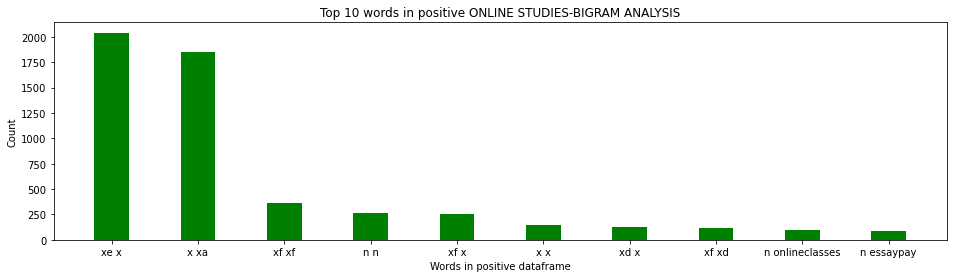

In [82]:
plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

plt.xlabel("Words in positive dataframe")

plt.ylabel("Count")

plt.title("Top 10 words in positive ONLINE STUDIES-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

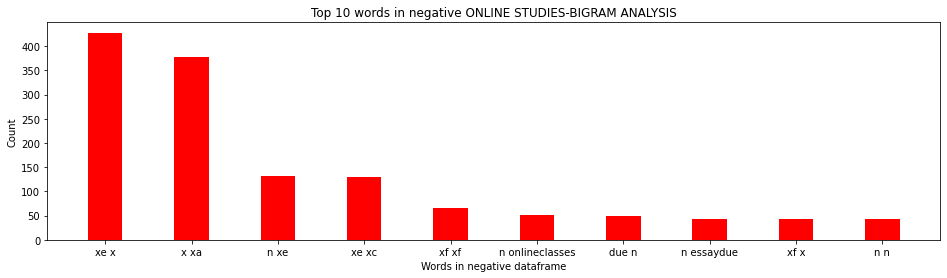

In [83]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative ONLINE STUDIES-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

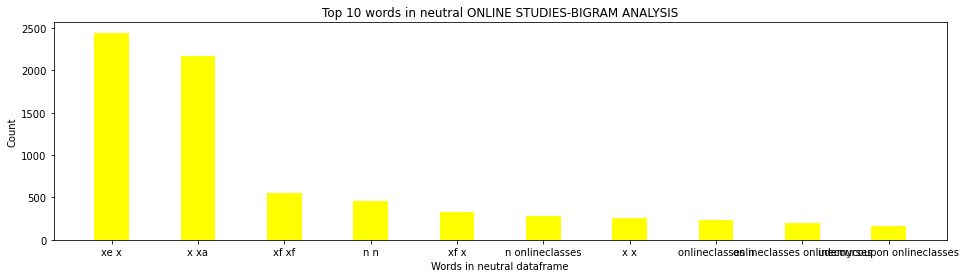

In [84]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral ONLINE STUDIES-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

#top 10 bigram neutral | n-grams


In [85]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['b', 'available', 'n', 'research', 'papers', 'n', 'someone', 'write', 'essay', 'n', 'someonehelppaper', 'n', 'homework', 'n', 'casestudy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'top', 'grades', 'n', 'springsemester', 'n', 'homework', 'n', 'quiz', 'n', 'onlineclasses', 'n', 'essaydue', 'n', 'paywrite', 'n', 'paperpay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mentioned', 'parent', 'advocates', 'favorite', 'schoolchoice', 'schoolchoiceweek', 'parents', 'advocacy', 'parenting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'design', 'beautiful', 'animated', 'websites', 'incredibly', 'fast', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'web', 'dev

Sentence after removing stopwords: ['b', 'cma', 'aspirants', 'learn', 'best', 'professors', 'siddhii', 'nprofessionalss', 'enquire', 'register', 'contact', 'us', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wake', 'good', 'morning', 'baby', 'n', 'ni', 'wake', 'open', 'link', 'join', 'class', 'fast', 'n', 'n', 'goodnight', 'n', 'covid', 'n', 'onlineclasses']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'commitment', 'excellence', 'dedication', 'towards', 'success', 'makes', 'every', 'program', 'fruitful', 'top', 'notch', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'join', 'wonderful', 'staff', 'coral', 'bielecki', 'trent', 'cummings', 'ambassador', 'luis', 'aguirre', 'torres', 'february', 'st', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'chec

Sentence after removing stopwords: ['b', 'highly', 'reliable', 'dm', 'need', 'urgent', 'help', 'n', 'essaypay', 'n', 'homeworkhelp', 'n', 'amwriting', 'n', 'payessay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'take', 'research', 'next', 'level', 'tips', 'advanced', 'google', 'google', 'scholar', 'search', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'excellency', 'top', 'focus', 'n', 'assignment', 'due', 'n', 'biology', 'npsychology', 'n', 'onlineclasses', 'nresearch', 'paper', 'nscience', 'nphysics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'coursework', 'look', 'best', 'dissertations', 'assignments', 'thesis', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enroll', 'today', 'go', 'gradesuccess', 'tutoring', 'grade', 'success', 'personal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'type', 'docs', 'easily', 'using', 'voice', 'typing', 'app', 'suppoall', 'regional', 'languages', 'n']
S

Sentence after removing stopwords: ['b', 'learners', 'get', 'positive', 'career', 'growth', 'upgrad', 'quarterly', 'nps', 'results', 'business', 'standard', 'news', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'instagram', 'photography', 'summary', 'top', 'ways', 'shoot', 'everything', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'great', 'see', 'handy', 'quick', 'start', 'guides', 'sara', 'compliance', 'questions', 'n', 'n', 'highered', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'best', 'content', 'marketing', 'seo', 'amp', 'copywriting', 'templates', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'online', 'schooling', 'also', 'helps', 'students', 'prepare', 'professional', 'life', 'find', 'facilitate', 'cambri', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'guarantee', 'secure', 'top', 'grades', 'need', 'onlineclasses', 'ndm', 'xf', 'xf',

Sentence after removing stopwords: ['b', 'come', 'learn', 'basics', 'using', 'mac', 'computer', 'new', 'virtual', 'class', 'mac', 'basics']
Sentence after removing stopwords: ['b', 'legit', 'writing', 'team', 'nwe', 'deliver', 'best', 'services', 'n', 'n', 'onlineclasses', 'n', 'calculus', 'n', 'proposals', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ultimate', 'wordpress', 'quiz', 'beginners', 'advanced', 'users', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'assignments', 'bothering', 'nuse', 'professional', 'writing', 'service', 'n', 'technology', 'n', 'onlineclasses', 'n', 'calculus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'click', 'link', 'take', 'outschool', 'classes', 'free', 'sure', 'visit', 'link', 'twitter', 'bio', 'fun', 'popul', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'el', 'templo', 'del', 'cielo', 'es', 'el', 'mayor', 'templo', 'de', 'su', 'clase', 'en', 'toda', 'la', 'republica', 'popular',

Sentence after removing stopwords: ['b', 'important', 'thing', 'succeed', 'business', 'consistency', 'n', 'nevenn', 'online', 'business', 'n', 'nmost', 'people', 'bother', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'webinar', 'activities', 'necessary', 'learners', 'take', 'full', 'advantage', 'session', 'pre', 'work', 'connects', 'wi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'proud', 'faculty', 'staff', 'students', 'helped', 'umsl', 'xe', 'x', 'xs', 'outstanding', 'online', 'programs', 'break', 'top', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'xe', 'x', 'xs', 'science', 'lesson', 'speaks', 'self', 'xe', 'x', 'xa', 'teaching', 'online', 'works', 'well', 'ta', 'amazing', 'children', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'challenging', 'environment', 'leads', 'great', 'efforts', 'students', 'well', 'faculties', 'n', 'nenroll', 'n', 'nvis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'important

Sentence after removing stopwords: ['b', 'golden', 'age', 'teachers', 'coming', 'back', 'says', 'byju', 'raveendran', 'techsparks', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'administer', 'cost', 'effective', 'quality', 'online', 'learning', 'solution', 'district', 'nan', 'organized', 'turn', 'key', 'curricu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xit', 'mememonday', 'xf', 'xf', 'xa', 'xa', 'n', 'xf', 'xf', 'x', 'xfwe', 'hope', 'relatable', 'content', 'put', 'smile', 'face', 'staoff', 'week', 'xe', 'xd', 'xa', 'xef', 'xb', 'xf', 'n', 'xf', 'xf', 'x', 'xbbe', 'sure', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'already', 'hit', 'students', 'new', 'skillshare', 'class', 'learn', 'draw', 'colour', 'unique', 'mandala', 'designs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'questions', 'easily', 'write', 'nonfiction', 'books', 'revolutionary', 'onlineclasses', 'xe', 'x', 'xa']
Sentence aft

Sentence after removing stopwords: ['b', 'use', 'db', 'primary', 'aid', 'children', 'absent', 'due', 'self', 'isolating', 'general', 'sickness', 'cont', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'try', 'teachers', 'classroom', 'app', 'free', 'esl', 'efl', 'elt', 'tesol', 'eal', 'tefl', 'edtech', 'edapp', 'edtools', 'remotelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'moocs', 'english', 'offered', 'online', 'check', 'mooc', 'portal', 'learn', 'exciting', 'oppo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vision', 'online', 'teaching', 'business', 'n', 'ntoday', 'discuss', 'optimizing', 'social', 'media', 'fa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'genius', 'edusoft', 'offer', 'best', 'school', 'learningmanagementsystem', 'software', 'erp', 'mobileapplication', 'android', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'many', 'vertices', 'cube', 'total', 'repost', 'find', 'n', 'n', 'cretaclass', 'cret

Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'able', 'study', 'language', 'online', 'makes', 'accessible', 'still', 'fun', 'interactive', 'nwe', 'still', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'remote', 'friendly', 'edtech', 'activity', 'xf', 'xf', 'x', 'x', 'students', 'create', 'quizzes', 'help', 'revise', 'v', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ms', 'excel', 'excel', 'complete', 'introduction', 'excel', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'practice', 'speaking', 'english', 'friendly', 'welcoming', 'virtual', 'setting', 'adults', 'free', 'online', 'event', 'registr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'discount', 'code', 'new', 'lesson', 'plan'

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xaour', 'worldbank', 'twin', 'reports', 'reveal', 'remotelearning', 'equally', 'effective', 'everywhere', 'hybrid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'help', 'essays', 'assignments', 'research', 'papers', 'power', 'point', 'presentation', 'hmu', 'available', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xc', 'xbccome', 'join', 'fabulous', 'free', 'onlinecourse', 'nfind', 'uk', 'language', 'literature', 'music', 'mor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'writing', 'tips', 'n', 'n', 'get', 'started', 'soon', 'n', 'nexperience', 'popular', 'exclusive', 'video', 'course', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'late', 'nukeneducation', 'build', 'ready', 'xf', 'xf', 'x', 'x', 'n', 'nwe', 'date', 'nuken', 'feature', 'set', 'also', 'new', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'take', 'online', 'class', 'affordab

Sentence after removing stopwords: ['b', 'pretty', 'sure', 'newbrunswick', 'needs', 'make', 'sure', 'schools', 'access', 'proper', 'internet', 'four', 'days', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tuesdaytrivia', 'nso', 'kids', 'fun', 'xe', 'x', 'xs', 'brain', 'teaser', 'moms', 'n', 'n', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tell', 'classes', 'available', 'wherever', 'download', 'tell', 'app', 'nadroid', 'napple', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happy', 'schoolchoiceweek', 'sporting', 'compasscs', 'colors', 'loud', 'amp', 'proud', 'compassexperience', 'learn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'looking', 'xf', 'xf', 'x', 'x', 'full', 'time', 'virtuallearning', 'program', 'right', 'amp', 'family', 'learn', 'low', 'coun', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'high', 'ed', 'leaders', 'overcoming', 'challenges', 'remotelearning', 'student

Sentence after removing stopwords: ['b', 'success', 'series', 'webinar', 'presenting', 'amp', 'negotiating', 'offer', 'february', 'register']
Sentence after removing stopwords: ['b', 'homesteadnhp', 'partners', 'cilcorg', 'schedule', 'distance', 'learning', 'programs', 'cilc', 'free', 'service', 'use', 'sch', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'term', 'break', 'isb', 'primary', 'hosted', 'isb', 'wildlife', 'photographer', 'year', 'competition', 'primary', 'studen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'interested', 'learning', 'extra', 'secure', 'online', 'register', 'online', 'class', 'learn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'learn', 'experts', 'digital', 'marketing', 'live', 'training', 'batch', 'starts', 'feb', 'hurry', 'limited', 'seats', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tips', 'help', 'child', 'focus', 'schoolwork', 'create', 'daily', 'schedule', 'n', 'nread', 'full', 'article',

Sentence after removing stopwords: ['b', 'learning', 'topmost', 'priority', 'educational', 'institutions', 'regardless', 'forms', 'edneed', 'offers', 'forms', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'k', 'schools', 'access', 'adequate', 'network', 'bandwidth', 'thanks', 'increase', 'remotelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'based', 'information', 'moe', 'website', 'n', 'nread', 'countries', 'provide', 'free', 'textbooks', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'access', 'course', 'xe', 'x', 'xchow', 'give', 'living', 'room', 'makeover', 'xe', 'x', 'xd', 'skillshare', 'completely', 'free', 'weeks', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'staff', 'alexandra', 'hills', 'state', 'high', 'school', 'thoroughly', 'enjoyed', 'geography', 'activity', 'nuiteq', 'snowflake', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'big', 'list', 'predictions', 'pretty', 'spot', 'onlinelearning'

Sentence after removing stopwords: ['b', 'xd', 'x', 'xd', 'xaf', 'xd', 'xb', 'xd', 'xb', 'xd', 'xa', 'xd', 'x', 'xd', 'xac', 'xd', 'x', 'xd', 'xa', 'xd', 'xb', 'xd', 'xa', 'nenglish', 'teacher', 'nteach', 'wherever', 'whenever', 'free', 'whatever', 'need', 'english', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pay', 'us', 'write', 'essay', 'nwe', 'deliver', 'best', 'services', 'n', 'programming', 'n', 'calculus', 'n', 'chemistry', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'take', 'online', 'class', 'affordable', 'rates', 'secure', 'n', 'math', 'n', 'calculus', 'n', 'econometrics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'weekend', 'xf', 'xf', 'x', 'xb', 'big', 'shout', 'many', 'online', 'postgrad', 'industrylearners', 'ul', 'busy', 'working', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bt', 'unicorns', 'justify', 'high', 'valuations', 'businesstoday', 'n', 'n', 'byjus', 'onlinelearning']
Sentence afte

Sentence after removing stopwords: ['b', 'students', 'mario', 'life', 'ndon', 'worry', 'ek', 'life', 'hi', 'jayga', 'nam', 'right', 'govt', 'pmoindia', 'n', 'cancelboardexams', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'online', 'workshop', 'allert', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xe', 'xc', 'xegg', 'free', 'gelatin', 'free', 'n', 'xf', 'xf', 'x', 'x', 'video', 'available', 'january', 'th', 'n', 'xf', 'xf', 'xf', 'xb', 'xef', 'xb', 'xfinr', 'n', 'xe', 'x', 'x', 'xef', 'xb', 'xfpre', 'recorded', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'top', 'grades', 'n', 'springsemester', 'n', 'homework', 'n', 'quiz', 'n', 'onlineclasses', 'n', 'essaydue', 'n', 'paywrite', 'n', 'paperpay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'know', 'answer', 'xf', 'xf', 'xa', 'x', 'npractise', 'improve', 'business', 'general', 'english', 'skills', 'learnenglish', 'subsc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'icymi', 'con

Sentence after removing stopwords: ['b', 'struggling', 'complete', 'assignments', 'essay', 'worry', 'help', 'n', 'payessay', 'n', 'pay', 'assignments', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tried', 'activity', 'want', 'read', 'schools', 'action', 'class', 'flip', 'narrative', 'new', 'year', 'resol', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'en', 'muchos', 'pueblos', 'de', 'montana', 'japoneses', 'la', 'avispa', 'se', 'considera', 'un', 'manjar', 'cuando', 'se', 'sirve', 'frito', 'spn', 'many', 'japane', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'another', 'day', 'another', 'awesome', 'review', 'thanks', 'much', 'addy', 'xe', 'xc', 'xd', 'xef', 'xb', 'xf', 'n', 'n', 'onlinelearning', 'gamification', 'creativewriting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'plagiarism', 'free', 'papers', 'nguaranteed', 'excellent', 'grades', 'timely', 'delivery', 'n', 'n', 'coursemodules', 'n', 'geography', 'xe', 'x', 'xa']
Sentenc

Sentence after removing stopwords: ['b', 'team', 'orlando', 'week', 'xf', 'xf', 'x', 'xe', 'n', 'nare', 'also', 'attending', 'fetc', 'would', 'love', 'meet', 'blocksi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', 'x', 'proud', 'graduates', 'xf', 'xf', 'x', 'xf', 'n', 'nyou', 'speak', 'member', 'team', 'today', 'pm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'song', 'remotelearning', 'oldmanebro', 'show']
Sentence after removing stopwords: ['b', 'educational', 'webinar', 'n', 'nwithin', 'webinar', 'specifically', 'address', 'controllers', 'role', 'pro', 'active', 'potentials', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'know', 'famous', 'people', 'homeschooled', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'distancelearning', 'science', 'homelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'join', 'codebetter', 'institute', 'get', 'trained', 'placed', 'fast', 'nread']
Sentence after removing stopwords: ['b', '

Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xa', 'dulux', 'academy', 'live', 'update', 'xf', 'xf', 'xa', 'xa', 'n', 'nlive', 'workshops', 'week', 'cover', 'frequently', 'asked', 'questions', 'water', 'borne', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'anyone', 'confused', 'become', 'confused', 'good', 'thing', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'best', 'line', 'heard', 'day', 'made', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'essay', 'nwe', 'deliver', 'best', 'services', 'n', 'sociology', 'n', 'onlineclasses', 'n', 'environmentalstudies', 'n', 'msaccess', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'try', 'teachers', 'classroom', 'app', 'free', 'esl', 'efl', 'elt', 'tesol', 'eal', 'tefl', 'edtech', 'edapp', 'edtools', 'remotelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'amitabh', 'kant', 'india', 'become', 'world', 'edtech', 'capital', 'says', 'amitabh', 

Sentence after removing stopwords: ['b', 'several', 'things', 'may', 'want', 'order', 'prepare', 'first', 'private', 'lesson', 'new', 'stud', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xbbthe', 'emergency', 'remotelearning', 'responses', 'adopted', 'covid', 'pandemic', 'highlighted', 'many', 'highs', 'amp', 'lows', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'motivational', 'order', 'best', 'version', 'change', 'inevitable', 'inspiration', 'motivation', 'quote', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'credit', 'katrina', 'h', 'september', 'eight', 'tips', 'successful', 'online', 'learning', 'international', 'literacy', 'assoc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fortunate', 'growing', 'number', 'clients', 'profit', 'sector', 'love', 'see', 'creative', 'ways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'product', 'xf', 'xf', 'x', 'xd', 'free', 'course', 'draw', 'illustration

Sentence after removing stopwords: ['b', 'yes', 'yes', 'xf', 'xf', 'x', 'xd', 'expand', 'vocabulary', 'learning', 'many', 'different', 'ways', 'answer', 'positively', 'german', 'xe', 'xc', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kids', 'quick', 'learn', 'also', 'planted', 'saplings', 'around', 'homes', 'n', 'onlineeducation', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'first', 'cbse', 'set', 'give', 'free', 'access', 'board', 'answer', 'sheets', 'india', 'news', 'times', 'india', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'free', 'balloon', 'ride', 'image', 'lesson', 'get', 'free', 'sample', 'lesson', 'esl', 'efl', 'elt', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'excited', 'paof', 'tutoring', 'platform', 'hope', 'good', 'time', 'team', 'make', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rchk', 'primary', 'string', 'ensemble', 'performing', 'gong', 'xi', 'wishing', 'friends', 'rchk', 'happy', 'lunar', 

Sentence after removing stopwords: ['b', 'create', 'lightning', 'fast', 'videos', 'invideo', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'help', 'professional', 'team', 'nguaranteed', 'excellent', 'grades', 'timely', 'delivery', 'n', 'n', 'onlineclasses', 'n', 'biology', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'sense', 'reallyschool', 'help', 'supporting', 'continuation', 'learning', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pay', 'us', 'assignment', 'nuse', 'professional', 'writing', 'service', 'n', 'computerscience', 'n', 'calculus', 'n', 'computerscience', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'morning', 'atalibrary', 'virtual', 'plcs', 'work', 'guide', 'effectively', 'implementing', 'online', 'hybrid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'best', 'online', 'courses', 'elearning', 'mooc', 'onlinecourse', 'onlinelearning', 'moocs', 'onl

Sentence after removing stopwords: ['b', 'best', 'services', 'offer', 'following', 'assignments', 'hmu', 'today', 'n', 'pay', 'someone', 'nphysics', 'n', 'essayhelp', 'nenglish', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcthe', 'teachers', 'harrow', 'school', 'online', 'brilliant', 'making', 'look', 'forward', 'joining', 'lesson', 'even', 'may', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xc', 'xfcheck', 'goloveteach', 'featured', 'xe', 'x', 'xd', 'xef', 'xb', 'xfof', 'top', 'educational', 'tweets', 'week', 'xe', 'xd', 'xa', 'xef', 'xb', 'xf', 'show', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'long', 'desire', 'explore', 'great', 'desire', 'screw', 'right', 'track', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wait', 'share', 'things', 'fetc', 'kgrunow', 'post', 'covid', 'edtech', 'tools', 'free', 'coaching', 'resources', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'k', 'schools', '

Sentence after removing stopwords: ['b', 'good', 'day', 'amsterdam', 'xc', 'xa', 'ntoday', 'twenty', 'eighth', 'th', 'day', 'january', 'nlegos', 'around', 'long', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'et', 'awards', 'new', 'decade', 'renewed', 'india', 'n', 'embibe', 'onlinelearning']
Sentence after removing stopwords: ['b', 'dosen', 'allows', 'connect', 'real', 'experts', 'timely', 'meaningful', 'way', 'crush', 'goals', 'booking', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'clinical', 'role', 'singapore', 'mainly', 'management', 'mental', 'health', 'services', 'n', 'nread', 'full', 'article', 'thi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'special', 'occasion', 'let', 'us', 'make', 'promise', 'motherland', 'enrich', 'preserve', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'know', 'nsound', 'waves', 'generate', 'heat', 'travel', 'absorbed', 'materials', 'n', 'funfacts', 'funfactoftheday', 'xe', 'x', 'xa']
Sentence after

Sentence after removing stopwords: ['b', 'course', 'allows', 'get', 'inside', 'look', 'vocabulary', 'used', 'tests', 'ways', 'make', 'sure', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indian', 'startups', 'raise', 'billion', 'quarter', 'first', 'time', 'reposays', 'news', 'et', 'cio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'n', 'al', 'itquan', 'educational', 'welfare', 'society', 'n', 'sayedmodarresi', 'whoishussainpak', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'professional', 'academic', 'help', 'dm', 'n', 'pay', 'someone', 'nphysics', 'n', 'essayhelp', 'nenglish', 'n', 'essay', 'pay', 'nmaths', 'n', 'essaydue', 'nhistory', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'create', 'ai', 'content', 'generator', 'produces', 'interesting', 'unique', 'content', 'n', 'aicontentgen', 'ai', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'love', 'xe', 'xd', 'xa', 'xef', 'xb', 'xf', 'students', 'xf', 'xf', 'x', 'x', 

Sentence after removing stopwords: ['b', 'department', 'journalism', 'amp', 'media', 'management', 'organizing', 'online', 'activity', 'main', 'bhi', 'reporter', 'th', 'jan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'create', 'lightning', 'fast', 'videos', 'invideo', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'iim', 'calcutta', 'placement', 'summer', 'internship', 'top', 'stipend', 'rs', 'lakh', 'month', 'times', 'india', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'course', 'via', 'thinkific', 'filling', 'creative', 'well', 'starts', 'st', 'march', 'sign', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learn', 'use', 'free', 'open', 'source', 'front', 'end', 'framework', 'developing', 'html', 'css', 'javascript', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmath

Sentence after removing stopwords: ['b', 'ubuntu', 'linux', 'virtualbox', 'quick', 'setup', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'proud', 'share', 'top', 'spot', 'online', 'bachelor', 'degree', 'program', 'nation', 'xc', 'xa', 'uf', 'xc', 'xa', 'xf', 'xf', 'x', 'xbb', 'xf', 'xf', 'xa', 'x', 'xc', 'xa', 'goerau', 'xc', 'xa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'assignments', 'nwe', 'deliver', 'best', 'services', 'n', 'biology', 'n', 'onlineclasses', 'n', 'programming', 'n', 'history', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mentorwolf', 'assist', 'loved', 'one', 'struggling', 'stress', 'management', 'enrol', 'get', 'customized', 'st', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'secure', 'essays', 'n', 'paysomeone', 'naccounts', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmathematics', 'n', 'essaydue', 'ns', 'xe', 'x', 'xa']
Sentence after removi

Sentence after removing stopwords: ['b', 'shine', 'successful', 'career', 'aviation', 'industry', 'jt', 'aviation', 'college', 'xe', 'xc', 'x', 'xf', 'xf', 'xe', 'x', 'xf', 'xf', 'xc', 'xf', 'xf', 'xf', 'x', 'xa', 'xe', 'x', 'xd', 'xf', 'xf', 'xe', 'x', 'n', 'xe', 'xc', 'x', 'log', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kindly', 'consider', 'assistance', 'n', 'onlineclasses', 'n', 'exams', 'n', 'quiz', 'n', 'homework', 'n', 'essayhelp', 'n', 'assignments', 'n', 'ksu', 'wsu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'teachers', 'remotely', 'notallheroeswearcapes', 'xe', 'x', 'xayou', 'amazing', 'n', 'ndrawn', 'one', 'year', 'ago', 'today', 'throwback', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'free', 'lesson', 'features', 'acschemmatters', 'text', 'interview', 'laxmevy', 'chemist', 'lhochchem', 'chose', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'academic', 'writing', 'nguaranteed', 'excellent

Sentence after removing stopwords: ['b', 'new', 'group', 'listing', 'outschool', 'month', 'provides', 'fun', 'space', 'share', 'cute', 'silly', 'pet', 'pic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'national', 'science', 'day', 'celebrated', 'february', 'year', 'honor', 'discovery', 'raman', 'effe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'unsure', 'course', 'good', 'call', 'us', 'email', 'us', 'info', 'fivee', 'co', 'uk', 'dicuss', 'inter', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'interested', 'learning', 'language', 'native', 'speaker', 'time', 'suits', 'try', 'preply', 'languages', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hmu', 'available', 'n', 'onlineclasses', 'assignments', 'n', 'essays', 'math', 'n', 'hbcu', 'gramfam', 'ncat', 'pvamu', 'asutwitter', 'nccu']
Sentence after removing stopwords: ['b', 'thanks', 'iltatweets', 'us', 'last', 'week', 'xf', 'xf', 'xa', 'x', 'recap', 'presented', 'find', 'rel

Sentence after removing stopwords: ['b', 'fun', 'easy', 'watch', 'engaging', 'animated', 'videos', 'rather', 'reading', 'boring', 'textbook', 'explaining', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'let', 'us', 'handle', 'academic', 'work', 'hit', 'top', 'quality', 'work', 'n', 'essays', 'essaywriting', 'n', 'essayhelp', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'top', 'online', 'side', 'hustles', 'earn', 'money', 'n', 'n', 'online', 'side', 'hustle', 'side', 'income', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'instructors', 'strong', 'music', 'education', 'backgrounds', 'email', 'porchmusicstorelessons', 'gmail', 'com', 'call', 'sto', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'bad', 'choice', 'top', 'reasons', 'remote', 'learning', 'best', 'many', 'students', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hey', 'us', 'n', 'nwe', 'love', 'love', 'seeing', 'student', 'achieve', 'pro

Sentence after removing stopwords: ['b', 'secondleif', 'helpful', 'thank', 'much', 'secondleif', 'n', 'mieexpe', 'teamsmania', 'microsoftedu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'virtual', 'aactivity', 'held', 'grades', 'th', 'st', 'jan', 'fun', 'filled', 'activities', 'witnessed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'xad', 'x', 'xef', 'xb', 'xf', 'explore', 'exciting', 'world', 'amazing', 'information', 'amp', 'enhance', 'generalknowledge', 'n', 'n', 'xf', 'xf', 'x', 'x', 'kindly', 'visit', 'tukiolp', 'web', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'career', 'stress', 'college', 'vidya', 'help', 'finding', 'top', 'online', 'universities', 'within', 'minutes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thanks', 'xe', 'x', 'xcisd', 'ground', 'xe', 'x', 'xd', 'nfor', 'sharing', 'shovideo', 'discuss', 'gamification', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'focus', 'students', 'xe', 'x', 

Sentence after removing stopwords: ['b', 'esl', 'jeff', 'vision', 'business', 'year', 'successfully', 'teaching', 'online', 'decided', 'boost', 'onlin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watch', 'uptet', 'first', 'mitting', 'hindi', 'santoshsir', 'thevelocity', 'onlineclasses', 'youtube']
Sentence after removing stopwords: ['b', 'old', 'passive', 'recall', 'isolation', 'nnew', 'share', 'ideas', 'connected', 'nseeking', 'pilot', 'case', 'study', 'applicants', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'advanced', 'financial', 'accounting', 'onlineclasses', 'onlinecourses', 'freeonlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'premisin', 'coworking', 'workspace', 'provider', 'emerges', 'strong', 'player', 'xe', 'x', 'x', 'theprint', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'dm', 'us', 'excellent', 'grades', 'n', 'essays', 'n', 'english', 'n', 'essay', 'due', 'n', 'paper', 'pay', 'n', 's

Sentence after removing stopwords: ['b', 'initiate', 'opportunities', 'always', 'challenge', 'learn', 'something', 'new', 'learn', 'coding', 'literacy', 'bo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'complete', 'unreal', 'engine', 'megacourse', 'beginner', 'expe', 'udemy', 'udemycourse', 'udemyfree', 'udemycoupon', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'excellent', 'grades', 'guaranteed', 'affordable', 'prices', 'pay', 'n', 'statistics', 'n', 'excel', 'n', 'accounting', 'n', 'onlineclasses', 'n', 'lab', 'report', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'help', 'us', 'amazing', 'stato', 'loving', 'classes', 'tsa', 'far', 'year', 'tell', 'us', 'exper', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'beyonces', 'indian', 'business', 'famous', 'female', 'entrepreneurs', 'india', 'little', 'text', 'n', 'n']
Sentence after removing stopwords: ['b', 'interested', 'taking', 'class', 'learning', 'new', 'language

Sentence after removing stopwords: ['b', 'today', 'feel', 'like', 'chatting', 'love', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xb', 'onlyfansbadies', 'onlyoneof', 'go', 'subscribe', 'send', 'message', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'byju', 'incuspaze', 'lease', 'seats', 'byju', 'ahmedabad', 'amp', 'lucknow', 'real', 'estate', 'news', 'et', 'realestate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ultimate', 'guide', 'students', 'busy', 'professionals', 'college', 'whose', 'unilife', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'curious', 'yellowdig', 'n', 'njoin', 'us', 'free', 'demo', 'webinar', 'today', 'pm', 'et', 'get', 'inside', 'look', 'yellowdig', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'improve', 'subject', 'knowledge', 'turito', 'xc', 'xa', 'n', 'nbook', 'free', 'demo', 'class']
Sentence after removing stopwords: ['b', 'get', 'diverted', 'stausing', 'socia

Sentence after removing stopwords: ['b', 'andydv', 'doubt', 'true', 'medical', 'professional', 'would', 'risk', 'child', 'health', 'get', 'education', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cbse', 'bengaluru', 'training', 'tests', 'help', 'cbse', 'students', 'adapt', 'well', 'new', 'exam', 'pattern', 'bengaluru', 'news', 'times', 'indi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'reach', 'goals', 'learning', 'skillshare', 'get', 'month', 'free', 'trial', 'link', 'learn', 'creativity', 'busines', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tutor', 'help', 'topic', 'trouble', 'n', 'nread', 'full', 'article', 'motivate', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'activities', 'students', 'lunar', 'new', 'year', 'recommended', 'list', 'activities', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'making', 'schools', 'xc', 'xatrans', 'kids', 'friendly', 'new', 'indian', 'express', 'n', 'n', 'byjus',

Sentence after removing stopwords: ['b', 'surplus', 'laptop', 'form', 'one', 'partners', 'refurbished', 'amp', 'donated', 'young', 'mother', 'wishing', 'continue', 'learning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cbse', 'bengaluru', 'training', 'tests', 'help', 'cbse', 'students', 'adapt', 'well', 'new', 'exam', 'pattern', 'bengaluru', 'news', 'times', 'indi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xef', 'xb', 'xfcan', 'believe', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'nhtml', 'canvas', 'bootcamp', 'beginners', 'easy', 'steps', 'myopenacademy', 'n', 'xf', 'xf', 'x', 'x', 'shop', 'range', 'xe', 'xf', 'xa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'going', 'nwe', 'heard', 'someone', 'saying', 'meme', 'game', 'strong', 'nso', 'entering', 'meme', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'rankings', 'rankings', 'released', 'today', 'usnews', 'ranks', 'samfordnursing', 'n', 'xf', 'xf', 'x', 'x

Sentence after removing stopwords: ['b', 'student', 'work', 'done', 'year', 'old', 'sarayu', 'level', 'online', 'practice', 'sessions', 'n', 'n', 'artwork', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'studying', 'medical', 'sucks', 'specially', 'learning', 'form', 'onlineclasses']
Sentence after removing stopwords: ['b', 'irish', 'records', 'certificate', 'interested', 'researching', 'irish', 'ancestors', 'national', 'institute', 'gene', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'xc', 'x', 'comprehension', 'strategies', 'n', 'xe', 'xc', 'x', 'concentration', 'improvement', 'n', 'xe', 'xc', 'x', 'much', 'n', 'nenroll', 'today', 'go', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nec', 'long', 'standing', 'highly', 'regarded', 'pioneer', 'flexible', 'distance', 'learning', 'solutions', 'designed', 'make', 'learnin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'highly', 'reliable', 'dm', 'need', 'urgent', 'help', 'n', 'essayp

Sentence after removing stopwords: ['b', 'learn', 'basics', 'using', 'jquery', 'javascript', 'library', 'built', 'make', 'easy', 'write', 'javascript', 'related', 'code', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'professional', 'help', 'handling', 'academic', 'work', 'reach', 'us', 'get', 'di', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'changing', 'course', 'transforming', 'education', 'neducation', 'need', 'everyone', 'happy', 'international', 'education', 'day', 'form', 'ba', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xb', 'x', 'core', 'java', 'online', 'training', 'xf', 'xf', 'xb', 'x', 'n', 'xe', 'xc', 'xd', 'xef', 'xb', 'xf', 'enroll', 'free', 'demo', 'rd', 'feb', 'ist', 'n', 'xf', 'xf', 'x', 'x', 'visit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pc', 'suddenly', 'hot', 'tech', 'technews', 'computers', 'computing', 'desktops', 'wfh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', '

In [86]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['b', 'teachmintapp', 'hey', 'xe', 'x', 'xre', 'unable', 'xe', 'x', 'xedit', 'xe', 'x', 'x', 'digital', 'pamphlets', 'getting', 'highlight', 'xe', 'x', 'xsomething', 'went', 'wrong', 'xe', 'x', 'x', 'cl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'npaywrite', 'n', 'homeworkslave', 'n', 'xe', 'xc', 'xcalculus', 'n', 'essaydue', 'n', 'xe', 'xc', 'xmath', 'n', 'onlineclasses', 'n', 'xe', 'xc', 'xessay', 'due', 'n', 'xe', 'xc', 'xpaper', 'pay', 'n', 'xe', 'xc', 'xfinance', 'n', 'xe', 'xc', 'xeconomic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'number', 'public', 'schools', 'recorded', 'disruptions', 'temporary', 'closures', 'pivots', 'back', 'remote', 'learni', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kangaroo', 'crew', 'alphabet', 'matching', 'game', 'nonline', 'learning', 'n']
Sentence after removing stopwords: ['b', 'akshay', 'kumar', 'collective', 'artists', 'backed', 'socialswagworld', 

Sentence after removing stopwords: ['b', 'hire', 'us', 'npaywrite', 'n', 'homeworkslave', 'n', 'xe', 'xc', 'xcalculus', 'n', 'essaydue', 'n', 'xe', 'xc', 'xmath', 'n', 'onlineclasses', 'n', 'xe', 'xc', 'xessay', 'due', 'n', 'xe', 'xc', 'xpaper', 'pay', 'n', 'xe', 'xc', 'xfinance', 'n', 'xe', 'xc', 'xeconomic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learn', 'understand', 'improve', 'children', 'xe', 'x', 'xs', 'mental', 'health', 'wellbeing', 'join', 'xc', 'xaflexible', 'xc', 'xaonline', 'developmental', 'psyc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hit', 'dm', 'n', 'pay', 'someone', 'nphysics', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmaths', 'n', 'essaydue', 'nchem', 'n', 'assignments', 'n', 'assignment', 'due', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'go', 'give', 'n', 'give', 'n', 'na', 'poor', 'mentality', 'attracts', 'lack', 'would', 'mind', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'english', 'gram

Sentence after removing stopwords: ['b', 'need', 'show', 'less', 'anger', 'already', 'angry', 'world', 'nshake', 'hand', 'nwe', 'make', 'loving', 'stand', 'n', 'know', 'ndo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'physics', 'n', 'essayhelp', 'n', 'english', 'n', 'essaypay', 'n', 'math', 'n', 'essaydue', 'n', 'chemistry', 'n', 'assignments', 'n', 'nursing', 'n', 'assignment', 'due', 'n', 'economics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'levels', 'hard', 'study', 'answering', 'late', 'blog']
Sentence after removing stopwords: ['b', 'teach', 'business', 'english', 'remotely', 'lesson', 'plans', 'could', 'save', 'hours', 'preparation', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'getting', 'expected', 'digital', 'marketing', 'results', 'ntime', 'learn', 'industry', 'experts', 'nenroll', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'product', 'xf', 'xf', 'x', 'xd', 'unity', 'build', 'program', 'publish', 'shooter'

Sentence after removing stopwords: ['b', 'hire', 'us', 'npaywrite', 'n', 'homeworkslave', 'n', 'xe', 'xc', 'xcalculus', 'n', 'essaydue', 'n', 'xe', 'xc', 'xmath', 'n', 'onlineclasses', 'n', 'xe', 'xc', 'xessay', 'due', 'n', 'xe', 'xc', 'xpaper', 'pay', 'n', 'xe', 'xc', 'xfinance', 'n', 'xe', 'xc', 'xeconomic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rashtrapatibhvn', 'sir', 'please', 'intervene', 'see', 'happening', 'maharashtra', 'mumbai', 'bad', 'effected', 'city', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'outrageous', 'especially', 'targeted', 'minorities', 'xe', 'x', 'xm', 'sure', 'xe', 'x', 'xt', 'target', 'families', 'upper', 'manhattan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'npaywrite', 'n', 'homeworkslave', 'n', 'xe', 'xc', 'xcalculus', 'n', 'essaydue', 'n', 'xe', 'xc', 'xmath', 'n', 'onlineclasses', 'n', 'xe', 'xc', 'xessay', 'due', 'n', 'xe', 'xc', 'xpaper', 'pay', 'n', 'xe', 'xc', 'xfinance', 'n', 'xe', '

Sentence after removing stopwords: ['b', 'kangaroo', 'crew', 'alphabet', 'matching', 'game', 'nonline', 'learning', 'n']
Sentence after removing stopwords: ['b', 'dm', 'essays', 'assignments', 'online', 'classes', 'n', 'nindicate', 'due', 'time', 'nexpect', 'quality', 'work', 'n', 'spanishessays', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'flint', 'schools', 'get', 'k', 'per', 'student', 'covid', 'aid', 'stay', 'remote', 'indefinitely', 'low', 'achieving', 'district', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'humble', 'request', 'ashok', 'gehlot', 'ji', 'please', 'close', 'schools', 'rajsthan', 'classes', 'till', 'february', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'schools', 'colleges', 'expensive', 'video', 'streaming', 'services', 'last', 'years', 'onlinelearning', 'online', 'school', 'copied']
Sentence after removing stopwords: ['b', 'flicc', 'categories', 'intentional', 'nmisinformation', 'n', 'fake', 'experts', 'n', 'logical', 'fa

Sentence after removing stopwords: ['b', 'years', 'student', 'solve', 'xx', 'rubik', 'cube', 'sec', 'xf', 'xf', 'xa', 'x', 'xf', 'xf', 'x', 'xa', 'n', 'ntrainer', 'xf', 'xf', 'x', 'xa', 'xe', 'x', 'xd', 'xf', 'xf', 'xf', 'xab', 'xf', 'xf', 'x', 'xb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'sricube', 'n', 'n', 'rubikscube', 'x', 'rubik', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'miss', 'shouldergeek', 'th', 'may', 'online', 'postoperative', 'shoulder', 'course', 'n', 'nplaces', 'limited', 'please', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hbcus', 'offer', 'unique', 'education', 'experience', 'xe', 'x', 'x', 'one', 'centered', 'culture', 'sense', 'belonging', 'xe', 'x', 'x', 'difficult', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'work', 'done', 'due', 'date', 'proficient', 'writers', 'dm', 'us', 'mathschemistry', 'nemail', 'bestessays', 'gmail', 'com', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'th

Sentence after removing stopwords: ['b', 'pay', 'someone', 'nphysics', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmaths', 'n', 'essaydue', 'nchem', 'n', 'assignments', 'nnursing', 'n', 'assignment', 'due', 'neconomi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dr', 'james', 'right', 'school', 'districts', 'worked', 'us', 'help', 'close', 'digitaldivide', 'students', 'forced', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'every', 'additional', 'year', 'education', 'india', 'increases', 'person', 'average', 'income', 'per', 'cent', 'new', 'india', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'parents', 'urge', 'education', 'minister', 'hold', 'board', 'exams', 'hybrid', 'mode', 'jammu', 'kashmir', 'late', 'news', 'tourism', 'breaking', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hi', 'friends', 'student', 'starting', 'fall', 'behind', 'uncertainty', 'covid', 'making', 'difficult', 'learn', 'xe', 'x', 'xa']
Sentence after remo

Sentence after removing stopwords: ['b', 'since', 'affected', 'sector', 'due', 'covid', 'education', 'sector', 'every', 'time', 'threat', 'rises', 'educ', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'applying', 'artificial', 'intelligence', 'amp', 'machine', 'learning', 'elearning', 'shabbir', 'mookhtiar', 'conferencia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'anyone', 'else', 'feel', 'tired', 'even', 'classes', 'online', 'dughh', 'n', 'onlineclasses', 'lifeisstrange']
Sentence after removing stopwords: ['b', 'featuredcourse', 'participants', 'second', 'half', 'rrp', 'n', 'n', 'marks', 'halfway', 'point', 'participant', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'prepared', 'remote', 'teaching', 'moment', 'xe', 'x', 'xs', 'notice', 'n', 'n', 'remotelearning']
Sentence after removing stopwords: ['b', 'awkward', 'new', 'kid', 'moment', 'nope', 'n', 'nrolling', 'admissions', 'offers', 'tons', 'benefits', 'k', 'students', 'big', 'pro', 'xe', 

Sentence after removing stopwords: ['b', 'ever', 'take', 'zoom', 'call', 'phone', 'online', 'learning', 'n', 'ndid', 'hold', 'phone', 'hand', 'get', 'tired', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'npaywrite', 'n', 'homeworkslave', 'n', 'xe', 'xc', 'xcalculus', 'n', 'essaydue', 'n', 'xe', 'xc', 'xmath', 'n', 'onlineclasses', 'n', 'xe', 'xc', 'xessay', 'due', 'n', 'xe', 'xc', 'xpaper', 'pay', 'n', 'xe', 'xc', 'xfinance', 'n', 'xe', 'xc', 'xeconomic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xve', 'put', 'together', 'tips', 'improving', 'connection', 'trainer', 'amp', 'learner', 'check', 'late', 'blog', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pandemic', 'put', 'lot', 'children', 'school', 'education', 'suffered', 'late', 'news', 'india', 'hindustan', 'times', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kangaroo', 'crew', 'alphabet', 'matching', 'game', 'nonline', 'learning', 'n']
Sentence afte

In [87]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['b', 'conversion', 'optimization', 'mastery', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'whatsapp', 'ndm', 'willard', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue', 'essays', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'well', 'xe', 'x', 'xa', 'day', 'resume', 'back', 'zoom', 'classes', 'xf', 'xf', 'x', 'xc', 'n', 'nwhy', 'feel', 'like', 'reliving', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'struggling', 'assignment', 'nfor', 'quality', 'results', 'dm', 'us', 'today', 'n', 'geography', 'n', 'codingprojects', 'n', 'java', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'understanding', 'gamification', 'help', 'improve', 'online', 'learning', 'n', 'n', 'onlinelearning', 'elearning', 'edtech', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'choose', 'name', 'online', 'course', 'sells

Sentence after removing stopwords: ['b', 'dm', 'spring', 'classes', 'n', 'assignmentdue', 'n', 'homeworkhelp', 'n', 'onlineclasses', 'n', 'canvas', 'n', 'capstone', 'n', 'blackboard', 'n', 'pearson', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'education', 'ministry', 'notifies', 'four', 'year', 'integrated', 'teacher', 'education', 'programme', 'times', 'india', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'essays', 'assignments', 'handled', 'experts', 'n', 'pay', 'someone', 'n', 'essayhelp', 'n', 'english', 'n', 'essaypay', 'n', 'maths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'assignment', 'n', 'biochem', 'n', 'essaypay', 'n', 'essaydue', 'n', 'assignmenthelp', 'n', 'paysomeone', 'n', 'essayhelp', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learn', 'hvac', 'online', 'n', 'n', 'onlinelearning', 'onlinecourses', 'onlinelearningcourse']
Sentence after removing stopwords: ['b', 'techtools

Sentence after removing stopwords: ['b', 'classes', 'begun', 'assignments', 'trickling', 'hmu', 'help', 'homework', 'essays', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tutorkelvin', 'ndm', 'n', 'essays', 'n', 'assignments', 'n', 'homework', 'n', 'onlineclasses', 'n', 'discussionpost', 'n', 'fallclasses', 'n', 'datascience', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'offer', 'legit', 'amp', 'quality', 'academic', 'solutions', 'nkindly', 'dm', 'place', 'order', 'n', 'essaypay', 'n', 'econometrics', 'n', 'javascript', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'improve', 'virtualclassroom', 'training', 'lightbulbjo', 'three', 'liveonlinelearning', 'experts', 'contri', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'youtube', 'thumbnail', 'masterclass', 'ultimate', 'guide', 'thumbnails', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'product', 'xf', 'xf', 'x', 'xd', 'learn', 'sel

Sentence after removing stopwords: ['b', 'ticse', 'org', 'studyabroad', 'study', 'nurses', 'n', 'oetpreparation', 'ieltspreparation', 'learn', 'studyabroad', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'marshan', 'valenzona', 'ruiz', 'video', 'tiktok', 'onlineteaching', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'essays', 'n', 'assignments', 'n', 'essaypay', 'n', 'onlineclasses', 'n', 'researchpapers', 'n', 'dissertation', 'n', 'labreports', 'n', 'academicwriting', 'n', 'ndm', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'contrast', 'father', 'giovanni', 'pisano', 'worked', 'style', 'originated', 'tradition', 'na', 'french', 'gothic', 'ar', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'shawacademy', 'trying', 'pull', 'wool', 'customer', 'eyes', 'rebranding', 'edtechservices', 'upskillist', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'skreen', 'get', 'branded', 'teaching', 'platform', 'es

Sentence after removing stopwords: ['b', 'video', 'editing', 'adobe', 'premiere', 'pro', 'cc', 'beginners', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'online', 'pregnancy', 'classes', 'sonali', 'shivlani', 'babydegrees', 'india', 'n', 'sonalishivlani', 'pregnancy', 'pregnancyclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'educationday', 'hope', 'strive', 'ensure', 'every', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'xf', 'xbd', 'xf', 'xf', 'xa', 'x', 'xf', 'xf', 'xf', 'xbd', 'access', 'qualityeducation', 'xf', 'xf', 'x', 'xb', 'shows', 'multigrade', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'assignmentande', 'nhire', 'professionals', 'ace', 'assignments', 'n', 'javascript', 'n', 'css', 'n', 'java', 'n', 'coderedforhumanity', 'n', 'science', 'j', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'got', 'colleagues', 'n', 'onlineclasses', 'n', 'maths', 'n', 'algebra', 'n', 'calculus', 'n', 'geometry', 'n

Sentence after removing stopwords: ['b', 'internet', 'amp', 'education', 'combining', 'since', 'beginning', 'gift', 'us', 'opportunity', 'learn', 'amp', 'gain', 'ski', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'join', 'us', 'next', 'speaker', 'series', 'february', 'th', 'uofa', 'colleen', 'cassady', 'st', 'clair', 'explores', 'coyote', 'human', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'essay', 'n', 'statistics', 'n', 'literature', 'n', 'nursing', 'n', 'biology', 'n', 'law', 'n', 'javascript', 'n', 'business', 'n', 'essaydue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'look', 'legit', 'affordable', 'writers', 'nexcel', 'n', 'english', 'n', 'onlineclasses', 'n', 'msexcel', 'n', 'psychology', 'n', 'english', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'class', 'hours', 'karnataka', 'colleges', 'revised', 'mins', 'every', 'hour', 'internal', 'assessment', 'bengaluru', 'news', 'xe', 'x', 'xa']
Sentence after

Sentence after removing stopwords: ['b', 'edumaticaio', 'may', 'suspended', 'emergency', 'n', 'giveaway', 'competition', 'contestale', 'republicday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'upsqillsedutech', 'wishes', 'everyone', 'occasion', 'rd', 'republic', 'day', 'n', 'republicday', 'upsqillsedutech', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learn', 'flexible', 'timings', 'anywhere', 'device', 'know']
Sentence after removing stopwords: ['b', 'childtaxcredit', 'n', 'n', 'ubi', 'remotelearning', 'stayhome', 'essentialworkers', 'studentloans', 'minimumwage', 'rent', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'e', 'lis', 'help', 'website', 'oulibraries', 'online', 'learning', 'oaklandu', 'tools', 'need', 'including', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watch', 'video', 'click', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xbb', 'link', 'n', 'like', 'xf', 'xf', 'x', 'xd', 'comment', 'xf', 'xf', 'x', 'xac', 'amp', 'sha

Sentence after removing stopwords: ['b', 'need', 'help', 'assignment', 'n', 'biochem', 'n', 'essaypay', 'n', 'essaydue', 'n', 'assignmenthelp', 'n', 'paysomeone', 'n', 'essayhelp', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'register', 'onlineclasses', 'homework', 'assignment', 'exam', 'expehelp', 'next', 'semester', 'n', 'n', 'xe', 'x', 'xanursing', 'n', 'xe', 'x', 'xaphysics', 'n', 'xe', 'x', 'xach', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'engineers', 'xe', 'xd', 'xa', 'xef', 'xb', 'xf', 'n', 'nwe', 'may', 'know', 'everything', 'goes', 'hood', 'care', 'build', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'brought', 'business', 'marketing', 'ideas', 'pitch', 'n', 'n', 'businessideas', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'honored', 'representing', 'compasscs', 'thedlcedu', 'amp', 'participating', 'monthly', 'meeting', 'compassexperience', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'supe

Sentence after removing stopwords: ['b', 'corp', 'finance', 'capital', 'budgeting', 'amp', 'investment', 'risk', 'tools', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whatsapp', 'ndm', 'willard', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue', 'essays', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'godlyadvisement', 'things', 'get', 'chaotic', 'always', 'go', 'back', 'norm', 'simple', 'biebieproductionscpt', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'build', 'shopify', 'store', 'amp', 'run', 'facebook', 'page', 'likes', 'ad', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'deliver', 'quality', 'grade', 'n', 'business', 'law', 'n', 'math', 'n', 'algebra', 'n', 'calculus', 'n', 'statistics', 'n', 'biology', 'n', 'nursing', 'n', 'accounting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nagios', 'xi', 'network', 'monitoring', 's

Sentence after removing stopwords: ['b', 'teachers', 'india', 'adopted', 'hybrid', 'learning', 'covid', 'education', 'today', 'news', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'dm', 'n', 'essays', 'n', 'assignments', 'n', 'homework', 'n', 'onlineclasses', 'n', 'discussionpost', 'n', 'fallclasses', 'n', 'datascience', 'coding', 'java', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tutorkelvin', 'ndm', 'n', 'essays', 'n', 'assignments', 'n', 'homework', 'n', 'onlineclasses', 'n', 'discussionpost', 'n', 'fallclasses', 'n', 'datascience', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stalocal', 'ecom', 'business', 'amp', 'scale', 'uae', 'usa', 'uk', 'global', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'willard', 'nwhatsapp', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue', 'essays', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rajab', 'm

Sentence after removing stopwords: ['b', 'know', 'call', 'us', 'check', 'website', 'link', 'ib', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'n', 'essays', 'n', 'assignments', 'n', 'homework', 'n', 'onlineclasses', 'n', 'discussionpost', 'n', 'fallclasses', 'n', 'datascience', 'coding', 'python', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'early', 'thread', 'example', 'make', 'remote', 'learning', 'practical', 'amp', 'productive', 'sui', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xajoin', 'leadership', 'training', 'jan', 'pm', 'mst', 'xf', 'xf', 'xe', 'xbone', 'note', 'time', 'xf', 'xf', 'xe', 'xb', 'n', 'xf', 'xf', 'xe', 'xa', 'sergeant', 'arms', 'training', 'sessio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'join', 'french', 'remotelearning', 'catch']
Sentence after removing stopwords: ['b', 'leave', 'stone', 'unturned', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'n', 'onlineclass', 'n', 're

Sentence after removing stopwords: ['b', 'hmu', 'help', 'coursework', 'classes', 'n', 'pearson', 'n', 'aleks', 'n', 'blackboard', 'n', 'onlineclasses', 'n', 'exams', 'n', 'quiz', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'assignmentande', 'nhmu', 'n', 'essay', 'pay', 'n', 'onlineclasses', 'n', 'course', 'work', 'n', 'project', 'n', 'essaydue', 'n', 'pay', 'write', 'n', 'econometrics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'willard', 'nwhatsapp', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue', 'essays', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'webinar', 'elevates', 'voices', 'experiences', 'matter', 'schools', 'xe', 'x', 'x', 'teachers', 'students', 'l', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'assignments', 'bothering', 'nexcel', 'n', 'logistics', 'n', 'onlineclasses', 'n', 'n', 'finance', 'n', 'chemistry', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', '

Sentence after removing stopwords: ['b', 'bestseller', 'onlineeducation', 'teachingampacademics', 'udemy', 'course', 'creation', 'passive', 'income', 'unofficial', 'u', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'themoderncampus', 'podcast', 'featuring', 'wcet', 'friend', 'karenlpedersen', 'discusses', 'collaboration', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'child', 'struggling', 'retain', 'concepts', 'school', 'find', 'happening', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'students', 'presently', 'class', 'v', 'vi', 'vii', 'viii', 'ix', 'x', 'amp', 'xi', 'ntest', 'date', 'th', 'th', 'th', 'th', 'th', 'th', 'th', 'amp', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'virtual', 'teaching', 'stay', 'educators', 'must', 'take', 'control', 'engage', 'students', 'enable', 'interactive', 'collaboration', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'professionals', 'ace', 'assignments', 'jav

Sentence after removing stopwords: ['b', 'earn', 'passive', 'income', 'n', 'njoin', 'amp', 'become', 'founder', 'member', 'n', 'nvisit', 'site', 'n', 'n', 'n', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'know', 'call', 'us', 'check', 'website', 'link', 'ib', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'product', 'xf', 'xf', 'x', 'xd', 'facebook', 'marketing', 'build', 'targeted', 'email', 'list', 'xf', 'xf', 'x', 'xd', 'nby', 'myopenacademy', 'nshop', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'handle', 'n', 'english', 'n', 'maths', 'n', 'essaydue', 'n', 'history', 'n', 'nursing', 'n', 'assignmentdue', 'n', 'economics', 'n', 'canvas', 'n', 'biology', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fintech', 'solutions', 'solving', 'issues', 'democratize', 'education', 'india', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'online'

Sentence after removing stopwords: ['b', 'n', 'business', 'services', 'website', 'creating', 'business', 'website', 'crea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tag', 'friends', 'guess', 'xf', 'xf', 'x', 'xc', 'n', 'n', 'knowyourbestiechallenge', 'tagafriend', 'danceclasses', 'danceplug', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'take', 'advantage', 'discount', 'elearning', 'courses', 'end', 'month', 'n', 'ntake', 'look', 'discount', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'intensify', 'profits', 'n', 'trend', 'trading', 'bootcamp', 'investing', 'education', 'ondemand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'online', 'learning', 'set', 'xf', 'xf', 'xa', 'xb', 'n', 'onlinelearning', 'education', 'edutwitter', 'year']
Sentence after removing stopwords: ['b', 'let', 'essays', 'onlineclasses', 'stress', 'spring', 'semester', 'xf', 'xf', 'x', 'xf', 'nwe', 'got', 'coursework', 'hs', 'c', 'xe', 'x', 'xa']
Sentence af

Sentence after removing stopwords: ['b', 'assignments', 'essay', 'types', 'help', 'dm', 'today', 'n', 'essayhelp', 'n', 'english', 'n', 'essaypay', 'n', 'essaydue', 'nhistory', 'nassign', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'papers', 'done', 'us', 'xf', 'xf', 'x', 'x', 'n', 'n', 'javascript', 'n', 'css', 'n', 'java', 'n', 'coderedforhumanity', 'n', 'science', 'journals', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'flocareer', 'raises', 'million', 'series', 'funding', 'hr', 'news', 'ethrworld', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'dm', 'willard', 'nwhatsapp', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue', 'essays', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xb', 'xa', 'xef', 'xb', 'xfkliklearn', 'digital', 'learning', 'hub', 'english', 'language', 'courses', 'packed', 'interactive', 'tools', 'enhance', 'learn', 'xe', 'x', 'xa

Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xunderstand', 'self', 'paced', 'learning', 'properly', 'fits', 'education', 'xf', 'xf', 'xf', 'xab', 'n', 'n']
Sentence after removing stopwords: ['b', 'academic', 'writing', 'services', 'nwe', 'help', 'n', 'articles', 'n', 'filmreviews', 'n', 'researchpapers', 'n', 'essays', 'n', 'dissertations', 'n', 'bibliography', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wordoftheday', 'chacra', 'one', 'word', 'two', 'different', 'meanings', 'n', 'nlearn', 'blog', 'xf', 'xf', 'xa', 'x', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'essay', 'prodigy', 'quality', 'essays', 'hmu', 'n', 'essay', 'n', 'essaydue', 'n', 'essayhelp', 'n', 'essaypay', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trans', 'script', 'barbra', 'daly', 'brbdaly', 'xf', 'xf', 'xe', 'xb', 'n', 'n', 'onlinelearning', 'collegelife', 'student', 'wearamask', 'comics', 'xe', 'x', '

Sentence after removing stopwords: ['b', 'corporate', 'group', 'health', 'covers', 'rise', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'trsharish', 'sir', 'covid', 'may', 'go', 'peak', 'stage', 'try', 'conduct', 'line', 'education', 'telangana', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'deliver', 'quality', 'grade', 'n', 'math', 'n', 'algebra', 'n', 'calculus', 'n', 'statistics', 'n', 'biology', 'n', 'nursing', 'n', 'accounting', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'help', 'n', 'essaypay', 'n', 'onlineclasses', 'n', 'coursework', 'n', 'project', 'n', 'essaydue', 'n', 'paywrite', 'n', 'english', 'n', 'paperpay', 'n', 'essay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'superhi', 'xe', 'x', 'x', 'intro', 'user', 'experience', 'design', 'udemy', 'udemycourse', 'udemyfree', 'udemycoupon', 'onlinecourses', 'udemycoupons', 'xe', 'x', 'xa']
Sentence after rem

Sentence after removing stopwords: ['b', 'take', 'online', 'class', 'pay', 'installment', 'work', 'assignments', 'nwhatsapp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'discover', 'instructional', 'strategy', 'help', 'strengthen', 'relationships', 'students', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'extension', 'payment', 'window', 'swayam', 'july', 'semester', 'nta', 'till', 'january', 'n', 'n', 'swayam', 'nptel', 'moocs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'template', 'literal', 'type', 'typescript', 'n', 'daysofcode', 'daysofcodechallenge', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'custom', 'assignment', 'writing', 'services', 'online', 'uk', 'nvisit']
Sentence after removing stopwords: ['b', 'tune', 'awareness', 'workshop', 'youtube', 'know', 'nptel', 'n', 'th', 'january', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stopped', 'working', 'pm', 'today', 'figured', 'time', 'lunch', 'teachertired',

Sentence after removing stopwords: ['b', 'skillbuilding', 'courses', 'offered', 'national', 'institute', 'genealogical', 'studies', 'brickwall', 'genealogist', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'assistance', 'n', 'springclasses', 'n', 'onlineclasses', 'n', 'statistics', 'n', 'literature', 'n', 'nursing', 'n', 'medicine', 'n', 'history', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'click', 'link', 'temple', 'bookings', 'buy', 'educba', 'courses', 'n', 'vedicastrology', 'educba', 'learnfromhome', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'book', 'xf', 'xf', 'x', 'xcounselling', 'introduction', 'online', 'lb', 'course', 'takes', 'look', 'counselling', 'theory', 'technique', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'skillbuilding', 'courses', 'offered', 'national', 'institute', 'genealogical', 'studies', 'brickwall', 'genealogist', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['b', 'lots', 'different', 'approaches', 'behaviour', 'share', 'helpful', 'advice', 'depth', 'course', 'n', 'nenrol', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'google', 'classroom', 'tips', 'teaching', 'online', 'n', 'n', 'edugals', 'n', 'onlinelearning', 'teachertwitter', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oversized', 'tee', 'xe', 'xc', 'x', 'nmac', 'amp', 'cheese', 'xe', 'xc', 'x', 'nscreen', 'time', 'blue', 'glasses', 'xe', 'xc', 'x', 'nlearning', 'home', 'prodigy', 'xe', 'xc', 'x', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'prodigymathgame', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'corp', 'finance', 'cost', 'capital', 'xe', 'x', 'xdebt', 'amp', 'equity', 'financing', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tutorkelvin', 'ndm', 'n', 'essays', 'n', 'assignments', 'n', 'homework', 'n', 'onlineclasses', 'n', 'discussionpost', 'n', 'fallclasses', 'n', '

Sentence after removing stopwords: ['b', 'following', 'platforms', 'use', 'onlinelearning', 'n', 'n', 'coursera', 'udemy', 'skillshare']
Sentence after removing stopwords: ['b', 'startups', 'eye', 'hiring', 'key', 'tech', 'leadership', 'roles', 'n', 'n', 'amazonacademy', 'onlinelearning']
Sentence after removing stopwords: ['b', 'classes', 'stressing', 'dm', 'take', 'entire', 'course', 'work', 'rest', 'semester', 'including', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'join', 'us', 'one', 'webinars', 'take', 'basic', 'principles', 'onlinelearning', 'works', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thank', 'sharing', 'laurenhug', 'grateful', 'suppoof', 'parentssuppoand', 'onlinelearning', 'families', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'deployments', 'business', 'amp', 'technical', 'suppoplanning', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'n', 'research', 'paper', 'n', 'b

Sentence after removing stopwords: ['b', 'let', 'us', 'help', 'n', 'fallsemester', 'n', 'math', 'pay', 'n', 'english', 'report', 'n', 'essays', 'n', 'onlineclasses', 'n', 'biochemistry', 'n', 'economics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'may', 'want', 'study', 'alongside', 'tv', 'ambient', 'music', 'shown', 'improve', 'focus', 'peopl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'st', 'year', 'students', 'offline', 'exam', 'students', 'attended', 'class', 'days', 'eligible', 'attend', 'online', 'exams', 'minister', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'willard', 'nwhatsapp', 'n', 'n', 'essay', 'essaypay', 'essayhelp', 'essaydue', 'essays', 'n', 'assignment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'essay', 'prodigy', 'quality', 'essays', 'hmu', 'n', 'essay', 'n', 'essaydue', 'n', 'essayhelp', 'n', 'essaypay', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'head'

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'reminder', 'undergraduate', 'programme', 'leaders', 'hosting', 'introductory', 'webinars', 'week', 'showcase', 'progr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'class', 'ix', 'girl', 'student', 'dakshyani', 'pandey', 'vidya', 'gyan', 'school', 'sitapur', 'emerges', 'winner', 'india', 'national', 'youth', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dr', 'katerina', 'jordan', 'presented', 'yesterday', 'ottawa', 'valley', 'turfgrass', 'association', 'biological', 'component', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'edumaticaio', 'unity', 'diversity', 'n', 'n', 'giveaway', 'competition', 'contestale', 'republicday', 'celebration', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'help', 'n', 'essaypay', 'n', 'onlineclasses', 'n', 'coursework', 'n', 'project', 'n', 'essaydue', 'n', 'paywrite', 'n', 'english', 'n', 'paperpay', 'n', 'essay', 'xe', 'x', 'xa']

Sentence after removing stopwords: ['b', 'celebrating', 'years', 'constitution', 'spirit', 'patriotism', 'lpu', 'online', 'wishes', 'happyrepublicday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'students', 'presently', 'class', 'v', 'vi', 'vii', 'viii', 'ix', 'x', 'amp', 'xi', 'ntest', 'date', 'th', 'th', 'th', 'th', 'th', 'th', 'th', 'amp', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'amazon', 'already', 'presence', 'k', 'expands', 'suppofor', 'ed', 'tech', 'startups', 'market', 'brief', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'register', 'onlineclasses', 'homework', 'assignment', 'exam', 'expehelp', 'next', 'semester', 'n', 'n', 'xe', 'x', 'xanursing', 'n', 'xe', 'x', 'xaphysics', 'n', 'xe', 'x', 'xach', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'supplychain', 'procurement', 'end', 'child', 'labour', 'n', 'events', 'xf', 'xf', 'x', 'x', 'n', 'n', 'onlinebusiness', 'n', 'supplychainmanagement', 'xe', 'x', 'xa']
Sent

Sentence after removing stopwords: ['b', 'power', 'quora', 'z', 'earning', 'quora', 'amp', 'ads', 'hindi', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'express', 'stories', 'cartoons', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'literacy', 'nability', 'read', 'write', 'n', 'literacy', 'books', 'education', 'learning', 'taabeducation', 'library', 'learnbydoing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'importance', 'online', 'education', 'accelerated', 'join', 'us', 'hear', 'onlineeducation', 'evolving', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'onlineclasses', 'n', 'essaypay', 'n', 'essaydue', 'n', 'assignmentpay', 'n', 'assignmentdue', 'n', 'programming', 'n', 'homeworkslaves', 'n', 'econometrics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'improve', 'g', 'p', 'dm', 'us', 'assistance', 'n', 'penwriters', 'n', 'english', 'n', '

Sentence after removing stopwords: ['b', 'icymi', 'career', 'paths', 'list', 'looking', 'beyond']
Sentence after removing stopwords: ['b', 'call', 'whatsapp', 'n']
Sentence after removing stopwords: ['b', 'deliver', 'quality', 'work', 'n', 'pay', 'someone', 'nphysics', 'n', 'essayhelp', 'nenglish', 'n', 'essaypay', 'nmaths', 'n', 'essaydue', 'n', 'assignments', 'nnursing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'adobe', 'photoshop', 'web', 'presets', 'basics', 'onlineclasses', 'onlinecourses', 'freeonlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'save', 'date', 'postpartum', 'doula', 'training', 'march', 'n', 'doulatraining', 'nationalblackdoulaassociation', 'blackdoulas', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'believe', 'customer', 'centric', 'service', 'quality', 'work', 'grades', 'n', 'research', 'paper', 'n', 'nursing', 'n', 'canvas', 'n', 'statistics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'titani

Sentence after removing stopwords: ['b', 'sell', 'online', 'courses', 'using', 'sizzle', 'story', 'via', 'youtube', 'course', 'courses', 'elearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'code', 'web', 'development', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'puzzle', 'solve', 'test', 'worry', 'get', 'trap', 'hmu', 'us', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'acting', 'course', 'tools', 'acting', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'check', 'product', 'xf', 'xf', 'x', 'xd', 'aws', 'certified', 'developer', 'associate', 'tutorial', 'step', 'xf', 'xf', 'x', 'xd', 'nby', 'myopenacademy', 'nshop', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'expehelp', 'assignments', 'n', 'payessay', 'n', 'powerpoint', 'n', 'assignmenthelp', 'n', 'paysomeone', 'n', 'essayhelp', 'n', 'essaydue', 'xe', 'x

Sentence after removing stopwords: ['b', 'hire', 'us', 'nassignment', 'n', 'onlineclasses', 'nessays', 'n', 'researchpapers', 'neconomics', 'nenglish', 'n', 'business', 'n', 'econometrics', 'nsoci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'finding', 'music', 'tutor', 'marketplaces', 'music', 'schools', 'take', 'tutor', 'lesson', 'fees', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thoughts', 'blended', 'learning', 'teaching', 'learning', 'modalities', 'link', 'video']
Sentence after removing stopwords: ['b', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xac', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'xae', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xc', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xe', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 

Sentence after removing stopwords: ['b', 'want', 'revolutionize', 'teaching', 'esl', 'efl', 'elt', 'tesol', 'eal', 'tefl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'money', 'earn', 'dollars', 'sign', 'payments', 'paypal', 'gcash', 'personal', 'infos', 'asked', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'crypto', 'quantum', 'leap', 'na', 'cryptocurrency', 'video', 'course', 'beginners', 'ex', 'agora', 'guru', 'publishing', 'independently', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'teachers', 'already', 'signed', 'n', 'education', 'global', 'classroom', 'onlinelearning', 'microsoft', 'uae', 'dubai', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'n', 'onlineclasses', 'n', 'winterclasses', 'nastrology', 'n', 'essaydue', 'nmaths', 'nsociology', 'njava', 'script', 'nanatomy', 'naccounting', 'n', 'essay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'arjun', 'mohan', 'upgrad', 'ceo', 'checks', 'int

Sentence after removing stopwords: ['b', 'html', 'css', 'amp', 'bootstrap', 'certification', 'course', 'beginners', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'expehelp', 'assignments', 'n', 'payessay', 'n', 'powerpoint', 'n', 'assignmenthelp', 'n', 'paysomeone', 'n', 'essayhelp', 'n', 'essaydue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tutorkelvin', 'ndm', 'n', 'essays', 'n', 'assignments', 'n', 'homework', 'n', 'onlineclasses', 'n', 'discussionpost', 'n', 'fallclasses', 'n', 'datascience', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'apereo', 'foundation', 'n', 'xe', 'x', 'xa', 'framing', 'issues', 'n', 'xe', 'x', 'xa', 'value', 'opensource', 'software', 'n', 'xe', 'x', 'xa', 'value', 'oss', 'education', 'n', 'xe', 'x', 'xa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'someone', 'handle', 'winterclasses', 'wintersemester', 'n', 'onlineclasses', 'n', 'canvas', 'n', 'essayh

Sentence after removing stopwords: ['b', 'delhi', 'police', 'launches', 'e', 'learning', 'portal', 'educate', 'school', 'dropouts', 'telegraph', 'india', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'equitable', 'transfer', 'policy', 'penalize', 'learner', 'modality', 'deandad', 'russpoulin', 'aacrao', 'transferbetter', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'education', 'ministry', 'notifies', 'four', 'year', 'integrated', 'teacher', 'education', 'programme', 'times', 'india', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'click', 'link', 'temple', 'bookings', 'buy', 'educba', 'courses', 'n', 'vedicastrology', 'educba', 'learnfromhome', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xre', 'counting', 'hear', 'mr', 'lee', 'perez', 'languageperez', 'nebraska', 'state', 'teacher', 'year', 'speak', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'color', 'consiste

Sentence after removing stopwords: ['b', 'python', 'gildedagehbo', 'climateaction', 'patagonia', 'photoshop', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'article', 'help', 'refresh', 'mind', 'onlinelearning', 'trends', 'n', 'n', 'one', 'form', 'another', 'e', 'learning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'n', 'onlineclasses', 'n', 'winterclasses', 'nastrology', 'n', 'essaydue', 'nmaths', 'nsociology', 'njava', 'script', 'nanatomy', 'naccounting', 'n', 'essay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'name', 'joesam', 'ni', 'engineering', 'student', 'nnd', 'immune', 'covid', 'nwill', 'society', 'accept', 'nwill', 'col', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'crash', 'course', 'civil', 'engineering', 'autocad', 'pa', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'assignment', 'n', 'biochem', 'n', 'essaypay', 'n', 'essaydue', 'n', 'assignme

Sentence after removing stopwords: ['b', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xbb', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xbc', 'xf', 'xd', 'x', 'xbf', 'xf', 'xd', 'x', 'xac', 'xf', 'xd', 'x', 'xbc', 'xf', 'xd', 'x', 'x', 'n', 'xf', 'xf', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xab', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xd', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'n', 'n', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'n', 'xf', 'xf', 'xc', 'x', 'xe', 'x', 'xa']
Sentenc

Sentence after removing stopwords: ['b', 'experience', 'future', 'today', 'n', 'betechsqa', 'betechsqa', 'classesstartsoon', 'students', 'softwareengineer', 'online', 'career', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'essays', 'assignments', 'handled', 'experts', 'npay', 'us', 'n', 'physics', 'n', 'english', 'n', 'essaypay', 'n', 'maths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'getting', 'grips', 'historyview', 'vr', 'vr', 'virtualreality', 'edtech', 'arvrinedu', 'education', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'n', 'essays', 'n', 'assignments', 'n', 'homework', 'n', 'onlineclasses', 'n', 'discussionpost', 'n', 'fallclasses', 'n', 'datascience', 'coding', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'visual', 'examination', 'performed', 'xe', 'x', 'xa', 'n', 'nread', 'protect', 'children', 'eyes', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pay', 'expeto', 'handle',

Sentence after removing stopwords: ['b', 'need', 'help', 'n', 'english', 'n', 'mathematics', 'n', 'onlineclasses', 'n', 'psychology', 'n', 'assignments', 'n', 'calculus', 'n', 'homework', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'continuing', 'stages', 'addie', 'model', 'instructional', 'design', 'post', 'share', 'last', 'three', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'essay', 'assignment', 'help', 'n', 'statistics', 'n', 'literature', 'n', 'nursing', 'n', 'biology', 'n', 'law', 'n', 'physiology', 'n', 'javascript', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'set', 'goal', 'big', 'achieve', 'grow', 'person', 'n', 'n']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'virtual', 'tour', 'revolution', 'join', 'us', 'irresistible', 'money', 'deal', 'matterport', 'xe', 'x', 'xs', 'pro', 'camera', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hvac', 'duct', 'quantity', 'take', 'quantity', 'surveyors', 'onlin

Sentence after removing stopwords: ['b', 'dm', 'us', 'help', 'n', 'essaypay', 'n', 'onlineclasses', 'n', 'coursework', 'n', 'project', 'n', 'essaydue', 'n', 'paywrite', 'n', 'english', 'n', 'paperpay', 'n', 'essay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tipsfortutors', 'attract', 'students', 'n', 'word', 'mouth', 'marketing', 'n', 'directory', 'listings', 'n', 'marketing', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'clone', 'video', 'using', 'screenflow', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'market', 'research', 'test', 'quiz', 'business', 'analysts', 'bas', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'signum', 'path', 'helps', 'individuals', 'want', 'advance', 'careers', 'offering', 'affordable', 'personal', 'demonstrable', 'skil', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'crash', 'course', 'civil', 'engineering', 'autocad', 'p

Sentence after removing stopwords: ['b', 'edtech', 'apps', 'parents', 'use', 'teach', 'kids', 'education', 'today', 'news', 'n', 'n', 'amazonacademy', 'onlinelearning']
Sentence after removing stopwords: ['b', 'offer', 'legit', 'amp', 'quality', 'academic', 'solutions', 'nkindly', 'dm', 'place', 'order', 'n', 'essaypay', 'n', 'econometrics', 'n', 'javascript', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'us', 'n', 'onlineclasses', 'nassignments', 'nmodules', 'nessays', 'n', 'researchpapers', 'neconomics', 'nenglish', 'nbusinesses', 'n', 'econometrics', 'nsocio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'immediate', 'steps', 'transform', 'meetings', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'world', 'student', 'xe', 'x', 'xs', 'day', 'dual', 'teacher', 'model', 'redefine', 'online', 'education', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'students', 'presently', 'c

Sentence after removing stopwords: ['b', 'arjun', 'mohan', 'ceo', 'upgrad', 'india', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'edumaticaio', 'may', 'suspended', 'emergency', 'n', 'giveaway', 'competition', 'republicday', 'celebration', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uipath', 'partners', 'coursera', 'offer', 'automation', 'skills', 'courses', 'millions', 'learners', 'worldwide', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tutorkelvin', 'ndm', 'n', 'essays', 'n', 'assignments', 'n', 'homework', 'n', 'onlineclasses', 'n', 'discussionpost', 'n', 'fallclasses', 'n', 'datascience', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'product', 'xf', 'xf', 'x', 'xd', 'android', 'development', 'elearning', 'bundle', 'xf', 'xf', 'x', 'xd', 'nby', 'myopenacademy', 'nshop', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'register', 'upcoming', 'admi

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xajoin', 'leadership', 'training', 'jan', 'pm', 'mst', 'xf', 'xf', 'xe', 'xbone', 'note', 'time', 'xf', 'xf', 'xe', 'xb', 'nsecretary', 'training', 'leena', 'alex', 'amp', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'keep', 'techconnect', 'virtual', 'person', 'class', 'offerings', 'simply', 'sign', 'receive', 'wee', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'know', 'even', 'consider', 'pleas', 'necessary', 'eduminofindia', 'cbseindia', 'n', 'onlineclasses']
Sentence after removing stopwords: ['b', 'prospecting', 'using', 'leadfeeder', 'bb', 'sales', 'amp', 'marketing', 'tool', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'feeling', 'overwhelmed', 'assignments', 'n', 'ncontact', 'prontowriter', 'help', 'homework', 'essayshelp', 'quizzes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hope', 'see', 'fetc', 'january', 'th', 'th', '

Sentence after removing stopwords: ['b', 'install', 'oracle', 'c', 'rac', 'including', 'upgrade', 'grid', 'db', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'help', 'paper', 'dm', 'n', 'springsemester', 'n', 'amwriting', 'n', 'assignmenthelp', 'n', 'homework', 'n', 'onlineclasses', 'n', 'essaypay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'introduction', 'water', 'management', 'udemycoupon', 'onlineclasses', 'onlinecourses']
Sentence after removing stopwords: ['b', 'whatsapp', 'n', 'statistics', 'n', 'literature', 'n', 'nursing', 'n', 'biology', 'n', 'law', 'n', 'psychology', 'n', 'myessay', 'n', 'homeworkslave', 'n', 'essaypay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'engage', 'motivate', 'learners', 'gamification', 'reward', 'badges', 'points', 'learners', 'participating', 'sha', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xef', 'xb', 'xf', 'date', 'th', 'feb'

Sentence after removing stopwords: ['b', 'assignment', 'n', 'onlineclasses', 'nessays', 'n', 'researchpapers', 'neconomics', 'nenglish', 'n', 'business', 'n', 'econometrics', 'nsociology', 'nveterinary', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'training', 'product', 'show', 'staearning', 'money', 'affiliate', 'marketing', 'review', 'videos', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'essay', 'assignment', 'done', 'experts', 'nenglish', 'nsociology', 'npsychology', 'nliterature', 'review', 'npowerpoint', 'presentatio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'person', 'double', 'standard', 'n', 'n', 'covid', 'places', 'xe', 'x', 'xt', 'accept', 'classes', 'transfer', 'classes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'critical', 'examples', 'remotelearning', 'strategies', 'adopted', 'developing', 'world', 'n', 'n', 'xf', 'xf', 'xa', 'xatake', 'look', 'ou', 'xe', 'x', 'xa']
Sentence after removing stopw

Sentence after removing stopwords: ['b', 'wondering', 'set', 'student', 'workspace', 'home', 'check', 'tips', 'creating', 'productive', 'organi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'agree', 'online', 'remotelearning', 'lifeskills', 'education', 'sel', 'iachieve']
Sentence after removing stopwords: ['b', 'essay', 'writing', 'services', 'xe', 'x', 'xbc', 'xef', 'xb', 'xf', 'n', 'n', 'englishteacher', 'professordeingles', 'tipoftheday', 'dicadodia', 'aulasdeingles', 'professor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whiteboard', 'video', 'creation', 'videoscribe', 'edition', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'goodhabitz', 'germany', 'looking', 'hire', 'salesmanager', 'frankfurt', 'apply']
Sentence after removing stopwords: ['b', 'hashicorp', 'certified', 'terraform', 'associate', 'practice', 'exam', 'onlineclasses', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 

Sentence after removing stopwords: ['b', 'wish', 'would', 'think', 'bit', 'nwhat', 'wish', 'n', 'n', 'n', 'mainlyspeaking', 'english', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'aston', 'university', 'n', 'businesseducation', 'university', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nas', 'tripura', 'pupils', 'take', 'pain', 'study', 'gauge', 'learning', 'outcome', 'times', 'india', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'future', 'proofing', 'workforce', 'digital', 'skills', 'tomorrow', 'exclusive', 'virtual', 'roundtable', 'discussion', 'hr', 'news', 'et', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'corporate', 'finance', 'leverage', 'amp', 'break', 'even', 'analysis', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xef', 'xb', 'xfcan', 'believe', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'nhow', 'create', 'wordpress', 'membership', 'site', 'zippyco

Sentence after removing stopwords: ['b', 'boost', 'career', 'nonline', 'bba', 'degree', 'program', 'nfrom', 'one', 'premier', 'institutes', 'pune', 'dy', 'patil', 'n', 'ninteres', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'quickbooks', 'enterprise', 'two', 'businesses', 'amp', 'personal', 'one', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xbbupcoming', 'webinar', 'sph', 'method', 'applications', 'naval', 'architecture', 'marine', 'engineering', 'join', 'us', 'jan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'amazon', 'web', 'services', 'aws', 'interview', 'questions', 'preparation', 'n', 'nenroll', 'cloud', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'pandemic', 'nudged', 'karnataka', 'digitise', 'ensure', 'inclusivity', 'education', 'c', 'n', 'ashwathnarayan', 'cities', 'news', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'build', 'online', 'training', 'co

Sentence after removing stopwords: ['b', 'goals', 'achieve', 'goals', 'amp', 'change', 'habits', 'mini', 'course', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'teacher', 'want', 'challenge', 'nmy', 'yo', 'nope', 'want', 'challenge', 'logs', 'nme', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'join', 'us', 'learn', 'onlineeducation', 'evolving', 'china', 'us', 'benefit', 'edtech', 'expeju', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dm', 'us', 'assistance', 'n', 'springclasses', 'n', 'onlineclasses', 'n', 'statistics', 'n', 'literature', 'n', 'nursing', 'n', 'medicine', 'n', 'history', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xlet', 'get', 'thinking', 'caps', 'figure', 'one', 'think', 'answer', 'riddle', 'xf', 'xf', 'xa', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xshare', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'radiographers', 'online', 'cpd', 'book', 'next', 'iofb',

Sentence after removing stopwords: ['b', 'business', 'standard', 'add', 'blocker', 'n', 'n', 'amazonacademy', 'onlinelearning']
Sentence after removing stopwords: ['b', 'hire', 'experts', 'assist', 'n', 'paythesis', 'n', 'coursework', 'n', 'onlineclasses', 'n', 'assignments', 'n', 'essays', 'n', 'reflectionpaper', 'n', 'essaydue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'holly', 'dechane', 'oaklandu', 'alumna', 'completed', 'ousehs', 'mastersdegree', 'onlinelearning', 'also', 'took', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'quality', 'assignment', 'help', 'n', 'assignmentdue', 'n', 'essay', 'n', 'essaypay', 'n', 'econometrics', 'n', 'javascript', 'n', 'python', 'n', 'daysofcode', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'microsoft', 'powerpoint', 'course', 'zero', 'hero', 'ms', 'powerpoint', 'udemycoupon', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'seek', 'betterment', 'career', 'get', 'habit', 'conti

Sentence after removing stopwords: ['b', 'whatsapp', 'n', 'essays', 'n', 'onlineclasses', 'n', 'assignments', 'n', 'economics', 'n', 'essaypay', 'n', 'essaydue', 'n', 'javascript', 'n', 'maths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whatsapp', 'n', 'essays', 'n', 'onlineclasses', 'n', 'assignments', 'n', 'economics', 'n', 'essaypay', 'n', 'essaydue', 'n', 'javascript', 'n', 'maths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wish', 'asian', 'chinese', 'friends', 'follow', 'us', 'n', 'chinesenewyear', 'newyearwishes', 'universalcareacademy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hire', 'essay', 'prodigy', 'quality', 'essays', 'hmu', 'n', 'essay', 'n', 'essaydue', 'n', 'essayhelp', 'n', 'essaypay', 'n', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'upcoming', 'three', 'paseries', 'integrating', 'fire', 'acoustic', 'designs', 'nintroduction', 'integrating', 'fire', 'acousti', 'xe', 'x', 'xa']
Sentence 

Sentence after removing stopwords: ['b', 'hope', 'virus', 'comes', 'control', 'soon', 'n', 'nfull', 'story', 'gt', 'gt', 'cycling', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'choose', 'name', 'online', 'course', 'sells', 'via', 'youtube', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'struggling', 'homework', 'nexcel', 'n', 'healthcare', 'n', 'computer', 'n', 'mspowerpoint', 'n', 'onlineclasses', 'n', 'math', 'n', 'capstoneprojects', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', 'x', 'extended', 'gibs', 'online', 'registration', 'deadline', 'monday', 'find', 'career', 'enhancing', 'cours', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cbse', 'staregistration', 'students', 'classes', 'dec', 'details', 'n', 'n', 'byjus', 'onlinelearning']
Sentence after removing stopwords: ['b', 'unsure', 'onlinelearning', 'tool', 'oaklandu', 'help', 'try', 'consulting', 'instructional', 'videos', 'xe', 'x', 'xa']
Se

In [88]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [89]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_trigram_positive.csv",mode='w',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_trigram_negative.csv",mode='w',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_trigram_neutral.csv",mode='w',index=False,header=False)

In [90]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_trigram_combine.csv",mode='a',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_trigram_combine.csv",mode='a',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_trigram_combine.csv",mode='a',index=False,header=False)

In [91]:
df5=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS_trigram_combine.csv",header=None,names=["trigram","repetation"])
#np.random.seed(0))
#df5.head(20)
df5.shape

(38342, 2)

In [92]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [93]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [94]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

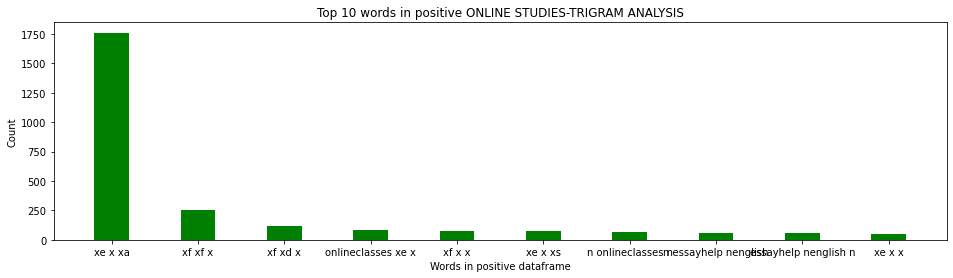

In [95]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive ONLINE STUDIES-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")

plt.show()

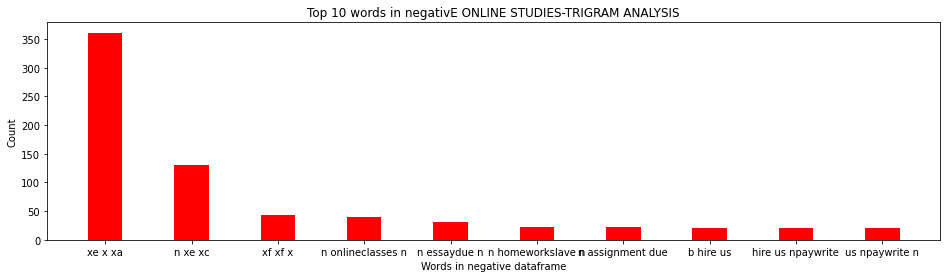

In [96]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negativE ONLINE STUDIES-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

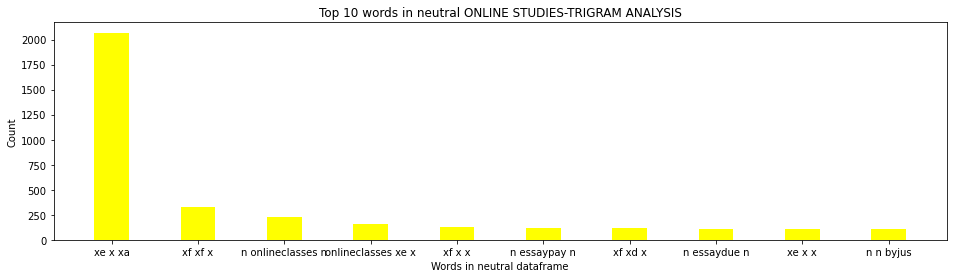

In [97]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral ONLINE STUDIES-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()